## Convocatoria 1 - Proyecto 2

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split,cross_validate, KFold, cross_val_predict, cross_val_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold,GridSearchCV
from sklearn.tree import export_graphviz
#!pip install graphviz
import graphviz

import warnings
warnings.filterwarnings("ignore")

### Ejercicio 1 (5 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (2.5 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M.

Nota: Se valorará positivamente la automatización del código. Hay que evitar procesos manuales en la medida de lo posible.

In [2]:
import math
# Función que proporciona una lista que nos dice si cada columna es discreta o no.
def get_type(array):
    #obtenemos las filas
    filas=array.shape[0]
    #obtenemos las columnas
    columnas=array.shape[1]
    #lista para guardar los tipos
    types=[]
    #recorremos las columnas
    for col in range(0,columnas):
        #por defecto la consideramos columna discreta
        types.append(True)
        #recorremos las filas
        for fil in range(0,filas):
            #obtiene la parte fraccionaria
            frac, _ = math.modf(array[fil,col])
            #si hay parte decimal la consideramos variable continua
            if frac > 0.0:
                types[col]=False
                break
                
    return types

In [3]:
#Cargamos el dataset
path='dataset_1.npy'
dataset=np.load(path)

#obtención del DataFrame
df=pd.DataFrame(dataset)

#limpiamos aquellas instancias que tienen mas de un NaN
df_clean=df[df.isna().sum(axis=1)<2]

#La Función get_type devuelve una lista  especificando si las columnas del dataset son discretas
type_cols=get_type(dataset)

print('Lista especificando si las columnas son discretas (True) o no (False)')
print(type_cols)

#Declaramos los trasformadores de columnas
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
col_trans_conf=[]

#Recorremos todas la columnas del df
for index,column in enumerate(df_clean.columns):
    if type_cols[index]:
        impute_type=impute_mode
    else:
        impute_type=impute_mean

    col_trans_conf.append(('column_' + str(index),impute_type,[index]))

col_trans = ColumnTransformer(col_trans_conf)
data_array=col_trans.fit_transform(df_clean)

#Separamos las X de las Y
X=data_array[:,0:-1]
Y=data_array[:,-1]

print(f"\nValor de matriz X:\n {X} \n de dimensiones {X.shape}")
print(f"\nValor del vector Y:\n {Y} \n de tamaño {len(Y)}")


Lista especificando si las columnas son discretas (True) o no (False)
[True, True, True, True, True, False, False, False, True]

Valor de matriz X:
 [[ 0.          4.          1.         ...  9.04481012  8.2603626
   7.37490176]
 [ 0.          4.          0.         ...  8.56908202 10.9370737
  10.30131004]
 [ 0.          3.          1.         ...  9.68777842 10.69134847
  11.45671439]
 ...
 [ 0.          2.          0.         ...  2.95882711  1.94458971
   8.88390924]
 [ 0.          3.          2.         ...  2.95542398  1.92895933
   9.03304966]
 [ 0.          4.          0.         ...  2.94928374  2.0478487
   8.86096477]] 
 de dimensiones (495, 8)

Valor del vector Y:
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 

<p>A continuación se observa que tras la eliminación de filas e imputación de valores ausentes, todos los valores restantes son non-null:</p>

In [4]:
print(f'Información de la tabla tras eliminar filas con más de 1 NaN.\n')
print(pd.DataFrame(data_array).info()) 

Información de la tabla tras eliminar filas con más de 1 NaN.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       495 non-null    float64
 1   1       495 non-null    float64
 2   2       495 non-null    float64
 3   3       495 non-null    float64
 4   4       495 non-null    float64
 5   5       495 non-null    float64
 6   6       495 non-null    float64
 7   7       495 non-null    float64
 8   8       495 non-null    float64
dtypes: float64(9)
memory usage: 34.9 KB
None


#### 1.b) Eliminación de valores outliers (2.5 puntos)
- Extraer la posición de los posibles outliers presentes en el dataset anterior tras la imputación de valores ausentes,
  utilizando los métodos de Elliptic Envelope y de Isolation Forest. 
  * En EE, utilizar los parámetros "support_fraction=1" y "contamination=0.05".
  * En IF, utilizar los parámetros "n_estimators=100" y "contamination=0.05".
- Se debe encontrar la posición de los outliers que han sido detectados por ambos métodos
- Finalmente, obtener una matriz donde se hayan eliminado los outliers detectados en el paso anterior.
- Sacar por pantalla las dimensiones de la nueva matriz de datos sin outliers. 

In [5]:
#Tomamos todas las columnas menos la de clase.
df_datos=pd.DataFrame(X)
display(df_datos)

,0,1,2,3,4,5,6,7
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029
...,...,...,...,...,...,...,...,...
490,0.0,1.0,0.0,3.0,4.0,3.114222,1.903256,8.995061
491,1.0,1.0,2.0,4.0,1.0,3.032017,2.305869,9.185725
492,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909
493,0.0,3.0,2.0,5.0,0.0,2.955424,1.928959,9.033050


In [6]:
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y 
# la posición de outliers
def find_outliers(df, algorithm):
    outlier_method = algorithm.fit(df)
    df_outliers = outlier_method.predict(df)
    pos_outliers = np.where(df_outliers==-1)[0]
    return df_outliers,pos_outliers

In [7]:
#Envolvente eliptica
EE = EllipticEnvelope(support_fraction=1, contamination=0.05, random_state=42)
df_outliers_EE,pos_outliers_EE=find_outliers(df_datos,EE)
#print(df_outliers_EE)

# Determinar la posición de los outliers
print('\nOutliers en la posición: \n', pos_outliers_EE)
# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers_EE))


Outliers en la posición: 
 [ 67 259 274 331 386 389 414 417 423 449 455 459 462 463 468 470 472 473
 475 480 486 488 490 491 494]

Número de outliers: 
 25


In [8]:
IF = IsolationForest(n_estimators=100,contamination=0.05,random_state=42)
df_outliers_IF,pos_outliers_IF=find_outliers(df_datos,IF)
#print(df_outliers_IF)

# Determinar la posición de los outliers
print('\nOutliers en la posición: \n', pos_outliers_IF)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers_IF))


Outliers en la posición: 
 [ 67 193 202 259 330 331 380 383 384 386 389 397 407 414 417 418 423 429
 436 445 449 455 462 468 470]

Número de outliers: 
 25


In [9]:
#Eliminamos los outliers
df_sin_outliers=df_datos[(df_outliers_EE+df_outliers_IF)==2]
display(df_sin_outliers)
print(df_sin_outliers.shape)
print('\nCaracterísticas de la base de datos final:')
display(df_sin_outliers.describe())

,0,1,2,3,4,5,6,7
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029
...,...,...,...,...,...,...,...,...
485,0.0,3.0,1.0,4.0,2.0,2.895557,1.976294,8.900978
487,0.0,3.0,3.0,2.0,2.0,3.077850,2.104083,9.134194
489,0.0,3.0,3.0,4.0,0.0,2.946041,1.961836,8.915020
492,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909


(458, 8)

Características de la base de datos final:


,0,1,2,3,4,5,6,7
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,0.203057,2.399563,1.340611,3.655022,2.004367,8.788643,8.646261,8.541544
std,0.402714,0.933078,1.038498,1.312700,1.116802,2.954895,3.098763,3.278435
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.816428,1.770402,0.773445
25%,0.000000,2.000000,1.000000,3.000000,1.000000,7.142756,7.755806,8.876313
50%,0.000000,2.000000,1.000000,4.000000,2.000000,9.458360,9.550237,10.000000
75%,0.000000,3.000000,2.000000,5.000000,3.000000,10.693755,10.533008,10.033118
max,1.000000,4.000000,4.000000,7.000000,6.000000,13.948797,14.765976,12.546442


### Ejercicio 2 (5 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en un dataset de regresión (a elegir). Nota: No se pueden utilzar datasets de la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

### Descripción del Dataset

El Dataset está extraído de la base de datos de Fotocasa y trata sobre el precio de los alquileres en Barcelona en determinados barrios.
Este Dataset contiene las siguientes columnas:
>- **price**: El precio del alquiler mensual.
>- **rooms**: Número de dormitorios.
>- **bathroom**: Número de baños.
>- **lift**: Si el piso tiene ascensor o no.
>- **terrace**: Si el piso tiene terraza o no.
>- **square_meters**: metros cuadrados.
>- **real_state**: Si se trata de un estudio, piso, apartamento o ático.
>- **neighborhood**: Zona del inmueble.

El objetivo es **estimar el precio del alquiler de un piso en Barcelona**. 

### Carga del Dataset y Exploración

A continuación se carga el dataset y se analizan los datos. Podemos observar lo siguiente:
- Hay un total de 8188 entradas (pisos) que estaban en alquiler en Barcelona en 2021, cuando se extrajeron los datos.
- Los tipos de datos de cada columna son correctos (por ejemplo lift y terrace ya los ha interpretado como booleanos).
- Solo hay una columna con valores nulos: la columna "real_state" que solo tiene 7920 valores rellenos. Dado que solo faltan un 3.3% de los valores de este atributo, con el fin de no perderlo, le asignamos la moda del resto del conjunto de datos.
- Tenemos 10 barrios, siendo el Eixample el que tiene más pisos
- Los precios de alquiler van desde los 320 euros a los 15000 euros, estando la mediana en 1100 euros y el cuartil 75 en 1540 euros.
- El número de habitaciones de la mayoría de pisos está entre 0 (loft) y 3, siendo el número máximo de 10.
- Algo similar pasa con los baños que están entre 1 y 8, pero el cuartil 75 está en 2 baños.
- La mayoría de los pisos tienen ascensor pero no terraza.
- El tamaño medio de los pisos es de 73 $m^2$.

In [10]:
# Abrir el archivo y guardarlo en un dataFrame de Pandas
path = "Barcelona_Fotocasa.csv"
try:
    df_fotocasa = pd.read_csv(path, sep=',', index_col=0)
except Exception as e:
    print(f"No fue posible localizar el archivo: {e}.")
    
display(df_fotocasa.sample(10))
display(df_fotocasa.describe(include='all'))

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
6499,1095,2,2,False,False,55,flat,Ciutat Vella
5683,850,2,1,False,True,53,flat,Gràcia
5747,850,4,1,True,True,75,flat,Sant Martí
876,1500,3,2,True,False,80,flat,Eixample
2849,800,3,1,True,False,70,flat,Sarria-Sant Gervasi
1501,2492,3,2,False,False,71,apartment,Eixample
358,3600,3,5,True,False,280,flat,Les Corts
2716,2800,1,1,True,True,70,flat,Ciutat Vella
385,800,1,1,True,False,52,flat,Ciutat Vella
7893,950,2,2,True,False,63,flat,Ciutat Vella


,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
count,8188.000000,8188.000000,8188.000000,8188,8188,8188.000000,7920,8188
unique,NaN,NaN,NaN,2,2,NaN,4,10
top,NaN,NaN,NaN,True,False,NaN,flat,Eixample
freq,NaN,NaN,NaN,5710,6518,NaN,6505,2401
mean,1444.092574,2.420738,1.508793,NaN,NaN,84.610161,NaN,NaN
std,1125.886215,1.138592,0.732798,NaN,NaN,47.874028,NaN,NaN
min,320.000000,0.000000,1.000000,NaN,NaN,10.000000,NaN,NaN
25%,875.000000,2.000000,1.000000,NaN,NaN,56.000000,NaN,NaN
50%,1100.000000,2.000000,1.000000,NaN,NaN,73.000000,NaN,NaN
75%,1540.000000,3.000000,2.000000,NaN,NaN,95.000000,NaN,NaN


### Valores Perdidos

<p>Solamente las columna 'real_state' tiene valores NaN.</p>

In [11]:
#Valores perdidos

#limpiamos aquellas instancias que tienen mas de un NaN
instancia_invalid=(df_fotocasa.isna().sum(axis=1)>1)
#Como se puede ver no hay dos columnas con mas de un NaN
print(f"Instancias con más de 1 NaN:{instancia_invalid.sum()}")

#Miremos cuantos filas hay con NaN
instancia_one_nan=df_fotocasa.isna().sum(axis=1)==1
print(f"Instancias con 1 NaN:{instancia_one_nan.sum()}")

#Solo los valores real_state tienen nan
df_fotocasa_one_nan=df_fotocasa[instancia_one_nan]
display(df_fotocasa_one_nan.sample(5))

Instancias con más de 1 NaN:0
Instancias con 1 NaN:268


,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
5923,2800,0,1,True,False,75,NaN,Gràcia
7363,780,0,1,True,False,25,NaN,Sarria-Sant Gervasi
6729,2500,3,3,True,False,140,NaN,Sarria-Sant Gervasi
2368,650,1,1,False,False,38,NaN,Eixample
4927,650,1,1,True,False,22,NaN,Eixample


<p>Sustituimos los valores NaN por la moda para la columna 'real_state'.</p>

In [12]:
#Rellenamos los valores NaN de real_state con la moda
mode=df_fotocasa['real_state'].mode()

df_fotocasa['real_state'].fillna(str(mode[0]),inplace=True)
display(df_fotocasa[df_fotocasa.isnull().any(axis=1)])

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood


### Discretización de Columnas

<p>Para poder trabajar con algunas columnas las hemos tenido que discretizar.</p>

>- **Columnas 'lift' y 'terrace'**: Los valores True y False los hemos convertido en 1 y 0, respectivamente.
>- **Columna 'neighborhood'**: La consideramos variable categórica ordinal, hipotetizando que hay barrios mejores que otros. En este caso hemos recurrido a una fuente externa (https://www.elperiodico.com/es/barcelona/20210704/busca-renta-disponible-barrio-barcelona-11879252) para obtener la renta per capita por habitante y hacer ranking con los barrios. Podríamos haber usado líbrerias como OneHotEncoder o OrdinalEncoder, pero hemos personalizado la discretización con el objetivo de reflejar la dependencia entre barrios y precio(0-peor barrio y 9-mejor barrio). También hemos probado con el OneHoteEncoder, pero no se mejoraban los resultados aquí obtenidos.
>- Columna **'real_state'**:En este caso hemos tenido en cuenta que un estudio es mas pequeño que un apartamente y este último mas pequeño que un piso, también que un ático normalmente esta mas valorado que el resto. También hemos probado a analizarlo con OneHotEncoder, de modo que se cree una nueva columna por cada uno de los posibles valores de 'real_state'. Sin embargo, al estar muy desbalanceada esta variable, al aplicar los métodos de detección de outliers, solo nos queda "apartment" y "flat", eliminándose todos los "study" y "attic". Por lo tanto, esta variable no aportará valor al modelo, tal y como se verá también más adelante.

In [13]:
#Diccionario con el Rank de 'real_state' y 'neighborhood'
real_state_dict={'study':0,  'apartment':1, 'flat': 2, 'attic': 3}
neighborhood_dict={'Nou Barris': 0, 'Sant Andreu': 1, 'Horta- Guinardo': 2, 'Sants-Montjuïc': 3, 'Gràcia': 4, 'Ciutat Vella': 5, 'Sant Martí': 6, 'Eixample': 7, 'Les Corts': 8, 'Sarria-Sant Gervasi': 9}

#Discretizamos las columnas
df_fotocasa['real_state']=df_fotocasa['real_state'].map(real_state_dict)
#df_fotocasa = pd.get_dummies(df_fotocasa, columns=['real_state'])
df_fotocasa['neighborhood']=df_fotocasa['neighborhood'].map(neighborhood_dict)
#df_fotocasa = pd.get_dummies(df_fotocasa, columns=['neighborhood'])
df_fotocasa['lift'] = df_fotocasa['lift'].astype(int)
df_fotocasa['terrace'] = df_fotocasa['terrace'].astype(int)

display(df_fotocasa.sample(10))

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
1118,1540,2,2,1,1,80,2,8
5605,688,1,1,0,0,40,2,5
6774,850,2,1,0,0,66,2,7
3510,1200,3,1,1,1,74,2,7
1361,1520,4,3,1,0,113,2,8
6474,750,2,1,1,1,46,2,7
5488,1573,1,2,0,0,122,2,4
3682,990,2,1,0,0,65,2,5
1067,790,3,1,1,0,55,2,7
235,2500,2,2,1,1,72,2,4


### Partición de Datos

<p>Tomamos un 80% de valores para entrenamiento y 20% para test.</p>

In [14]:
# Identificamos el target y atributos
y = df_fotocasa['price'].copy()
X = df_fotocasa.drop('price', inplace=False, axis=1)

# Separamos los datos en un 80% de entrenamiento y un 20% en test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ponemos nombre a la columna de las y's
y_train.name='price'
y_test.name='price'

#recuperamos el Dataframe de entrenamiento
df_train=df_fotocasa.loc[df_fotocasa.index.isin(X_train.index)]
display(df_train)

# Sacamos los resultados por pantalla
print(f"Conjunto de entrenamiento: {len(X_train)} instancias.")
print(f"Conjunto de test: {len(X_test)} instancias.")
print('\nMuestra del target de entrenamiento:')
display(y_train.sample(5))
print('\nMuestra de los atributos de entrenamiento:')
display(X_train.sample(5))
display(X_train.describe(include='all'))

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
0,750,3,1,1,0,60,2,2
1,770,2,1,1,0,59,2,1
2,1300,1,1,1,1,30,2,4
3,2800,1,1,1,1,70,2,5
4,720,2,1,1,0,44,2,1
...,...,...,...,...,...,...,...,...
8183,1075,2,2,0,0,65,2,4
8184,1500,3,2,1,0,110,2,7
8185,1500,2,2,1,1,90,2,9
8186,1500,3,2,1,0,110,2,7


Conjunto de entrenamiento: 6550 instancias.
Conjunto de test: 1638 instancias.

Muestra del target de entrenamiento:


3711    1550
362      900
560     1300
905     1400
7147    1200
Name: price, dtype: int64


Muestra de los atributos de entrenamiento:


,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
2353,2,1,1,1,72,2,7
3873,1,1,1,0,35,0,5
5742,1,1,0,0,111,2,5
2775,4,1,1,1,92,2,1
7753,3,1,1,0,65,2,7


,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
count,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,2.414504,1.507786,0.692977,0.201679,84.524427,1.889008,6.049008
std,1.141509,0.736574,0.461294,0.401285,47.914997,0.451378,2.196461
min,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,56.000000,2.000000,5.000000
50%,2.000000,1.000000,1.000000,0.000000,72.000000,2.000000,7.000000
75%,3.000000,2.000000,1.000000,0.000000,95.000000,2.000000,7.000000
max,10.000000,8.000000,1.000000,1.000000,480.000000,3.000000,9.000000


### Eliminación de outliers

Usamos los algoritmos **ElipticEnvelope** e **IsolationForest** para la eliminación de outliers con los parametros de configuración del ejercicio anterior.

In [15]:
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y 
# la posición de outliers
def find_outliers(df, algorithm):
    outlier_method = algorithm.fit(df)
    df_outliers = outlier_method.predict(df)
    pos_outliers = np.where(df_outliers==-1)[0]
    return df_outliers,pos_outliers

<p>Eliminamos los outliers de X_train</p>
<p>Hemos aplicado el método de <b>ElipticEnvelope</b>, que aunque en un principio solo se aplica para datos distribuido normalmente, contamos con más de 30 instancias y por tanto puede ser aplicado. También hemos aplicado <b>IsolationForest</b>. Eliminamos los outliers identificados por al menos uno de los dos métodos.</p>  

In [16]:
#Envolvente eliptica
EE = EllipticEnvelope(support_fraction=1, contamination=0.1, random_state=42)
#Isolation Forest
IF = IsolationForest(n_estimators=100,contamination=0.1,random_state=42)

# Obtenemos los outliers de X_train
df_outliers_EE,pos_outliers_EE = find_outliers(X_train,EE)
df_outliers_IF,pos_outliers_IF = find_outliers(X_train,IF)

# Obtenemos un DataFrame de X_train sin los outliers
X_train_clean = X_train[(df_outliers_EE+df_outliers_IF)==2]
y_train_clean = y_train[(df_outliers_EE+df_outliers_IF)==2]
#Sacamos los resultados por pantalla.
print('- Datos de entrenamiento:')
print(f"Outliers eliminados con EE: {len(pos_outliers_EE)}")
print(f"Outliers eliminados con IF: {len(pos_outliers_IF)}")
print(f"Outliers totales eliminados: {len(X_train)-len(X_train_clean)}\n")
display(X_train_clean.describe(include='all'))

# Para X_test e y_test no eliminamos outliers
#obtenemos el DataFrame sin outliers
df_train_sin_outliers= df_train[(df_outliers_EE+df_outliers_IF)==2]


- Datos de entrenamiento:
Outliers eliminados con EE: 655
Outliers eliminados con IF: 655
Outliers totales eliminados: 796



,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
count,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000,5754.000000
mean,2.346542,1.399374,0.692735,0.151547,76.232186,1.895377,6.010949
std,1.008136,0.543315,0.461400,0.358612,29.373976,0.342539,2.136255
min,0.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,55.000000,2.000000,5.000000
50%,2.000000,1.000000,1.000000,0.000000,70.000000,2.000000,7.000000
75%,3.000000,2.000000,1.000000,0.000000,90.000000,2.000000,7.000000
max,5.000000,3.000000,1.000000,1.000000,206.000000,3.000000,9.000000


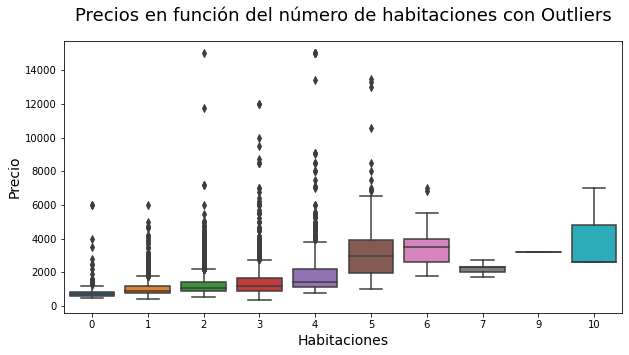

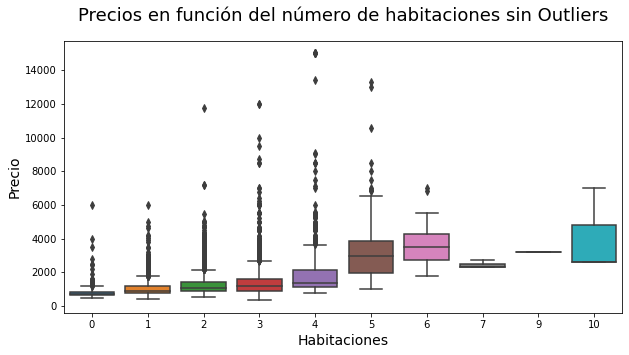

In [17]:
# Visualización gráfica en un box-plot antes de la eliminación de outliers
sns.boxplot(data=df_train, x='rooms', y='price')
plt.title('Precios en función del número de habitaciones con Outliers', fontsize=18, pad=20)
plt.xlabel('Habitaciones', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()
# Visualización gráfica en un box-plot tras la eliminación de outliers
sns.boxplot(data=df_train_sin_outliers, x='rooms', y='price')
plt.title('Precios en función del número de habitaciones sin Outliers', fontsize=18, pad=20)
plt.xlabel('Habitaciones', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()

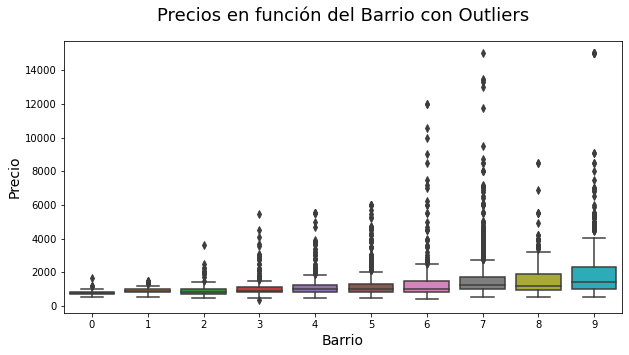

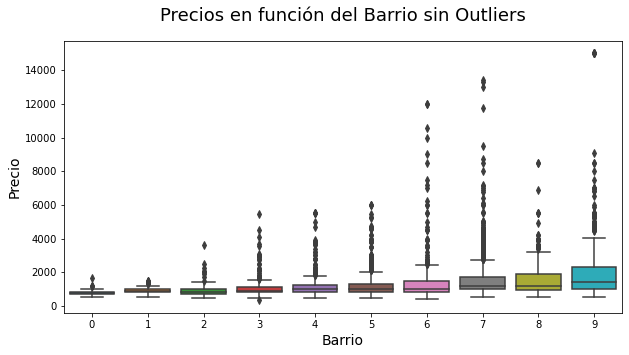

In [18]:
# Visualización gráfica en un box-plot antes de la eliminación de outliers
sns.boxplot(data=df_train, x='neighborhood', y='price')
plt.title('Precios en función del Barrio con Outliers', fontsize=18, pad=20)
plt.xlabel('Barrio', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()
# Visualización gráfica en un box-plot tras la eliminación de outliers
sns.boxplot(data=df_train_sin_outliers, x='neighborhood', y='price')
plt.title('Precios en función del Barrio sin Outliers', fontsize=18, pad=20)
plt.xlabel('Barrio', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.gcf().set_size_inches(10, 5)
plt.show()

### Estandarización/Normalización

<p>Las variables binarios (0/1) las dejamos tal y como están.</p>

<p>En cuanto al resto de valores: hemos probado métodos alternativos como <b>RobustScaler</b>, sin embargo, el que mejores resultados arroja es el <b>StandardScaler</b>
<p>Por otro lado hemos optado por estandarizar tambien las y's, las explicacion es sencilla si estandarizamos el valor de las X's y las hacemos relativamente pequeñas las y's debe ser del mismo orden para mantener la proporcionalidad del modelo ya que es una regrsión y no una clasificación. Para este fin nos hemos documentado sobre como lo hacen otros autores:</p>

<p><b>Título:Aprendizaje automático y profundo en Python. Una mirada hacia la inteligencia artificial.</b></p>
<p><b>Autor:CARLOS M. PINEDA PERTUZ</b></p>
<p>Año Publicación:2022</p>



In [19]:
# Limpieza de datos: Estandarización.
# Inicialización del nuevo DataFrame con los datos estandarizados/normalizados
X_train_std = X_train_clean.copy()
X_test_std = X_test.copy()

y_train_std=y_train_clean.copy().values.reshape(-1,1)
y_test_std=y_test.copy().values.reshape(-1,1)

atributos = X_train_clean.columns

#Columnas sobre las que aplicaremos la estandarización
cols_to_estand = ['rooms', 'bathroom', 'real_state', 'neighborhood','square_meters']



# Definimos y ajustamos los modelos de estandarizaciónn
estandarizador_X = preprocessing.StandardScaler()
estandarizador_y= preprocessing.StandardScaler()

# estandarización
estandarizador_X.fit(X_train_std[cols_to_estand])
estandarizador_y.fit(y_train_std)

# Aplicación de la estandarización a los datos de entrenamiento y test
X_train_std[cols_to_estand] = estandarizador_X.transform(X_train_std[cols_to_estand])
X_train_std = pd.DataFrame(X_train_std, columns=atributos)

X_test_std[cols_to_estand] = estandarizador_X.transform(X_test_std[cols_to_estand])
X_test_std = pd.DataFrame(X_test_std, columns=atributos)



y_train_std=estandarizador_y.transform(y_train_std)
y_test_std=estandarizador_y.transform(y_test_std)

# # Impresión de una muestra y de la tabla descriptiva
print("Muestra de datos de entrenamiento después de la estandarización:")
display(X_train_std.sample(10))
display(X_train_std.describe(include='all'))
#print("Muestra de datos de test después de la estandarización y normalización:")
display(X_test_std.sample(10))
display(X_test_std.describe(include='all'))

Muestra de datos de entrenamiento después de la estandarización:


,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
5677,-1.335790,-0.735133,0,0,-1.403820,-2.614168,-0.473275
3259,-0.343775,-0.735133,1,0,-0.348372,0.305460,0.463024
7198,-0.343775,-0.735133,1,0,-0.178139,0.305460,0.463024
2202,-0.343775,1.105578,0,0,0.094235,0.305460,-0.473275
2384,-0.343775,-0.735133,1,0,-0.382419,0.305460,1.399323
1191,1.640257,1.105578,1,0,1.490150,0.305460,0.463024
5381,-1.335790,-0.735133,1,0,-0.552652,0.305460,-0.473275
7080,-0.343775,1.105578,0,0,-0.382419,-2.614168,-0.005126
6044,-1.335790,1.105578,1,0,-1.233586,0.305460,0.463024
2708,-1.335790,-0.735133,0,0,-0.893119,0.305460,1.399323


,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
count,5.754000e+03,5.754000e+03,5754.000000,5754.000000,5.754000e+03,5.754000e+03,5.754000e+03
mean,1.490331e-16,-4.716422e-16,0.692735,0.151547,2.184558e-16,-3.255805e-16,3.275197e-16
std,1.000087e+00,1.000087e+00,0.461400,0.358612,1.000087e+00,1.000087e+00,1.000087e+00
min,-2.327806e+00,-7.351329e-01,0.000000,0.000000,-2.220941e+00,-2.614168e+00,-2.814023e+00
25%,-3.437746e-01,-7.351329e-01,0.000000,0.000000,-7.228858e-01,3.054599e-01,-4.732753e-01
50%,-3.437746e-01,-7.351329e-01,1.000000,0.000000,-2.121854e-01,3.054599e-01,4.630238e-01
75%,6.482410e-01,1.105578e+00,1.000000,0.000000,4.687486e-01,3.054599e-01,4.630238e-01
max,2.632272e+00,2.946290e+00,1.000000,1.000000,4.418166e+00,3.225088e+00,1.399323e+00


,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
3666,-0.343775,-0.735133,0,0,-0.893119,0.305460,-1.409574
414,0.648241,-0.735133,1,0,-0.620746,0.305460,-1.409574
6555,0.648241,1.105578,1,0,0.298515,0.305460,0.931173
5873,-1.335790,-0.735133,1,0,-1.233586,0.305460,0.463024
1533,0.648241,-0.735133,0,0,0.673029,0.305460,0.463024
3405,-0.343775,-0.735133,1,0,0.128282,0.305460,1.399323
7556,-0.343775,-0.735133,0,0,-0.382419,-2.614168,0.463024
5882,0.648241,-0.735133,1,0,-0.041952,0.305460,-1.877724
1429,-0.343775,-0.735133,1,0,-0.961213,0.305460,-0.941425
3199,0.648241,-0.735133,1,0,-0.212185,0.305460,-0.005126


,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000
mean,0.098332,0.208822,0.714896,0.213065,0.296915,0.007793,-0.013414
std,1.117857,1.321097,0.451602,0.409598,1.624807,1.270474,1.064914
min,-2.327806,-0.735133,0.000000,0.000000,-2.084754,-5.533797,-2.814023
25%,-0.343775,-0.735133,0.000000,0.000000,-0.620746,0.305460,-0.473275
50%,-0.343775,-0.735133,1.000000,0.000000,-0.041952,0.305460,0.463024
75%,0.648241,1.105578,1.000000,0.000000,0.638982,0.305460,0.463024
max,6.600335,8.468424,1.000000,1.000000,20.522254,3.225088,1.399323


### Selección de Atributos

<p>Esta es una de las partes más importantes del proceso. Primero de todo obtenemos la matriz de correlación entre variables y graficamos las relaciones entre variables 2 a 2.</p>
<p>Como era de esperar hay correlación entre el número de m2 y el precio, asi como entre los m2 y número de baños y habitaciones. También llama la atención que el barrio no parece marcar ninguna diferencia en el precio.</p>

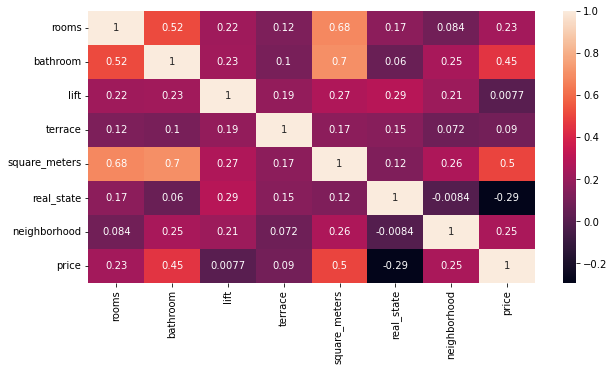

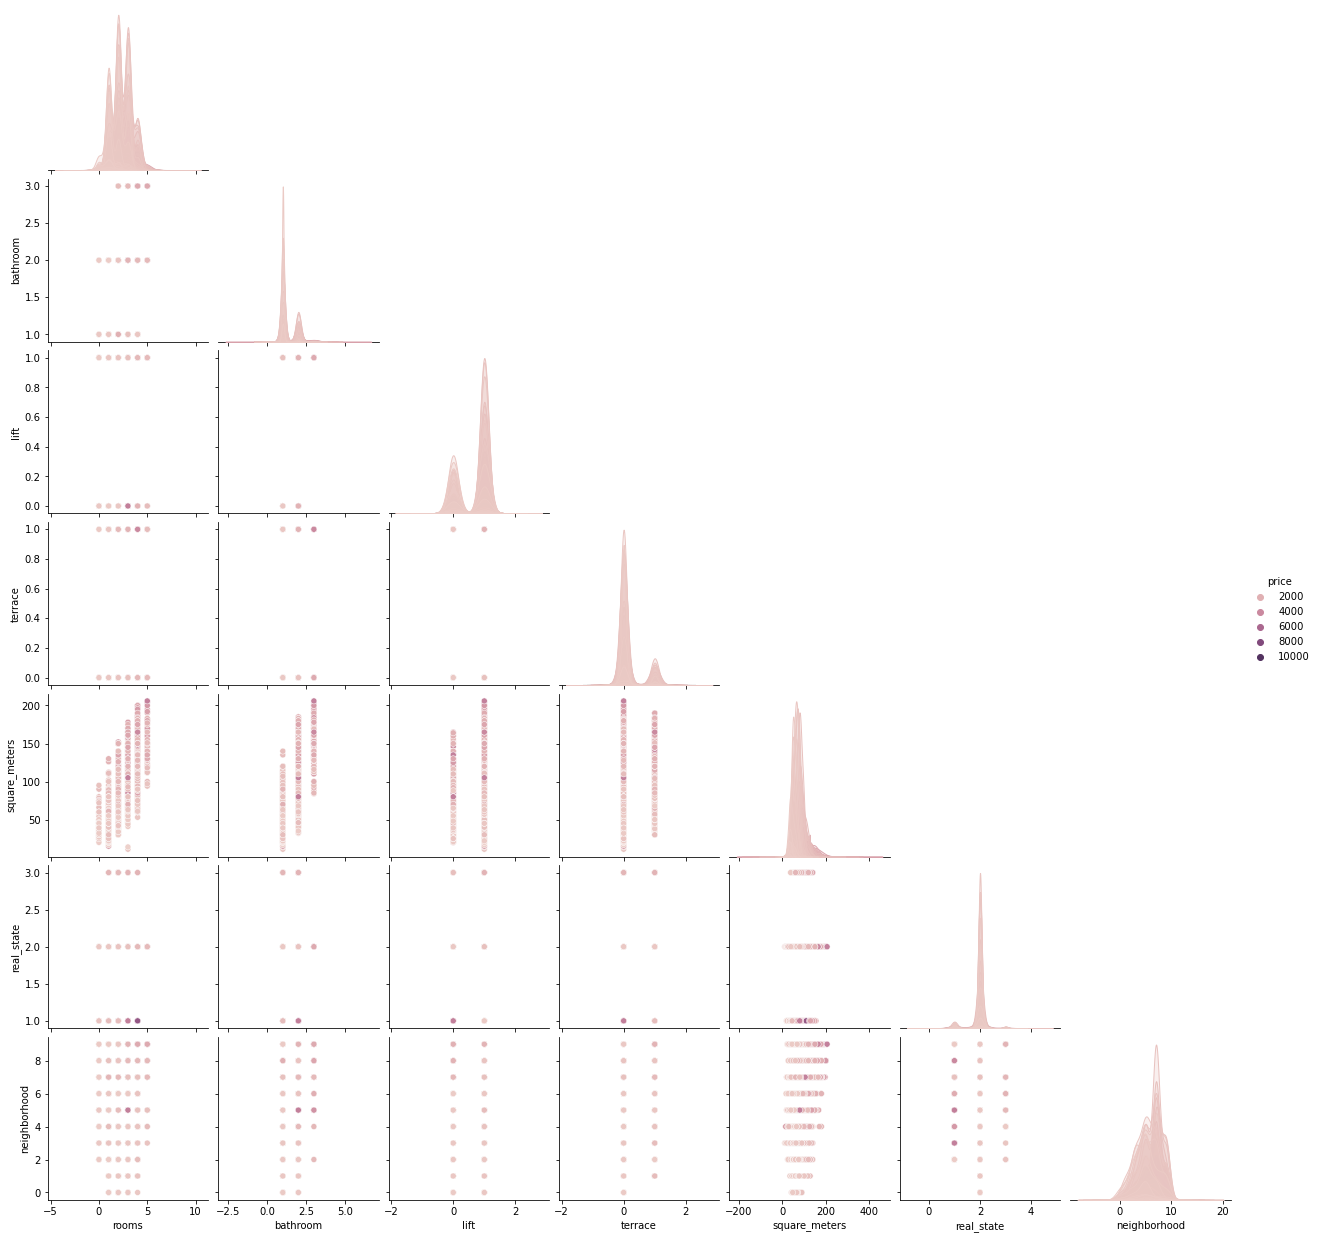

In [20]:
#Dibujamos la matriz de correlación
plt.figure(figsize = (10,5))

matrix_corr=sns.heatmap(pd.concat([X_train_clean, y_train_clean], axis=1).corr(), annot=True)

#Dibujamos las relaciones entre las variables 2 a 2.
pair = sns.pairplot(pd.concat([X_train_clean, y_train_clean], axis=1),hue='price',corner= True)

<p>Si calculamos los valores propios de la matriz de correlación, podemos ver la predominancia de los 2 primeros sobre el resto.</p>

In [21]:
# Cálculo de los valores propios y vectores propios
cov_mat = np.cov(X_train_std.T)
valores_propios, _ = np.linalg.eig(cov_mat)

print(f'Valores Propios:',valores_propios)

Valores Propios: [2.40960438 1.04294959 0.90216147 0.45033863 0.24421887 0.11719445
 0.17589444]


<p>La siguiente gráfica muestra la varianza acumulativa por componente. Como podemos ver, con tres componentes obtenemos una varinza acumulada de más del 80%, mientras que para alcanzar una varianza del 90% necesitamos 5 componentes.</p>

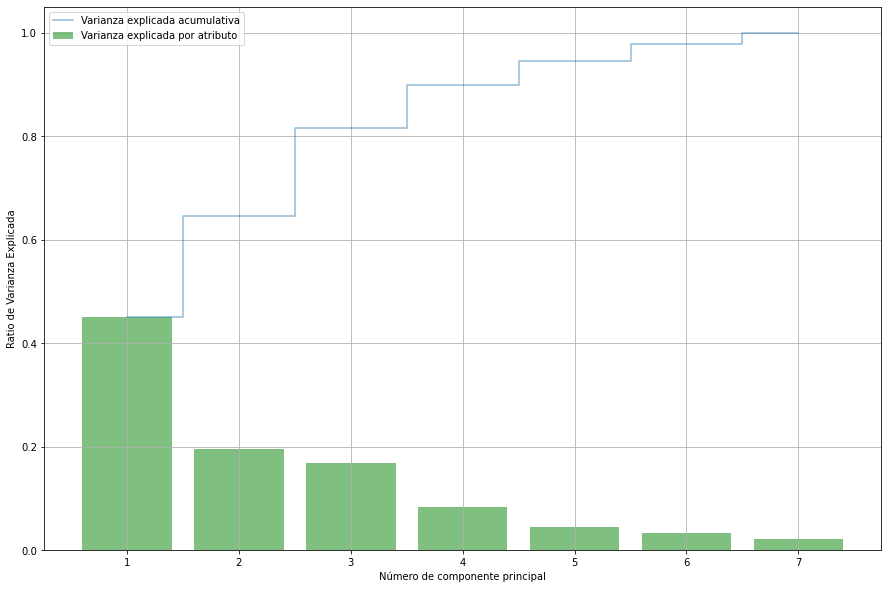

In [22]:
#suma de todos los valores propios
total = sum(valores_propios)
#suma acumulativa relativa ordenada de mayor a menor de los valores propios
var_exp=[(i/total) for i in sorted(valores_propios, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

# Gráfica de la varianza acumulada e indivudual de cada componente
plt.figure(figsize=(15,10))
# Gráfico de barras
plt.bar(range(1,8),var_exp, alpha=0.5,align='center',label='Varianza explicada por atributo',color='green')
# Gráfico poligonal
plt.step(range(1,8),cum_var_exp, alpha=0.5,where='mid',label='Varianza explicada acumulativa')
plt.grid()
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Número de componente principal')
plt.legend(loc='best')
plt.show()

<p>Aplicamos PCA para explicar hasta un total del 90% de la varianza con lo que nos basta con 5 componentes. Pasamos de 7 componentes a 5.</p>

In [23]:
#Aplicamos PCA para explicar hasta una varianza del 90%
pca_analisis = PCA(n_components=0.90)
X_train_pca = pca_analisis.fit(X_train_std)

#Tranformamos tanto el conjunto de entrenamiento como el de test
X_train_pca = pca_analisis.transform(X_train_std)
X_test_pca = pca_analisis.transform(X_test_std)

#Imprimimos los resultados
print(f"Componentes antes de PCA:{X_train_std.shape[1]}")
print(f"Componentes después de PCA:{X_train_pca.shape[1]}")

Componentes antes de PCA:7
Componentes después de PCA:5


### Elección del modelo y optimización de hiperparámetros

<p>Primero definimos las métricas que vamos a usar:</p>

In [24]:
#Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MSE': make_scorer(lambda y, y_pred:
                      metrics.mean_squared_error(y, y_pred),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2'}

<p>Vamos a realizar una primera pasada para ver qué algoritmo puede adaptarse de mejor forma.</p>

In [25]:
#Diferentes modelos de regresión a evaluar.
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    SVR(gamma="auto"),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(fit_intercept=True),
    Lasso(),
    Ridge()
]

<p>Como podemos ver del análisis siguiente, en términos de r2, el mejor modelo es el <b>GradientBoostingRegressor</b> que también hemos implementado para comparar.</p>
<p>En cuanto a la regresión lineal vemos que el resultado es peor.</p>


In [26]:
#Diccionario donde vamos guardado las diferentes métricas
scores_list = {}
#Recorremos todos los modelos
for model in regressors:  
    #Evaluamos las diferentes métricas
    cross_val_results = cross_validate(model, X_train_pca, y_train_std, 
                                       cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
    scores_list[model] = [cross_val_results['test_MAE'].mean(),cross_val_results['test_MAPE'].mean(),
                        cross_val_results['test_RMSE'].mean(),cross_val_results['test_R2'].mean()]

scores_df = pd.DataFrame(scores_list,index=['MAE','MAPE','RMSE','R2'])
#Mostramos los resultados por pantalla.
display(scores_df)

,KNeighborsRegressor(),GradientBoostingRegressor(),SVR(gamma='auto'),RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression(),Lasso(),Ridge()
MAE,-0.414939,-0.401466,-0.372330,-0.402273,-0.457321,-0.436471,-0.643140,-0.436458
MAPE,-675.277527,-1123.081426,-1036.527831,-1249.715411,-1343.167230,-726.266618,-112.795961,-726.270311
RMSE,-0.746371,-0.716314,-0.740183,-0.739983,-0.878215,-0.764688,-0.994962,-0.764685
R2,0.435289,0.481333,0.447930,0.443440,0.208621,0.408829,-0.002644,0.408835


In [27]:
# Grid para la optimización de hiperparámetros (elegimos dos de los tres modelos, ya que se comportan similar, para reducir tiempo de computacion)

# Grid de hiperparámetros de KNeighborsRegressor()
param_grid_KNN ={
               'n_neighbors' : range(1, 21, 2), 
               'weights' : ['uniform', 'distance'],
               'metric' : ['euclidean', 'manhattan', 'minkowski']
            }

grid_KNN = GridSearchCV(
        estimator  = KNeighborsRegressor(),
        param_grid = param_grid_KNN,
        scoring    = 'r2',
        n_jobs     = 6,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

# Grid de hiperparámetros de GradientBoostingRegressor()
param_grid_GB = {
                'n_estimators': [40,80,85,90,100,110,120],
                'max_depth'    : [1,2,3,4,5]
             }

grid_GB = GridSearchCV(
        estimator  = GradientBoostingRegressor(),
        param_grid = param_grid_GB,
        scoring    = 'r2',
        n_jobs     = 6,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grids_list=[grid_KNN,grid_GB]


<p>Después de evaluar los modelos y tratar de encontrar los mejores hiperparámetros, de acuerdo con los resultados siguientes:</p>

>- Para KNN-Vecinos: metric: manhattan, n_neighbors: 19, weights: uniform.
>- Para GradientBoosting: n_estimators: 80, max_depth:3.

In [28]:
col=0
modelos=['KNN','GB']
#lista para guardar los resultados
resultados=[]
#Recorremos los 2 modelos
for grid in grids_list:
    #Ajustamos el modelo
    grid.fit(X = X_train_pca, y = y_train_std)
    #Añadimos los resultados a la lista
    resultados.append(grid.cv_results_)
    #Mostramos los mejores hiperparametros
    print("----------------------------------------")
    print(f"Mejores hiperparámetros encontrados para {modelos[col]}")
    print("----------------------------------------")
    print(grid.best_params_, ":", grid.best_score_, grid.scoring)
    col+=1
#mostramos el DataFrame con los resultados
display(pd.DataFrame(resultados))

----------------------------------------
Mejores hiperparámetros encontrados para KNN
----------------------------------------
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'} : 0.46690780827750245 r2
----------------------------------------
Mejores hiperparámetros encontrados para GB
----------------------------------------
{'max_depth': 3, 'n_estimators': 80} : 0.48021104423619737 r2


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score,param_max_depth,param_n_estimators
0,"[0.011568784713745117, 0.010903882980346679, 0...","[0.001446793209212134, 0.0017646394286557853, ...","[0.007180436452229818, 0.007114473978678385, 0...","[0.001465960366852569, 0.0008821211650192057, ...","[euclidean, euclidean, euclidean, euclidean, e...","[1, 1, 3, 3, 5, 5, 7, 7, 9, 9, 11, 11, 13, 13,...","[uniform, distance, uniform, distance, uniform...","[{'metric': 'euclidean', 'n_neighbors': 1, 'we...","[0.3228031146133433, 0.3228031146133433, 0.446...","[0.21907072215789636, 0.21907072215789636, 0.3...",...,"[0.6619974986630086, 0.6619974986630086, 0.657...","[0.6926149127319119, 0.6926149127319119, 0.664...","[0.6815319615443134, 0.6815319615443134, 0.640...","[0.7238758917626815, 0.7238758917626815, 0.667...","[0.6932523721177666, 0.6932523721177666, 0.660...","[0.6681043859158529, 0.6681043859158529, 0.648...","[0.6797643311900595, 0.6797643311900595, 0.658...","[0.02718381398657684, 0.02718381398657684, 0.0...",NaN,NaN
1,"[0.15968527793884277, 0.29836812019348147, 0.3...","[0.016254297687009832, 0.03081965136680039, 0....","[0.0013294696807861328, 0.00405885378519694, 0...","[0.0004687158498735665, 0.0058643042379185615,...",NaN,NaN,NaN,"[{'max_depth': 1, 'n_estimators': 40}, {'max_d...","[0.3325033187637857, 0.3843830839330066, 0.387...","[0.31965708948997573, 0.3709266751380479, 0.37...",...,"[0.3611211002683453, 0.414410418160155, 0.4182...","[0.3784021666452161, 0.43222677633752127, 0.43...","[0.3671133337748973, 0.4205765963712229, 0.424...","[0.359333554012944, 0.4120669582915054, 0.4158...","[0.36054923757989066, 0.4160557726180869, 0.41...","[0.3697265322447315, 0.4230255243969159, 0.426...","[0.36745920244609775, 0.42101628197886304, 0.4...","[0.006202640907139301, 0.006707768970763834, 0...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, ...","[40, 80, 85, 90, 100, 110, 120, 40, 80, 85, 90..."


### Entrenar modelo definitivo

In [29]:
# Muestra las diferentes métricas
def mostrar_metricas(y_test,y_pred_test):
    #Diccionario con las métricas
    metricas={}
    metricas['MAE'] = mean_absolute_error(y_test, y_pred_test)
    metricas['MSE'] = mean_squared_error(y_test, y_pred_test, squared=True)
    metricas['RMSE'] = mean_squared_error(y_test, y_pred_test, squared=False)
    metricas['MAPE'] = mean_absolute_percentage_error(y_test, y_pred_test)
    metricas['R2'] = r2_score(y_test, y_pred_test)
    #Sacamos los resultados por pantalla
    print('MAE:  %.4f' % metricas['MAE'])
    print('MSE: %.4f' % metricas['MSE'])
    print('RMSE: %.4f' % metricas['RMSE'])
    print('MAPE: %.4f' % metricas['MAPE'])
    print('R2:   %.4f' % metricas['R2'])
    #Retornamos las métricas
    return metricas

In [30]:
# Modelos con los mejores hiperparámetros encontrados anteriormente

#Lineal Regresión
modelo_LR = LinearRegression(fit_intercept=True)

#modelo KNN
modelo_KNN=KNeighborsRegressor(
            metric='manhattan', 
            n_neighbors= 19, 
            weights= 'uniform'
            )

#modelo GB
modelo_GB  = GradientBoostingRegressor(
                n_estimators = 80,
                max_depth=3,
                criterion='mse',
                max_features = None,
                random_state = 42
             )

#Ajustamos los modelos    
modelo_LR.fit(X_train_pca, y_train_std)
modelo_GB.fit(X_train_pca, y_train_std)
modelo_KNN.fit(X_train_pca, y_train_std)

KNeighborsRegressor(metric='manhattan', n_neighbors=19)

In [31]:
#Calculamos las predicciones de cada modelo
y_pred_test_LR = modelo_LR.predict(X_test_pca)
y_pred_test_KNN = modelo_KNN.predict(X_test_pca)
y_pred_test_GB = modelo_GB.predict(X_test_pca)

#Mostramos los resultados por pantalla
print('Métricas de LR')
metricas_LR = mostrar_metricas(y_test_std,y_pred_test_LR)
print()
print('Métricas de KNN')
metricas_KNN = mostrar_metricas(y_test_std,y_pred_test_KNN)
print()
print('Métricas de GB')
metricas_GB = mostrar_metricas(y_test_std,y_pred_test_GB)


Métricas de LR
MAE:  0.5148
MSE: 0.8641
RMSE: 0.9296
MAPE: 3.2871
R2:   0.5044

Métricas de KNN
MAE:  0.4747
MSE: 0.9371
RMSE: 0.9681
MAPE: 2.7750
R2:   0.4625

Métricas de GB
MAE:  0.4692
MSE: 0.8517
RMSE: 0.9229
MAPE: 2.7444
R2:   0.5115


A continuación se representa, para cada uno de los datos de test, el valor real frente a la predicción, así como la bisectriz. Se observa una elevada dispersión de los datos en torno a la bisectriz.

In [32]:
# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.title("%s\nMAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
              (algoritmo,metricas['MAE'],metricas['RMSE'],metricas['MAPE'],metricas['R2']))
    plt.show()

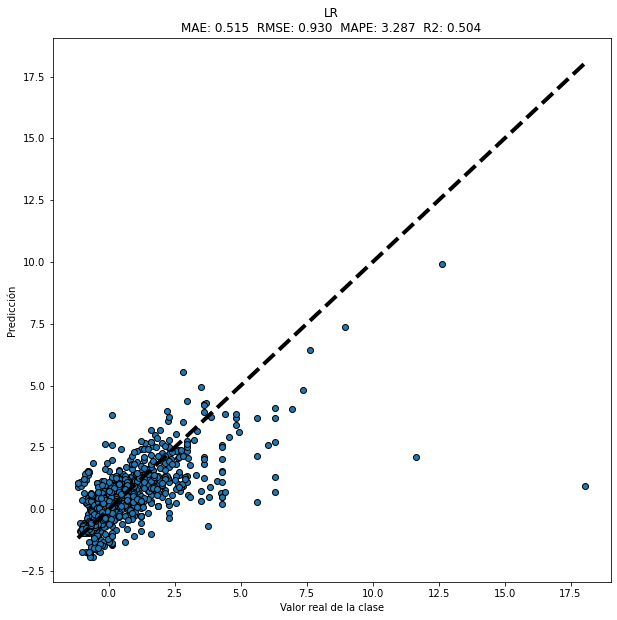

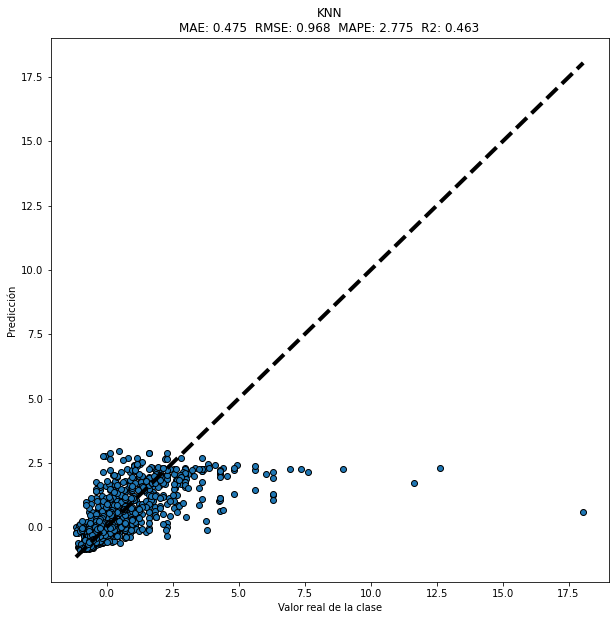

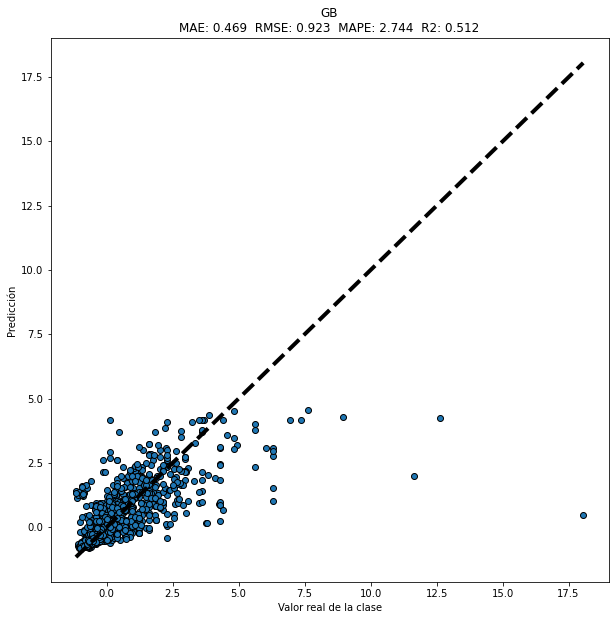

In [33]:
# Graficamos los resultados
grafica_real_vs_pred(y_test_std,y_pred_test_LR,metricas_LR,'LR')
grafica_real_vs_pred(y_test_std,y_pred_test_KNN,metricas_KNN,'KNN')
grafica_real_vs_pred(y_test_std,y_pred_test_GB,metricas_GB,'GB')

<p>Finalmente dibujamos uno de los árboles del algoritmo:</p>

In [34]:
# Se debe instalar "graphviz" en conda para poder visualizarlo:
# conda install graphviz

In [35]:
# Visualizacion de modelo de tipo arbol.
sub_tree_40 = modelo_GB.estimators_[40,0]
print(sub_tree_40)
dot_data = export_graphviz(
    sub_tree_40,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graphviz.Source(dot_data)
graph.format='svg'
graph.render('arbol', view=True)

DecisionTreeRegressor(criterion='mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x1EEF213F640)


'arbol.svg'

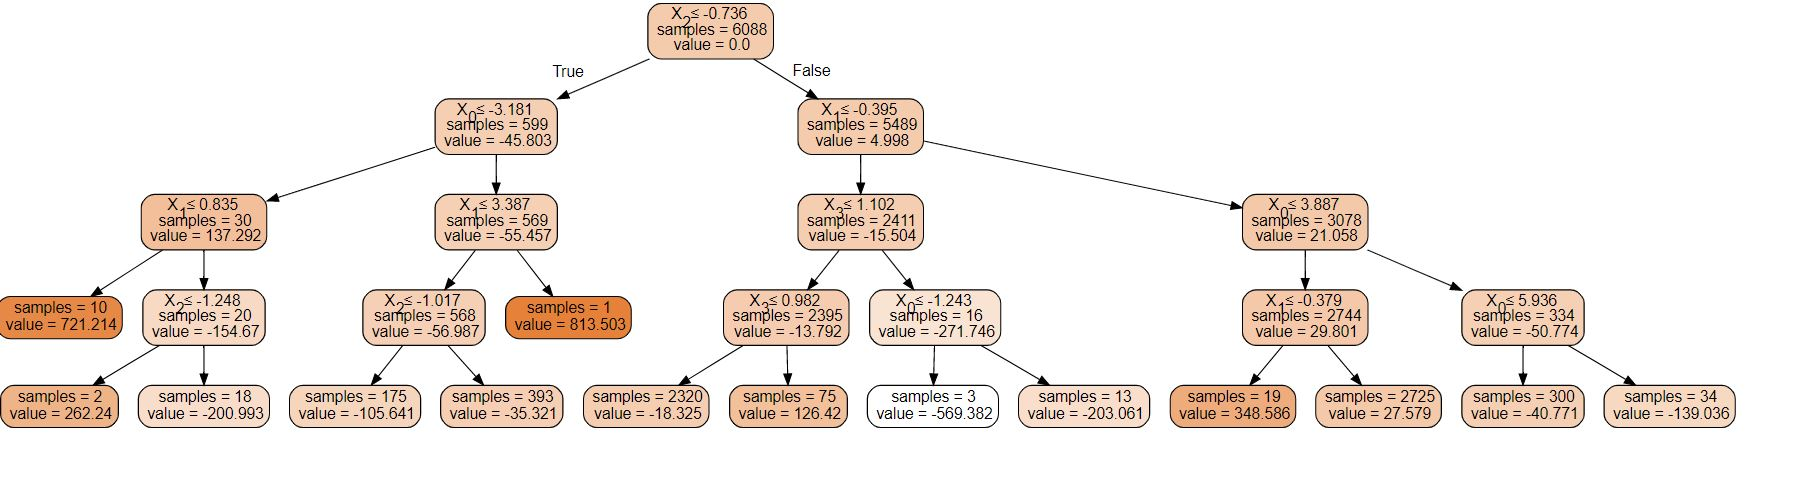

In [36]:
from IPython import display
from base64 import b64decode
base64_data = "/9j/4AAQSkZJRgABAQEAeAB4AAD/4RDgRXhpZgAATU0AKgAAAAgABAE7AAIAAAAHAAAISodpAAQAAAABAAAIUpydAAEAAAAOAAAQyuocAAcAAAgMAAAAPgAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHNlcmdpbwAAAAWQAwACAAAAFAAAEKCQBAACAAAAFAAAELSSkQACAAAAAzE1AACSkgACAAAAAzE1AADqHAAHAAAIDAAACJQAAAAAHOoAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAyMDIyOjA4OjAyIDEzOjI0OjE0ADIwMjI6MDg6MDIgMTM6MjQ6MTQAAABzAGUAcgBnAGkAbwAAAP/hCxlodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+DQo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj48cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPjxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSJ1dWlkOmZhZjViZGQ1LWJhM2QtMTFkYS1hZDMxLWQzM2Q3NTE4MmYxYiIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIi8+PHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9InV1aWQ6ZmFmNWJkZDUtYmEzZC0xMWRhLWFkMzEtZDMzZDc1MTgyZjFiIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPjx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA4LTAyVDEzOjI0OjE0LjE0NzwveG1wOkNyZWF0ZURhdGU+PC9yZGY6RGVzY3JpcHRpb24+PHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9InV1aWQ6ZmFmNWJkZDUtYmEzZC0xMWRhLWFkMzEtZDMzZDc1MTgyZjFiIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iPjxkYzpjcmVhdG9yPjxyZGY6U2VxIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+PHJkZjpsaT5zZXJnaW88L3JkZjpsaT48L3JkZjpTZXE+DQoJCQk8L2RjOmNyZWF0b3I+PC9yZGY6RGVzY3JpcHRpb24+PC9yZGY6UkRGPjwveDp4bXBtZXRhPg0KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwAHBQUGBQQHBgUGCAcHCAoRCwoJCQoVDxAMERgVGhkYFRgXGx4nIRsdJR0XGCIuIiUoKSssKxogLzMvKjInKisq/9sAQwEHCAgKCQoUCwsUKhwYHCoqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioq/8AAEQgB4QcFAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A+kaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsDxL4ttvDzQWsdvLqGqXeTbWEBG9wOrsTwiDIyx45AGSQK2bu6jsrKe6nOIoI2kcjsqjJ/lXmvhRZb6xbxHqIY6jrSrcy7mz5URyYoR6KitjA7lj1JrKrU9nG5rSp+0lYvxaz49uR5ks/h3T93IhFnPdFfYv5sefrtqT+0fG/wD0GPD/AP4JZ/8A5Lq5RXD7ep3O76vT7GXa+IfFd9ZC8svEfhi5tTnE8OkyuhwcH5hd44II/Cn22t+ML21jubPX/DdxBKoaOWLR5mVwehBF3givOteMdp4+m0K1uni8O6pNE2tiOLK288mdse/PyCbChuO45G/NeqIiRRrHGoRFAVVUYAA7CrdWoknff+v6+/qSqNNycbbf0v8Ag+ehV/tHxv8A9Bjw/wD+CWf/AOS6P7R8b/8AQY8P/wDgln/+S6zvEN1rVvJENOiZbJh/pFzbwieeIc5Kxll6DBBAlJPHlnva0Sa1bSzLBf3F2ASZprslZA+BkOhC+WcYJTaoGegqfbVLXuP2NO9rEk2r+M7aCSe413w5FFGpd5H0aZVRQMkkm74A9ag0/wAS+KNXtftOleJvC19BuK+bbaVLIuR1GVuyM1i69rGj+IbXTYNN1Oz1G2bVbZbkWtysgA3F1VtpPVkHB61btMw/FDUooV2xz6XbzSgDhpBJIoY++0AZ9FHpVKtUtq/6smL2NLou34uw++8eatpd41pqfjfwZZ3KYLQ3Fi8brkZGVN4COKfceNtbtLK3vLvxl4Pgtbn/AFE8unuqS/7rG8w34VF4ynmmtLLRLR2jm1m4+zNIhIMcIUvKwI6HYpAPqwqzeaIlnatLoGm2cl6loLKGO5maOFIR/DgKwA9gvOACeBhe3ny3v+X9f0+w/YU+a1vz/r+kS3/iXxRpVp9q1TxN4WsrfIXzrnSpY0yegy12BU1vrPjK6t47i117w5NDKoeOSPR5mV1IyCCLvBB9a8+8Nm7vtU0Wz0VolXStFMaXOoQmQQzCYxSARIygn90VBDjAPcHnr/BUsbaLcW62kVpNa3s8NzHAWMRl3lmdAxJVW3btvbdjtmqlUmlv/V7EqlTvZr+rXNb+0fG//QY8P/8Agln/APkumx+KfF2lTeZq+n6frFkPvtpavBOg9RE7MH47BgfTNXqKhYioupbw9NrY6bS9Vsdb0uDUdKuUubScZjlTocHBBHUEEEEHkEEEAirdcBok50Lx5FaQgix11ZGaMH5Uuo13bwO29A273QHuTXf13wkpxujz5wcJcrCiiirICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDE8a/8AIg+IP+wZc/8Aopq5rQf+Rc03/r0i/wDQBXS+Nf8AkQPEH/YMuf8A0U1c1oX/ACLum/8AXpF/6AK48Vsjswu7L9IwLKQGKkjAYdR781wmsa7qOm+JL3+2NTv9EsYZIjZzpp6z2EsZ2g+dIELI28sDl4wBtI7k1PFXifVbWTWZ9JvtQlk00M0dvYWUbWqKkYcm4mmQAkk4KxPuAxgZya5eRtX/AK/rU7Oazsdba+FdNt/Dlzo0yyXkF5vN1JcsGkuGf7zMwA5+gGMDGMCqOo+HNCttLhuvFly2p2el2xTdq2ySPr/rGXaA0mMLuxn05Jzl3l/r+p6hryWWtPpsVjp0FzbrDBE58x43Yhi6NlPlHAwfcVh6yniK6uvD2o3Gt29wLuzkvUs7iwDQW06Q+YHRVdSxHRfML7TluuMGqvd2t/k/+CZ80Xay3/zX62Om8M+GxfeF7KTV21e2ceZ5EA1O5gaGAyM0SOEdcsEKjnJGME8V0ukQWcGmRjTLmS6tn+eOaS7e5Lg9xI7MSPxxXJaVfeIbCy8PajrOtLqH9rvHFPa/Z44o4jJGWUxkDcSCvO4kEEkBeBWNo3iCeLR/DuixXmo2EK6Sl3NPpunNdyuSxVUAEUgVeGJJXngA9auSk5Nef+bHBx5Oa3Rfjoj0XWNIttb0x7K83qjMrpJE214nUhldT2YMAR9Ociqth4fFgLuX+0r24vrzaJL+YRGXav3VACBAoyeNvViepzXLSa94jn0/TnuI9WtrPzp4bq90/TM3J2sBDIYJY2ZUZclsISGAxgV1nhy/TUfDttdRammphlI+1iHyi5BI+ZP4WGMMMDkHgdBFnGJV1J2LE+lw3Gs2epPJKJbOORI0BGw79uSRjORt457mqOr6DDcXjarDql3o9wsHlT3Nq0Q3xAlgH8xGX5ckg4BGTzg1hweK/MvI4/8AhP8AwfLukC+VHb/O3P3R/pZ57dD9Ku+PTPJp+lWVvAlwt7qsEMscjFUZBl/mwDlcoMjv070crTS/r+tQclZ+Wv3f8MLYaVoGo6XbSeFdZ8ldPV4EvtNuY5yobDOrlw6sScMdwJzzkZq/4VOhrpJh8N6jBqMKSM008V0s7PKx3MzsCfmJOfx4AGBXG+IjPDdanp2sx2ct5fRWKyXllE8Kz2xuRG0bxs74I3sN2eVfHGK0vFs1vp3iaSSWSS0tZ/D179rltl/eBY2j2Ee6+Y+P941Vm1p1v+Cv/XmJaP0t+Nl+v3HWWGt6Vqs08OmanZ3ktucTJb3CyNEeRhgCcdD19KLXW9KvdQnsbLU7O4vLfPnW8VwryRYODuUHI545ri7M3Ol6t4f/ALftbfToYNOmtrWSzO5pMRqxVxx5RCRlgi+YMg/P8o3V9GjubS38Gfb7dYNOil22d2p3XErSRPsEy9I9wOSVaTc2M7c8HIr2v/Wv+W3+RKqO1/66f57ncXf/ACOPhD/sKy/+kF1XodeeXf8AyOHg/wD7Csv/AKQXVeh12Yf+GceI/iBRRRXQc4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAYnjX/AJEDxB/2DLn/ANFNXNaF/wAi7pv/AF6Rf+gCum8ZI0ngTXkQFmbTbgKB3PlNXL+H3WTwzpjocq1nEQR3GwVx4rZHZhd2UtT8LDVJbhZdZ1SOyuiPtFikkbRSjgFcshdFYDBCMo64wSSauo+BLPUYdQtTqepW+n6iWa4sYJIxGzMoBYEoXXoDtDBSRyCCQeoorj5mdtle5j23hq0tmvWWa4dr61itZWdlztRSoIwOpDHPbPaq+oeGIJNNs1t2mebTLOW3tVLKN+6Ly/m464A6Y5rH8QeILrwvrmrI0rzf2hZJNpsUjkgXIYQmNc9ATJCcD/aPrVHU4b+S6m022k1bUn02zhiecaq9jBbPsLM8kqOZJXI2nBRgOOmSacouUW29H/wb/d+pC5YySS2/4D/r0NPwt4et9NXSLDUb+9nvdPsUli0+dlaO0JXYzKyrlj95RuZsAnGBWing21trPT4tN1C+sLjT4Ps8d3AYzI8X9xw6MjDIB+7wemMnPF/2xe3Hhn+157p0vZPCcUz3CNsbeXJLZGMfhW5401690TW0uLGV28jQb+6EG87HkQxbGZehxk/ma1kpOWu/vfhczpuKjyrb3fxt/mbv/CLJBZ28Om6rqWnyQs7PPBIjNOznc7SLIjIxLc525HQEAkVf0jSoNG05bS2eSQb2kklmbLyyOxZnYgAZJJPAA7AAcVxmjSarZazohW31qFLxmS9k1fUYJY7n90zho0E7lW3DO2NQNpbIwBjo/E1x5H2f/iZ61Ybt3/IK037Vv6fe/cS7fbpnnr2iSa0uaRaaub1c94i1XQZC2latcTI4aNzLDFIRavuBjdpVUrEcgEbyAfcVP4an8+1mP9o6vf4cDdqlh9lZeOijyYsj3wfrWEvkf2B478/y932m487djp9nTbn/AIDiotZu/RX/AC/zKveyXV2/B/5Go/hXTIrLU5tdvbjUDd2/l3V5fSohSFMkAeWqKgUktkAHPJPAxR0C10PWHv4Z9Q1HWbie0WGX+1rcwObZs4CL5cYKE5y4BycZPAwviDzP+FSn+0M5+xQfavM/u/J5m78N2atann/hY/h7ycf8eV7v2/3Mw4/DditLauL8/wAEZxaklK3Zlmz8KQwXcc19qN9qggjaK3ivWQpArDBwFRSxK8bnLNjPPJyyx8IW9lc2jNqWoXNpYEmzsZ5EMVucYUghA77QSBvZsZ9cEdBRUczNOWJm3f8AyOHg/wD7Csv/AKQXVeh155dc+M/CCjlhqczkewsbkZ/Nh+deh134f+GefiP4gUUUV0HOFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFU9U1fTtFsmu9XvYLK3XrJPIEH0Gep9qALUkaSxNHKoZHBVlPQg9RXmWkRN4Vuk8J6m+0whjpczH5bq2B+VQT1eMYVl642t0bjox4n1nXG2+EtEdbc9NS1cNBCR6pF/rH/ABCg561q3Ph+DWvD8em+KVg1RhhpJFiMILjo6AMShHqGyPWs6lNVI2ZpTqOnK6MWim/8IHf23yad4s1BYR91LuGK4Kj037Qx+rEn3o/4QvXP+hsf/wAF8f8AjXH9Wmdv1mBR1HQ9N1a6sbnUbVZ5tPm8+1Ykjy3xjPB5+hyOnpVbUPCmj6pfSXd7bytJMipOsdzLHHcKucLJGrBZByRhgeOOla//AAheuf8AQ2P/AOC+P/Gj/hC9c/6Gx/8AwXx/40fV6iF9Yp9jKt/Cui2tkLSKwQ24tPsPlSOzqYMk7CGJyOT70yw8I6Lpt6t5b20slysLQCa5upZ38tsZTMjMdvyjA6DnGMnOx/wheuf9DY//AIL4/wDGj/hC9c/6Gx//AAXx/wCNP2FTuH1in2MrTPC2kaRdLcWNvIrxqUhElzJKsCnqsauxWMcAYQAYAHQVr03/AIQvXP8AobH/APBfH/jR/wAIXrn/AENj/wDgvj/xpPD1HuCxFNbDqyL/AML6RqWofbLy2ZpW2+YEnkRJtpyvmIrBZMdt4Nav/CF65/0Nj/8Agvj/AMaP+EL1z/obH/8ABfH/AI0LD1E7oHiKbVmRSWUE3nidDMlxH5csUrF42XkY2E7RnJzgc984qlpHhvTNDkeTT4ZRI8axb57mSdlRc7UUyMxVRk/KMD2rS/4QvXP+hsf/AMF8f+NH/CF65/0Nj/8Agvj/AMaPq9QPrFMdSO6xozuwVVGSxOAB61zesaP4x0C+M91q8t/op5e4sdOR57X3eHq699yEkf3e9bWkeDNH8R20Gp3/AIguPE9k/wA0UReNLQn3jjA3/wC65YDHTNCw076g8TC2geEIB4j1/wD4SUKf7Ns0kt9NfPFyzECSdf8AZ+XYp7jcRwQT3lIqqiBEUKqjAAGABS13RioqyOGUnJ3YUUUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFedeKvD9vD4y8MxQajrsUWqahOt3HHrt6quot5ZAABLhAGUHC46Y6cV6LWDruh3Op+I/DeoW7xLFpV3LPOrkhmVoJIwFwOTlx1xxmmrX1DozPtNbu7HV9Q0TTNKaaw0WNWnvb3U5JJHDxmQBd6uztnIO5hgYwT0E58ZBbPwrcNZBV8QuqnM3/AB7Zt3mznb833MduufarVroUyav4huJ5IxDqvliPYSWULFsOQRjr05NcxZeD/FEv/CKWmrSaUtl4dfa0kE0jy3i/Z5IQ+0ooiPzA7MuDuPzDb8yjezvvp+t/0/q4W7ef6W/U0bPx5dT29jq8+irF4d1G4SC1vVui0/7xgkUjw7AFjYkYIdiAykqOdvZ15jonwtGkSadZJoPheO306dHXWUtEe+njQ5VWRocK5wA0gkJ4JAUkbfTqeltP6WgdQoormbvx1povHsNDin17UEO1rfTVDrGfSSUkRx9R95s+xpAdNWNrPivRtCmS3vrvdeSD91ZW6Ga4l/3Y1BY/XGPeswaT4q15t2uaomiWbf8ALjpDbpiPR7hhkdvuKv8AvGtnRfDej+Ho3XR7CK2aU5llALSSn1d2yzH3JNAGMLrxf4gb/Q7aHwzYnpNdhbi7Ye0QOyPt95mPqtXNL8FaRpt8uoTrNqepjpf6jJ58q/7uflj6dECiugooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuY1PwcBqEur+Fbz+xNWkO6ZkTdb3h/wCm8WQGP+2MOP73aunooA5fTvGJi1CLSPFtn/YuqSnZCzPvtbw/9MZcAE/7DbX9iOa6iq2o6bZavp8tjqlrDd2sw2yQzIGVh9DXLf2d4h8HfNoTy6/oy9dMuZc3Vuv/AExlY/vAP7khz6P2oA7KvJUh8Iy/ELxgfFHhv+17gX0Ply/8I9LqGxPssXy70icLzk4yPXHNejaF4k0vxHbSS6XcbnhbZcW8imOa3f8AuyRthkP1H0yKZpGg/wBlazrd/wDafN/ta5S48vy9vlbYkjxnJ3fcznjril1v/XQpPRnN6/4kTwy2n6Xo9xpGgWbWyvbR3Fi88sxZtqww2UTpLkZBJAOMgY64w7PxbfarqOjeJYtLa4v18NanJ9hg3KZpY54F2qGG4bivAIyM45NdlqXhrU38Ty61oOr29hNdWiWlyl1Ym4yqMzK0ZEibG/ePnO4H5eOOczw/8Op9BisFj8Q3EktjZXtnFc/Z083/AEidJQ5LblLLsxypDZzgdKqGju/P8U0v0/q5PX7v0uU9J+In/FO6rrl3rmha3Z2FgbqSHTIpLa5t3Gf3ckTyORnGMtsIIPynPC+HviIbvxFpemXmu+GtXfVlcLFos+6SykVDJtf94/mKQrDfhMFR8vzcX5vAU+u309z4y1Cz1AyadLpyiwsGtP3cpUuWYyyFj8o24IAyxwc8aek6HrkF9bS634iF/DZxlIYra0Nt5pIxvnPmMJGA6BQi5JO37u00vr/W/wDwP89xPbT+tv8Ag/1Y6GiiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorwb4nftF2/h/xFb6P4REV99muEbULsEMhQNloY+xJHBbt255Ho9prniXxdYwXXh20g0XS7lFkiv8AUMTTSxtyGSFDtGRyCzdx8tAHVX2oWel2cl3qV1DaW0Yy808gRFHuTxXNnxhe6wdng3RZr9G/5iN7m2tB7gkb5P8AgKkHH3qsWPgbS4ruO+1h59d1GM5W71NxJ5Z9Y48BI+/3VFdJQByf/CGXOsN5njPWJtTU8/2fbA21mvsUU7pOv8bEcdBXTWdla6fapbWFtDa28YwkUMYRVHsBwKmooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDC13wlYa3cx3yPNp2rQrtg1OyYJMg/uk4IdP9hwV9qy18Uan4XYQeOoENoDhNes0P2c/9d05MB9+U/2l6V2NIyhlKsAQRggjrQA2KaO4hSaCRZYpFDI6MCrA9CCOop9ef+JtPj+HOi3/AIl8NX8Wl2VqhmudJuMmznOeiAcwuxOAU+UkjKnrXkvwu/aEvLnx9e2vjOcJpusXJe2kZvlsHOAqZ7R4ABPY/MerGgD6aooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKupalZ6PptxqGp3CW1pboXllfooH8z7DkngVw8uv+LtfPnaX9n8OWByY/tdv9oupR2LJuCxeuDuPrjpT/ABHJ/bvxAj0yYk2OiW8V60W44luZGcRlh3CCMsAe7g9hWjXLWrOL5YnXRoqS5pGN9m8Y/wDQ7zf+Cy3/APiaggk8T3M08Nt8QPOlt2CTJHp9szRMRkBgBwcHODXQV5t8R7u50HXbPUPDU0kWq3kDQ3yRQedizTlrgrkfNGT8p77iMGsI1Zt2ubulBK9v6/r/ACOqtn8UXnm/ZPiB5/kyGKXytPtm2OOqnA4I7jrU32bxj/0O83/gst//AImpdKi0nQvDEH2KeKLTIIfNFxJKNpU/MZGc9c5LFj1yTVbUdYu73QlvfBjWeq7nx5sMiTDAODtG9Fc54IMiY5OSRtLdSpeyYlSptXsSfZvGP/Q7zf8Agst//iaPs3jH/od5v/BZb/8AxNM8PTwTS3JOpX93ejHmxX0ZgaJcnG2Lao253AOAd2MbmxxO2q6FrM93oaapZ3FyUeO4tILtfOUfdYEK25cZxngik6lToxqlT3aM3T9S1zV5Jk0r4lQ3z25AmW2s7SQxk5wGCg46Hr6Grpt/GCqS3jiUAcknTLfj/wAdrJkhOnfELR/tNrBaWf2Waw042z7zIdqyFZAVGwBYjtALDg5I4B1PGOkx6x4Zu4Li5uooFhkeSO3l8vzwEPyMR823POARnGDkZBJ1pxjzXCNGDdmivcXfiG003+0br4jRw2O1W+1SWVqsW09DvIxg5GPrUto/ijULSO6sPiB9qt5RmOaHT7Z0ceoYDBrnsSSaB4DSyTz76NI54LeQ7YZNtsQxkbkoBvGGCsc4+U8kXfDtg1/b+JNPuLmfTb2XUjJdpYMEEO+OM4icjJDKMl8KxLMQFNaSnJNq+3+djOMYSjF23/yv/Xqa0K+K7mMvb+PGlQMyFo9OtmAZSQw4HUEEEdiKk+zeMf8Aod5v/BZb/wDxNZfwyt4rPwNFbW6lYoby8jRSxOFFzIAMnk8DvXW1Eqk4yaTNFSg+hlQ6x400OXzbyW08SWQH7yOKD7LdKO5T5ijn/ZO3PrWzq1rF8RvByx6Lr1zYafehlmmtIwszKMq0R3DMZBBDDG7gg45qOsnSp20D4lW1tbALY+IY5fNiBwFuol3iQD1aMMD0zsU1rRrOT5ZGFaiormicvB+yv4IjAM2o65M2Oc3EQGfXiPP616x4b8P2nhbw9aaLprTtaWilIvPkLsFJJxuPYZwPQYFalFdZyBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVy/xD1O+03wjImkSGG+v54rGGcHBhMrhDIPdVJYe4o2Ba6GV4t1tPEIudA0XStN1hIpDHeXGpx+ZaQSD+ELj97ID1AICngsDxXl1/8As/6XqU73E+opbSuckWNn5KD6KXbFeqadp9tpWnQWNhEIreBNqIP5n1JPJPckmrNedLETb00PSjh4Ja6nJ2ln4k8LeH44bn4iPBYWSCNZruytwETgKGd+vYZJ9KvXMviizhWW88f/AGeNmVFeXT7ZQWY4UZI6kkADvWzdW8F5ZzW13GksEyFJEcZVlIwQfbFeY+BJv7T8TLYaleSXWm6Srv4eaWLaLuNWKNLuyfMaMYQHj5WDYOc0RqVJdf6/r+tAlSpxS0/r+v07nd+R4y/6HeX/AMFlv/8AE0eR4y/6HeX/AMFlv/8AE1qyTxQlBNKkZkbYgZgNzdcD1PB49q5jVL3Vl1R49Tku9N0oMPLn022E5k5PEknzMileSfKUL2l9ZVao+pTo010NLyPGX/Q7y/8Agst//iaqajfeIdHthcat8RY7GAsEEtzZWsalj2ywAzweK1ZdS03S9Jju7vULe3sVRQtzcXI2EHG0mRjznjknmsS3urLV/H9reWtzDeW8elO1rLDIHQl5QrlSDg/cUZH0701VqXtf+rXJdKkle39XsXol8XTwpLD46eSORQyOmm2xDA8gg45FVE1PXZdWfS4/iTA+oRjL2i2doZVGAclMZHBB6d6XwLlNHvrZV2w2uqXcMCAcJGJmwo9hnAHYDHas/wATWKaNFpjQ2kMOjWupR3VxcLKz3AleQjhWHQtINzb87SwCmmqs3JK+/wCoOjBJ6bX/AANB9S16PVk0t/iTCuoONyWZs7UTMME5CYyeAT07VBqGv6npN0LbVfilZ2NwVDCK5t7ONsHocNg4rmNbuZdE8EeJbK40u9bVBeT3sVyLZjHLmXfFMJsbAUXYNpYP+7wB0zv3dt4n0a817xBbTaVJbuEnS0kgkMssUcQynmbwIySHx8jgZ/AP2kkk3L+tP6+XyF7ODlyqP9f1+ZuCDxiRkeN5cf8AYMt//iaBD4yHI8bSE+jaXBg/XAH860bK7jv9Pt7yHPl3ESypkc4YZH86nqHVqJ2bKVKk1dIz4PGeueGyv/CYxW99pu7D6rYRNGbcdd00JLYQd3VjjqQBkj0BHWRFdGDKwyGByCPWuOIDAgjIPBB70z4eO1hPrHhwHNtpskc1kuT+7t5QdsY9lZJAPQYHaumjWc/dkc1eioe9E7Wiiiuo5QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDzpf+SpeKP+uFj/AOgSVr1kL/yVLxR/1wsf/QJK0L5LmTT7hLCVYbpomEMjruVHx8pI7gHFebX0mz06HwInrM0/Qbew1TUNRMs11d37DzJLgg+XGo+WJMAYQZJx1yxJJNcXZalL4din/t0a3pF//Z87tLdXn9oWk7xjJkTLkhgPmCYiyCRg4GI9Pn1bT/F2irJFqVlb36TpIupas1xLc7YQ+8wbnjiw3TY3fBUAgVPLa/p/X5D507adf8v8zW1LQrfRjoGlW8s0mnT62JRbzMCkIEckixrgD5A6qwBzjGBwAKcNLg1D4ia5ZStdQ25tLS7YWd3LbFpSZkLFomUnKoowf7o9K5IeH5te8LeCprzX9aW51K4T7RcJfPu4ieRSiklEYFFG4LuIzkkkmn6Xpk9l4nfRP7f1aSNtdaCa6nvGNzcxCxEgiaQYOMk4xgjqMHmtlHRq+qv+iuRN2adu36v/ADPRoLTTPDEe83N9tupY4Qbu9uLr52O1QPMZtuSeox79K0b2zt9RsZ7O9iWa3uI2jljboykYI/KuBvGltbm60j7VcXVpY63pzQPcyNLJH5jqzRmRiWbB5G4kgOB0ArObVdcvdN1PXLe01r7dBeTrbXA1GCKxiSKUoI2iedQVIUhmZN2WJB4XGajzq9/6sv8AP+utc/K7Jf1d/wCR3On+Fo7O+gurrU9Q1KS0Qx2n2x4yLcEYJXYi7iQANz7jjPPJzptZ+bpbWVxPLNviMTzNtDtkYJ4AXP0AHtXEXzajpOvXF/4ij1kWv2yN7fU9Ov8AdbxRM2BHLbFsADozBHzuLblIGOu1+XydJZ/tmoWfzL+9060+0yj2CeXJx6nb+IqJK8dev9fqVFpN26f1+hWm8LWsml6baQXN1azaWipaXkLL5seF2H7ylWyvBBUjvjIBFZLnSfB8otrq41C9v9QZ7mSQWkl1PPt2qWYQxkKACijCqBxim+G7vz9Rdf7Z8RX37ony9U0j7LGORyG+zR5b23HgnjjINS0SbUvF5u7PxPLp80FiIja2sUDyKGcnexkV8K23GABnZ14qne/vdf6/MSty+70/r8h1je6L4U0W0gWW9KXs000ELWksly5d2lf9yqbwBuPVeBjNaNx4j0q20qDUZLrdb3DBIfKieR5WP8KxqCxbg5UDIwcgYNchpurald6lpGuGxj1G7NpdWVxaW0kcUxCThfPiWV1BjJQZG7jcnWqWjyX/ANoi1VLWC5mh16/CWEdwivKjfKxhLlVZ1YMTkjjfz0y+W+/9a2J57f15Xv8A8DqejafqNtqloLmykLxklSHRkZGHVWVgGUj0IBrN1D/koPgn/sIXP/pFcVmeDbi5uvEXiqa5tzbBr2ECIuGKN9njyGK5G7G3OCRnoT1rT1D/AJKD4J/7CFz/AOkVxTpq1Rf10Co702ek0UUV6J5oUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcj8Q/+Qdo//YYt/wD2auurkfiH/wAg7R/+wxb/APs1TP4WVD4kMopsgcxMI2CuVO1iM4NeeaNd3fh+8tk8VLrNnqEkc6Pevem7sLx0UsWCFj5RIUuqhI+AVycYryUrp+R67vodvrOlprWkzafLc3FtFOAsjWzhXZc8rkg4BHBxg4PBFV9S8OWWo2thEhksm06VJLOa0Kq8G0Y2jII2lcqQQQQa4XT7vV7bW/DV2U1OCHUbgRTzalqRZrzdC7ki1DPHEuQCMMrL024pLS2v5/Dujaodd1Vby41g20jreOUaFppE2eWSU4XGGxuBAOeBjTlcWlfr+JlKcWm2uj+7+v0NvxVpKL408M6pJdXUsjakIo4Xl/dQr5EpO1BgZJAJZsnsCBxWnq+iaLbLLqGpXurwpJKoYxaveKoZ3CqAiSYA3MBgAAewrjNcspBrEmlx6tfwQWOt6e9tLJdNLJF5yMrqJJCWIOTjJOCfwq94jR9Llv8AR4Lu6uLLGn3SpdTyTtC5vFUgSOSxDBc4J4IOOtEVdJJ9f0THzXlt2/No9GRBHGqLuIUADcxJ/Enk1matoEeqXltexXl1p19bKyR3VoU37GxuQh1ZSpIU8jggEYrhrzUdX1B/EGoRWuuC4sbqaGzuLe/hhtLYRdC8bzoHBOWYuh4bg4Aq1q7araX1zq+uw6u+nCKKeC80bUMLYqFXeJLfeFkAbcxbbJlTjGBiko7O/wDTKct1b+kdppujw6TZWtpYzTJDb7iysVYzs2SzOSMlixLEgjJP4VmR+C7OOVY/t18+mpcfaU0tmT7Okm7eCPk34D/MFLlQe2ABWlq86jQ5Jku722UhSJ7C28+YAkfdTy3zn/dPHp1rH8P3fnaoE/tvxJe/IT5WpaP9mi+u/wCzR8+g3fgaS5m2wfLZIrazpOh6Tdx/2heap9jvbw3K6TbQNPHLOP3hbbHG0mMjcRu2Z6jmrJ8O2Gtx3N7b32q2VhqLb72xMf2dLgj5WLrLGJE3BQDtK5Az3yZ9a0eTVfE+nzW/iGTTJrS3mIt7aOFpZA5QF/3isABtx93+LqO/OXGvXmoaUui6ul/PEL2e1vtQstPlmE0MLAbSIkba0mQrcAcSYxwKcbtK2/8AX/A/pClZNt/07X/z/pnXReJdF/4R2PWLe7VtNYiOKSKNm8w7tgVFA3MS3AABz2zSx+KNHk0i51M3flW1oxW48+J4pIm4+Vo2AcMcjAIycjGcivP9EuLe78E+G7HToZLe6/tmVbOSWBoo4HUzSZKMo3rsBXauOTjcpGRcvYb1bnV4byS1udWttQsL4M7CCC7G7EcSBidj/IwAZmy205wcLXIr69/wuv8AMhVHyp+X+f8Akd5pmsWWrpIbNpQ0RAkint5IJEz0JSRVYA9jjB7VY8Kf8lF8Qf8AYK07/wBG3lcnpV7eX3xPuXnsJLBF0ePdDM6NKCZn2l9jMozhsAMeM5x0rrPCn/JRfEH/AGCtO/8ARt5V0FaaIru8Guz/AOCdvRRRXoHnhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHnS/8lS8Uf8AXCx/9AkrUmhiubeSC4jSWKVSjxuoZXUjBBB6giswoU+KfibcMb7WxdfcYlGfzU/lVPxhc3GmW+n6vBNKkNjexm7jRiFkgf8AdtuHQhd4f22151ZXqWPSou1JMntfB+i2rORbTXIeFrfbe3c1yqxtjciiVmCg4GQMZwPSqUvhjwvoM1lqN1FP5ttMkFrPc3dxcNE0n7pUUszEKd+Mfd6E9MjEm1a61G1kvFn1OWHVdWaC0s7BwsksEKMCFdnQRBmjdy4IJBAHUVlLc6iLfUdO1IPGLTWtIeO2k1B71oPMmjJUyuAx6A4OQMnBIohFykk3vb8Wv8wlKKW3f8n/AJHo8Hh/TLa0022httsOlsGtF8xj5RClOucn5WI5z1rF1zwPaaprNhdRRIkQv2vL79/IjyN9nMSshU5Vh8nIK425HNZN/qt3H8OvEFyL6dZ4dVuIo5RMQyAXW1VBzkDBAA9OKqX19q+pX3iK6ittdM1jcPb2M9lfQw21r5aAhnjedBJliWYupGCAOBUxb3v0/wAv80VK13B+n5/5M7mHw5pcFilolsxiS4W6y8zu7yqwYOzklnOQPvE9AOlRS+E9Gn1Nr6S1fzXlWaSNbiRYZJBjDvCG8tmGB8xUn5R6CpZLmWTwutzcyz2sz2yvI9hELh42IBOxQrh+emFbNYmiXvm6xAn9veKLvO79zf6J5ELfKfvP9kTHqPmGTgc9KVpXavt/X6BeNk7b/wBfqaknhHRpdQa7e3m3NMJ2hF3KIGkBzvMIbyy2QDkr15681e1DVrHSjajULlYDdzrbQAgkySN0UAfT8KZqOtWulyxR3MV85l+6bWwnuAPqY0YL174rzbxRqkF5r9pqWp2eqRyWer28FlE+k3BWONZPnkVhHgtIRwFJJUKBySKIpyaXS/8AwAqS5YuS3/pnoOoeKNM03UmsJ/tst0sayvHaafcXOxWJCljGjAZKt19DS6roGlayUur9Jo3SIr50FzLav5Z5Ks0bKSvfaePasS80q8Oqa9rWleKmhmCJ/okdvAyQmOPcEm3KXIO7dgFCA341c1DWYLv4W3GsanZyeRcaSbie1VtrbWiyyA9jzjNK2l1v/mUneVnt/lYr2reEfE32OxshNC1nDvsjAtxYt5PCkwyDYXj+7nYSv3c9qW2fwhrkNtoVmjJHb5lsjDHNbD5DhngnAXd97lo2OQxzkE1h39vq2mHTF1W5jvC+m3NtY/ZY9hgk8jd+8PPmkqhG8eWMj7nzDbfuDANG8AnTtnl/a4PJ2Y/1f2WTOPbbn8K0a1tft+b1/AzjK626P7klp87/APANfRNZ8N2k6aNpEjRlpZFR3hl2XEqk+ZidxtlkyGzhmbhs9DU+of8AJQfBP/YQuf8A0iuKxdf8q1XQNRsJrSTQLe9txBZ2UYXe8jGJXEisVZAZA2wKM4zu7Vt3w3/ETwWq8lby6kI9FFnMpP5uv506a95MVV+60ekUUUV6B5wUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcj8Q/8AkHaP/wBhi3/9mrrq5D4jME0vSHbhV1i1BP1YqP1IqZ/CyofEhjKrqVcBlYYIIyCKxbPwhothcJNBbSt5aNHFFPdSzRQqwwRHG7FEGOPlAwOOnFbdIRuUg55GODivIu0tD2LJ7nP2/gXw/bXFpNHZzM9i4e0828mkFsQMARhnIRcHBUYU4GRwMX4/D+mQ2NvZx22Le2uPtMSeY3yybi+7Ocn5iTg8Vx2maxeTy6Z4XlvJje2F9N9vnMzeY1vb4ZGZup374M56hmrNi1HVBNoWsW51FYL2/gRr691Iot6spbIjs1Z41TbggnYwwDgnJOvLJta+nz2f9a6GMpRSbtsnf5br+tNTptV8P6Z4ttDc6YIpVm1KI3rSl1Eot5CjKARwRhgMAA9c962IvC2kRWU1r9nllSeWOWV57mWWSRkYMmZHYuQCowM4/M1yvha5liu9HgWZ0im1DV98YchZCLhyMjvjmqd/repG5n0+F9QuUvPEctqy2lwqTCJIBJ5cbu6hMlecMCBuxzRyvmcI+v4pBeK95ry/Nna3nhTR7/UHvLm2kMku0zIlxIkU+3p5kasEk7D5geAB0FNvvCOjajdy3F1bzEzkGeKO7ljinI4/eRKwSTgAHcDkAA8DFZ/hGXUE1TVLG5gvreyhWGS2i1K8iuLiMtu3gsskjFcqCC5zywHAAEWs3vlavOn9veKbXBH7mx0Tz4V4H3X+yPu/76POR7UveTsmVeLV2jrwMDA6VT/taxOtf2QLlTfiD7QYACSI923cew54qD7ebLwub9Vv9RMNuZArWxW5nIGceWFXDH02j6Vwnha5t0+JUMs0d82pX+myvdzTaZcQ5kMikLl41wiqNqk8cDueVGN5W9fyb/QJz5Ypry/Nf5nX+KY9C8u1n103CSrIUtWsnnW5ZiPmVPI/eMCBkgZGFyelPtNV0DR/DEFxZyLb6ahEUaLG5feWxs2Y3mQtkFSN27ORnNVPEQuLbxRoupWdut/LDHcRGxWaNJ3RwhMkYdlUlSoB5HDfgeVtjf3GrXupfZovOtfE3mxae9witP8A6GsbIjMQpkUMWxnG5WG7vVRipK1/6vb9dwk7O/8AWzf6bHUKfCknhCUENFplpMWdJFmint5S27gHEqSEuCuMMdw29RTtGsfDGq6Tf6fYwyyxvKDex3onW534BVnM2JQcBSrHpgbTxXJajc3WpeJtXS5sXtHnutKitUedN0E6s8gaQruUkAA7AWyCoyCcjqdBW5tvHOrw6vIlzqE1nbyi4gjMUJhDSKqCMlipDbySXbO7tjFPlST1/rRkp6rTb/go3NL0Wx0dZRYxOHmYNLNNM80shAwN0jks2BwMngdKs+FP+Si+IP8AsFad/wCjbypqxtL1W8034ga5PZ6Je6rD/ZtjHL9jeLfEwkum+7I67uHB4JPtVYdt1NSMQkqeh6VRXNDx/oUTiPVHu9IfGT/adnLboP8Atoy+WfwY1t6fqlhq1uLjS762vYT0ktplkX81JFeiecWqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKyNX8V6FoUqw6pqcENwwylqpMk7/wC7EuXb8AaANeiuX/4SPXtU48P+GJo4z0u9Zl+yJ9RGA0p+jKn1pP8AhGdb1PnxH4oudh62mjp9ij+hfLTfiHX6UAa2seJNF8Poh1rU7WyMn+rjllAeU+iJ95j7AE1kf8JZqmp8eGPC97cIcbbvVD9ggwe+GBmP/frHvWpo/hbQ9Ad5NI0u3tppP9ZcBN00nu0hyzfiTWtQB53rek+I9Pmj8VXptb+6hQwXtnplu67rXIYFdzMZHjO9uAu4OwC5xmcnTPE2guivFf6bfQsjFHysiMMEZHsfqK72uYv/AABpFzfzX2nyXej3dw26eXTpRGJm/vMhBQt7lc+9c9Wjz6o6KVZw0ZgyeFtHl0Wy0r7K0drYBfsohnkjkg2jaCsisHBwSM5yQTnOTUNv4K0C1aZobFt88sM0ztcSM0skLb43YliWYNySeT3zW3/wgV3/ANDr4g/79WP/AMjUf8IFd/8AQ6+IP+/Vj/8AI1ZexqXvc19vT7GHeeCtAv7i5lu7J5PtTiWaL7TKImkGPn8oNsD/ACj5gM+9S3/hLRtTv5Lu8tpGkmCidY7mWOO4C9BLGrBJOOPnB446cVr/APCBXf8A0OviD/v1Y/8AyNR/wgV3/wBDr4g/79WP/wAjUKhUWzH7en2HAYGBRTf+ECu/+h18Qf8Afqx/+RqgvvBN7a6dczx+NNfLxRM6horHBIBP/PtS+rzH9Zh2LNVr7TrXUkhW9i8wQTJPGNxG10OVPB7Ht0qh4T8Malr3gvRNXvPGWuJcahp8F1KsUNiEVnjViFBticZPGSa1v+ECu/8AodfEH/fqx/8Akaj6vPuH1iDVrGTqXhTR9WvHub62kZ5FVZljuJI0uFXoJUVgsg7YcHjjpWi1lA7yF0LrLEInidyYyozxsJ2jqcnGSMA9BUv/AAgV3/0OviD/AL9WP/yNR/wgV3/0OviD/v1Y/wDyNR9Xna1w+sQvexlab4X0nSbwXVnBL5yxmKMz3MswhQ4ykYdiI14HC4HA9BRp3hXR9Jvhd2Fq0cih1jVp5HjgDnLCONmKxgkchAK1f+ECu/8AodfEH/fqx/8Akaj/AIQK7/6HXxB/36sf/kan7Cp3F7en2MJvDvh3RpX1aZFtordmuP390/2a3Y5LSLGzeWh5PzBQeT6mtLwfp8+t6+fFl5E0NmkDW+kwyoyuUYgvOyn7u/aoUYztGT97A0LT4eaTHex3erXF7rk0J3Rf2lKrpG394Rqqpn325HbFdXW1Olyasxq1ufRIKKKK3OcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsfxVoEfibwzd6W7+VJIoeCbGTDMpDRuPowBrYooA840XWJLwyWGrQCx1q1GLuyJ6c4EiE/fjbGVYcdjggga1bmueGtK8RRRrqltvkhJaC4jcxzQn1R1IZfwPPesT/hX8q8QeMPEESdk/wBEfH4vbs35muKWGd/dZ3QxSt7yM6HQdMt9dutZhtEXULyJYp58nLovQYzj8hzgegrNHgLw6HhJspWW3mWe3je7maO3dW3AxIX2x8jooAxx04rov+EBuv8AodPEH/fqx/8Akaj/AIQG6/6HTxB/36sf/kaksPUWzG8RTe6Mabwpo89nFbG2kjSG4kuYnhuJIpI5JGZnZZFYMuS7ZAOMHHShPCOhx6XNp8dgEtp5xcuFkcN5ox+8D53K+VB3Ag55zkk1s/8ACA3X/Q6eIP8Av1Y//I1H/CA3X/Q6eIP+/Vj/API1H1ep3D6xT7FHS9HstHhkjsY3BlffLJNM80kjYxlnclm4AAyTgADpV6j/AIQG6/6HTxB/36sf/kasLUPDmp2njrRNFj8Y62bbULO8nldobLerQmEKFP2fGD5rZyD0HTuvq031H9Zguhu1WOnWp1VdSMX+lrCYBJuPCFgxGM46gc4zVn/hAbr/AKHTxB/36sf/AJGo/wCEBuv+h08Qf9+rH/5GpfVp9w+swfQzL3w9p2o2sEF2k7/Z3MkMy3UqzRsc5Kyhg4yCRw3TjpxTW8NaQ2ippX2QLaRsJECSMrq+c+YJAd+/OSXzuJJJPNav/CA3X/Q6eIP+/Vj/API1H/CA3X/Q6eIP+/Vj/wDI1P6vU2uL6xT7GSnhjR00mXTfsYe3mfzJTJI7yPJwRIZCS5cYGGzuGBgjAqbS9EsNG842McvmTkGWaeeSeSTAwAXkZmIHYZwOcVof8IDdf9Dp4g/79WP/AMjUv/CA3B+94z8QMO42WQz+Its0fV6ncPrFPsZ+r6zZ6JaCe9dtzsEhgiQvLO56JGg5dj6CtzwZod1pNjd3mqhRqWpz/aLhFbcIRtCpED0O1QASOCSxHWpNF8FaPol8dQjjlvNSKlft17IZZgp6qpPCDjooANdBXRSoqnr1OerWdTToBGRg8isK/wDBPhrUpxPd6HZG4XkXEcQjlH0dcMPzrdorcwOZ/wCENltQ39i+JtcsCTkLJci8Qe2LgOcfQijyfG1i37u60XV4wOFmiks5D9XUyL+SCumooA5n/hKNWtNo1jwjqUefvS2EkV3Gv4BhIf8Avinw+P8Aww8nlXGrR6fLnb5WpRvZuT6BZgpP4V0dMmhiuIWiuI0ljYYZHUMD+BoAIpY54llgkWSNhlXRsgj2Ip9c5N4A8MPM81tpSafO/wB6bTZHs5D77oipzTP+EX1az2/2R4u1KNV/5Y38cV2h+pKiT/x+gDpqK5nz/G1iD5lnousKD96CaSyfHsjCQE/8DH1o/wCExktSRrXhrXLAKOZEtRdofcGBnbH1UUAdNRWHY+NfDWpTCC01uyNwf+XeSYRzf9+2ww/KtygAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5298eeH7W6azt7xtTvV62mmRNdSg/wC0Iwdn1bAoA6KiuV/tPxhq3/IM0W10SFuk+rzebL7HyIjj85Afal/4QptQ+bxPr2pavk826yfZbf6eXFgsPZ2agC7qfjLQdKujZ3GoJLff8+VorXFwf+2UYLfmKp/234n1T/kC+HVsIj0udanCHHqIY9zH6MUNbmmaPpui2ottIsLaxgH/ACzt4ljX8gKuUAct/wAIjf6lz4m8S394p62tgfsMH0+Q+YR7GQj261saR4e0fQImj0XTLWxD8uYIgrOfVm6sfc5rRooAKKKKACiiigAooooAKKKKACiiigAqnq//ACBL7/r3k/8AQTVyqer/APIEvv8Ar3k/9BNAGb4DRYvhz4bjQYVdKtVUegEK1vVheB/+Se+Hf+wXbf8Aopa3aACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuU1hAfip4Xk5yun6io/E23+FdXXK6u6j4peGEJ+Y2GokD2Btv8RQB1VFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVr7TbHVIPJ1Oyt7yL/nncRLIv5EGsL/AIV/oMP/ACCY7rRyDkDS7yW2Qf8AbNGCH6FSK6aigDmv7C8S2ef7M8WNcKOkerWEcwHtui8pvxJP40f2j4wsv+PzQLDUUH8enX+xz/2zlVVH/fw10tFAHNf8JxZW/wDyGdM1jST3NzYO6L9ZIt8Y/Fq0tL8SaJreRo+r2N8w6rb3COy/UA5H41p1m6p4c0TW8f2zpFjfkdGubdJCPoSMigDSormv+EHsbfnR9S1jST2Ftfu8a/SKXfGPwWj+zfF1l/x5+ILLUUH8Go2G12/7aRMqj/v2aAOlorm/7c8S2f8AyEvChuAOr6TfxzfjtlER/AZ/Gj/hPdDg41V7vSCOp1Ozlt0H/bRl2H8GNAHSUVVsNTsNUg8/TL23vIv+elvKsi/mCatUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVFc3UFlbPcXk8dvBGNzyyuFVR6kngVzbfEDTLpzH4ctb7xDICBu02DdCM9D57lYsfRifagDqaa7rHGzyMqIoJZmOAAO5Nctt8cawPmfTfDcDDpGDe3A/E7Y1P4PTk+Huj3EizeIZbzxDMrBgdVnMsat6rCMRL+CUALN8QtCMz2+jPca9cocGLSITcAH0Mg/dr/wJhTPtHjfV+Ley07w7Af+Wl25vLjH/XNCqKf+Bt9K6iCCK2gSG2iSGJBhY41Cqo9AB0p9AHKDwDaX3zeKNT1HxAx6xXk2y3/78RhUI/3gx966SysLTTbVbbTrWC0t0+7FBGEVfoBxU9FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcz408YeH/DGmyQa/qkFhLeW8ot1mJHmYGDjj3H5101eSftIeFv7f+FkmoQJuudGmFyuBkmM/LIPyIY/7lAG98JfFug6z4F0LSdL1OC6v9P0e1W6gjJLQlYlUg/RuK72vE/2YPC/9k/D251yePbPrFxlG5/1MeVX/AMeMn1GK9soAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8l1j4oeCj8UPD94PEVn9ns7HUIbiQk4id2t9qnjqdjfka9ar48+Jfw2mf8AaLXQrGMpB4guUuoiozsSQkyt9FZZDj0FAH13YX1tqen299YTLPa3Maywyr0dGGQw9iKsVFbW0NnaQ21rGsUEKLHHGvRVAwAPoBUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBiX/g3w3qVx9ovNEsWue1ykISYfSRcMPwNVv8AhD3tf+QN4j1uwx0RroXafTFwJDj6EV0lFAHN+R40sv8AVXmjauo6LcQyWb/i6mQH8EFH/CS6vaf8hbwnqCKOs1hLFdRj8AyyH/viukooA52Px94aMixXeprpsrHAi1OJ7NyfQCYKT+Fb8M8VxEstvKksbcq6MGB/EUskaTRtHKiujDDKwyCPpWBN4C8MSStLDpENjMxy02nM1nIx9S8JUk/jQB0NFc3/AMIvqdpk6R4r1SIdob1Y7uP8SyiQ/wDfdJ5njWyxvg0TWEH3mjklsnP0UiUE/VhQB0tFc1/wl1xa/wDIZ8Ma1Zc43wwLeKfceQztj6qKsWfjbw1fXH2eDW7NbnvbzyeTKP8Atm+G/SgDdooBDAEHIPII70UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUE4GTwKK4r4m3Fy+l6Xo1q7RrrN+ttcujYIgWN5ZAD/tCPYfZzSk1FXY4pyaSKV94y1bxE7p4OlgstNVio1aeLzWuMdTAmcbeMB2yD1AIwTnf2d4hf5pvHWvFz97y0tEX8B5HFakcaQxJHEipGihVRRgKB0AHYU+vJliKkno7Hrww1OKs1cyP7L13/oefEP8A5K//ABis60u7q+0qfUrf4ieIPslu0izPIttGYihIcMrW4KkY7iuoryzxD5J8eT3cSXH/AAjUc0K+INjAQvOP9WxGMkL8nmYOMbc52mnCrUk7c39f1+ITpU4K/L/X9fhc7WzttXv7KG7tvHXiQwzIHQvHbISDyMq1uCPxFT/2Xrv/AEPXiH/yU/8AjFarOkcZkdlVFG4sTgAeuaw9ch1a88iXSpzJYFczQWsywzTLg52yFWByMYAMZB58wdp9tUb0Y/Y00tUT/wBl67/0PXiH/wAlP/jFZMOpzXGqDT4viH4kMxkaJGMEAikdc7kWU22xmGDlQxI2txwcbWjRwRaWVs7K4s2BPmR3QJlL4GSzknzD0+fcwOOpxXHJn/hVPhv7N/r/ALXYY2/e8z7Qm/8AH7+fxzVwqTbs5dUvvJlSpqN1FdX9x0eoJqWlWL3d/wCP/EMUKEAkLbMSScBQotyWJJAAAJJOBVWDUJ7jTbm+X4h+Io4LQkXAnit4nhIGcMj24ZSQQQCOcjGc1P4y/eQ6TaxDF3PqUQtZS2FikUM+5hj5hhWG3jOcZX7wo6YYYPEWt2niiS1nuW+yTNO6COBwxZYVVGJ2sHQ8FmJJBB6KCNSo43v/AFp/mEqUFJLlVv8Ah/8AInstQub+G7kh+IHiZPsa77iO4t4YJI1xkMUe2DYIBwcYODjoaXS7y/1h9tl428XgbN4e409IFYezSWqg9exrL1i1lfXda0/VtTggk1bSWWK/WLZHaQq+zYyM5yxM2d24ZORgY517N9Q0TxPYaTPqU+qW17ayuDcRRI8DRbOnloo2kPjBBIIHNP2k2rqW/wCl7/kL2UL25dt/wt1ND+y9d/6HrxD/AOSn/wAYo/s7xCnzQ+OteDj7vmJaOv4jyOa16Ky9vU7mvsKXYhsfGWreHXRPGMsF7prMFOrQReU1vnoZ0zjbzguuAOpAGSN7xr490DwFop1HX7sJuB8i3jw0twR2Re/bnoMjJFYkkaTRPHKivG6lWRhkMD1BHcVj+EfAPhfxDDqNv4l0eDU7rSbw2cM9yzO32coksS9eirJsGP7td2HrOfuy3ODE0FT96Ox5p4a/aD8ReIfjDYl7YLpd0Gs7fSY5goLvjYzO2AW3hRuPQE4HJB96+x+M9WAN5qVjoEJAPlafF9qnHqPNlAT/AMh/jWbF8Fvh7BfxXkHhm3huInWSN45pV2spyCAGx1Fd1XWcZzdv4C0JLmO61GCbWbuMkpcarM10yE/3Q+VT6KBXRqqooVAFVRgADAApaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooApaxq9loOkz6lqkwhtoBlmwSSScBVA5ZiSAFHJJAHJriZ7/AMXeIG8+PUP+EYs25jt4YI57oj1kdwyKf9lQcf3jT9dkOtfEn7FO26z0K0iuFhPKvczFwHI9USPj/roT6VqVyVqrT5YnXRoqS5pGF/YWtf8AQ9+I/wA7T/4xVK/hvNMuLOC++IPiOF76byICUtirSYJClhb4UnBxkjPQV1Vc747bTh4Mvk1aOSWORRHDHB/rXnJHlCP/AG9+3B7HntWHtZ33Oj2UOxA9veprMelH4g+IzeyQmcRKts2IwcbmIt8KMnAyRnnGcGrn9ha1/wBD34j/ADtP/jFYnw2W5hg1CDxIWbxSsinUZJGUmVMHymQgAeXtyAAOG39812Usy7zbRTxJdPGzxq/zHAwN23IJAJGenXqM1Upzi7JkxhCSu1YyP7C1r/oe/Ef52n/xisvxDpstvo8sGu+OfEklreg2rW6RW8zT7wQUVEtizZXOQB0BPQU6xsr6HVkbxTa3uoSebmC6iuBLax/MNgMCqm1g3IYo+0YzKccdFfC2aeBWe0TUCH+xNcIHZW28lVyCcA8gEcdxSdSa6j9nB9DmfDGhuPDlpB4e8deIFsLZPs8capbJ5WzgoVa33KwI5Dc+tMu742OpmwufiJ4mSVWRJHEEDRRM/wB1XlFtsRjkYDMDyPUVd8GGSC716wvGE97b6h5lxdINqTtJGjjamTs2qQu3LfdByc1X8ZwpL4T1WXSbixS0g8ybVIY4xvuSgDNH5in92xC7SSrHBHSn7SXNq9P+GF7JNaLUj1S8bRrr7PqHxD8TpIsYlk8u3glWFCSA8jJbERrwfmcgcH0NGoXdzpsxjuPG/jR8IHMltpizx7SM53x2jL+tUpEv9b1HxLceHZY7FXt4YbpLld7zN5O8bO0JCSBdzCQE87ODunvruPWvBvhfStMjkgtdeEMbK/LR2qxeZIpPuq7M/wC1Vc1Tv2/EnlhvbTX8Lf1/mael2t/rOl2+o6d4/wDEstrcoJInZLZNynocNbgj8RVv+wta/wCh78R/naf/ABituNEijWONQiKAqqowAB2FOrN1ZX0ZoqUbaoxIrjxpoT+fBqy+JbZfv2d9DHBMRn+CWMKu7GeGXB9R1rttC1yy8RaTHqGnM/lsWR45U2SQupw0bqfuspBBH9OaxKxbF20P4pWBtjttvEMMsFzHzgzwpvjkHbcUV1PqFX0rejWbfLIwrUUlzRPRqKKK6zjCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorlfiNfXlp4Ra30yQw3WpXMNgkynDRCVwruPcJuI98GhuyuNauxn6p4v1XV7+4sPBq28VvbuYrjV7pDJH5gOGSFAR5hXkFiQoIx8xBAzzpHiGX57nx3rnmHr5EVpGv4L5J/nWpY2NtpthDZWEKQW0CBIokGAqjoKnrzpV5t6HoxoQS11MP+w9a/wCh68R/naf/ABiqNit3qX2z7J8QvETGymaC5V1tozE4GSCGtwcYIIPQg5BIrqq8r8eIJfGEk2mx3bWFvBH/AMJQbVgFktwwKIRgksFLMwXB8vI/iFKNScna45U4JXSOu0y2v9Y02K/07x/4kltpgTHIUtk3jOMgNbg4PY9CORwatf2HrX/Q9eI/ztP/AIxWhNqWmadpKXtxeWlpp6ou2eSVY4gpwFwxIGDkYrN1ZtS1axs7nwvqMElo7b5GgmVTMn+xKUkXHXgKCcjDrjkdSd9GCp07bDv7D1r/AKHrxH+dp/8AGKxNR8MRHxdo95qPjfWzrSrNFp7t9lMgBXMmMQdNoOSR3xkZ53/DcNtDZSLBp19YTb/3637GWZmxwWlLOJPlwAQ7YGF4xgYmsaPY2vxI8O6jDbj7ZdTziWd2LsVFu2FBJO1e+0YGcnGSaftJ3tcUqcFG9jX/ALD1r/oevEf52n/xiqdtHdXkd5JbfEbXnjspWhuJN1oFjdQCwJMGOAefTkdjXRXdrFfWc1rcb/KmQo/lyNG2D1wykEfUGvN/sVrpvw/8b2djbxW1nDfTL5UahUSPZHuGPTGc0o1JttX6fql+opwhFJ8v9Wb/AENzT7x9TaYW3xD8TIYYvPb7TBBBmL/novmWy7k/2hke9Jpl7Jq92ttZfEHxR5rxmWJZ7aGHzkGMtGZLUCReRyuRyPUVa1yGG58ZeHoTHFLBJb3azRsoZWhKLkEHqudvt0pllMfFPiez1KxRV0XSfNWC4x/x+TMuwmP/AKZqNw3dGJ44GTXtJd/61F7ONtv60ND+w9a/6HrxH+dp/wDGKP7F1xeY/HfiEMOhYWjDPuPI5rcoqPaz7mnsafYzIPEviHwuDN4knTW9ITma8gtvLurZe7tGnyyKOp2AMB0DYrv4Zorm3jnt5ElhlUPHJGwZXUjIII6gjvXJ1B8Py2najrnh9T/otnJFd2if88opw3yD/ZDxyY9Acdq6aNVyfLI5a9JRXNE7aiiiuo5QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKr3thZ6jbmDULSC7hPWOeMOp/A8VYooA5s+APD8TBtMtp9JYfd/su6ltVH/AACNgh+hUik/4R/xDZgf2X4tnlAOdmq2UdwPpmPym/Mk10tFAHNfb/GVlu+1aLpupxjo1hetFI3/AGzlXaP+/lA8bQW5C6zoutaWcZZpbFpo1+skG9B9Sa6WigDJ0vxVoGtNt0nWbG7fODHFcKXB9Cucg/UVrVQ1PQdI1tVXWdKsr8L90XVukmPpuBxWQfAemQbjo93qukM3/PlqEgQfSJy0Y/75oA6aiua/snxZZNmw8TW99GowI9U09S7f9tIWQD67DWH4y8WeKvDHgfVr/UtBtsw2km2707UQyxOQQjMsiow+Yj7u4+maAPQazdf1+y8N6U1/qLOV3rHFDEu+SeRjhY0XuxP4DkkgAkfNXw5/aY1HS/K03x5G+pWgwq6hGB58Y/2x0cdOeG6n5q9RsdesvHXjO81vTruO90rTIo7bTnjzt3vGJJZMHo+HVOgICkdzUVJ8keY0pw55cpenuvGWtv5s+sr4egb7tpp0Mc0oH+3LKrAt/uqB7mof7G1v/oevEX/kp/8AGK26K811qje56KoU0tjmNUS+0WzF3qfxA8RwW/mLGZdlsyqWOBuItztGSBk4A7mlu476yvLO0uPiB4iW4vXKW8arbMXIGSeLc4AHVjgDI55Fa+uy6dD4fvpNc8v+zlgf7SJBlTHjkY75HauG+GsV1a6lND4mS6GqtbKdNN66s62HG1BgDDqcCTuTtJzxVxqTaeu39f15emsypwTWm/8AX9edvl1v9ja3/wBD14i/8lP/AIxR/Y2t/wDQ9eIv/JT/AOMVek1nS4tVj0yXUrRNQkXclo06iVxzyEzkjg9uxrnbix1EanJJ4lgu9WsS2YhZTfuYlx83mWwCs4PHykz8gkBelSqlR9SnTproW9QttR0qxkvL/wAf+IooI8bmxasSScAAC3JYkkAAAkkgCotL+26zHK1h4/8AExaF9ksU0NvDJGcZAZHtgy5BBGRyORW/e/YdsA1H7PgzJ5In2/63Py7c/wAWemOa57QftNp441i11SWO7vZ7aC5+0QRmKNY8uix+WWYgghmzuOdx6YApxqzaeonSguhFq17Nok4h1D4g+JxJ5ZmZYbaGby4wcb32Wx2L1+ZsDg+hpdQu59MW3Nx8QfE0puUMkKWkEFyzoACXCxWzHaMj5sY5HPIqK7tr++8Ya7/wj88NlOlnBBcyXCeb5xxIy7FyPLIDH5zvBz9w45y/D7SajdaOPCu3TJbXQIlZ75TcL5TNhE2AoSwMbHfuA5+6cjbSqSa3/qz/AMiXThfRaf8ABS/U1p7+4hgt508d+LruG5jEsUtjYR3SMp6HdFasB9DVjRmvNfsDe6X4+8TSQCRoi0kMERDKcMNr2wPByOnUGsqDUprX4VxwaSJYL6W5bTEd2EhWdrgxPJkBQQG3PwB06Cu103T7fStMt7CyjEdvbxiONR2AFKVSaT162/r8AjTi7aLz/r1v9xnf2Nrf/Q9eIv8AyU/+MU5bPxVZHzNO8a307DnytTtbeaNj6HYiMB9GrZoqPbVO5p7Gn2LfhnxdLqd9Jo+u2i2GsRoZFRGLQ3cYIBkiY8nBIDKfmXI6ggnqK8v8XW7jQ5NTslA1HSf9Os5OhDxjJXPo6gofUMa9LtrhLu0huIjmOZFkU+xGRXfRqe0jqefWp+zlpsS0UUVsYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVxXj7/kMeF/8Ar+m/9Jpa7WuK8ff8hjwv/wBf03/pNLWdX+HL0NaP8SPqQUUVFcrM9pMtq4jmZGEbsMhWxwSO/NeIe4SMoZSpzgjBwcH86o2eiadYaP8A2Va2qCyKsrROS+8NnduLZLE5OSck5rjtIvZ9CmVfEaaxpt81rOXnnvTe2Vy0Y3GRcsSh2guF2x8Fhg4GKNldatZ654enaPU7aLUJGink1HUjJJd5geQsLYM8cQ3KCNrAj7u0A1r7PdX/AK1/yMfaLR2/4G3+f/BN/wAYeHLQfDq8sYJ7yCysLGZkt0uGxKFjbarscuVB5xuAOADkcVoW/h3RdY0nTptW0ewvpUtI0WS5tUkZV2g4BYHjk1xFvpV1qnhXwq1xrureZreba/c3bOJYmgkYqEbKKflA3Bd3Uk5OasILqG+Tw/FrF/DZ22vpaJJ9pbzTCbPzDGXPJBYnHcZGMYGNOR6q+v8AwbP8xNpW00s/yuvyZ3gXSPDOnRxwQW+nWjTJEkdvBtTzJHCr8qjuxAz+dRQeF9IttV/tCG1ZZxI0qr58hiSRhhnWItsVjk5YKCcnnk55DWDLZXV5o63Fzc2dtqGkzwtcytK8TSXIDJ5jEsw+QNySRux0wKqz6prN5Z6xrENrrC3drd3CWtwt/DFZQrE5UK8bzqCp2kszIT8xweFwlTbV7/1p/mDkr8tv61/yPQrvR7K/tJba8jeaOSTzfmlfcjjGGRs5QgjI2kYPIxUEPhrSYNOurL7KZobw5uDcSvM8xxgFncljgAYyeMDGK5XUJNR0vWbnUfEEWr/Ylnilt9Q02+zDBGSAY5bbcAQO7BHyGzkY46/W5fK0mV/tV9aYK/vrC2+0TLyOieW+ff5Tgc8dazaaS13/AOAWpRk3pt/wSG18M6Taw3UYtmuBdx+VO15M9y8ic/IWkZjt5Py5xyeOTWfs8OeDroOftjXc8O0Em5v5hEh5x99ljBYei5I70mgXXnakV/tnxFefuyfK1HSfs0Xbnf8AZo+fbd+Fal9GJp500q5sbbWPJUedLAJnSLccZUMrFc7sc4znryKHzJ6sEotXSFuvEGmWmn2169z5sN3j7P8AZo2nafIz8ioCzcAngHABPSrOn6ha6pYx3lhL5sEmcNgqQQcEEHBBBBBBAIIINcL4VlifWfDcIRlS1sdQtVMj798sU8SM4OBndtY9B1roPCvmfbvEe7/U/wBrP5OOmPKj3Y/4Fuz75qpQSv8Af+Nv+CJTbt934X/4B0dT+Af+Qx4o/wCv6H/0miqCp/AP/IY8Uf8AX9D/AOk0Va4T+J8jDGfw/mdrRRRXqHlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHnSf8lS8U/wDXCx/9AkrZrGT/AJKl4p/64WP/AKBJWjfJcyadcJYSrDdNEwhkddyo+PlJHcA4rza+k2enQ+BFiqN1pFjfalZ393CZbixLNbku22NmGC23O0nGQCRkZOMZNcLZalL4dhn/ALdGt6Pf/wBnzu0t1ef2haTvGMmRMuSGA+YJiLIJGDgYj0+fVtP8XaKskWpWVvfpOki6lqzXEtzthD+YYNzxxYbpsfvgqAQKnltrf+tf8g501qv60/zO+l0ixm1m31aSH/TreJoY5ldlOxsEqQDhhkA4OcHkVyttokFp8V5GmmuL577SJTO12+8FfOXCBcBVUAkYAGepySTWFpNnfT6F4LvX1/WDcatIIb5zfSETRmGR9oUnah+RRvUB+p3bjmq66bJL8Q47U63qcUNvqkunIPtjGR7drRZzEZSfMPzk4O7IHQjAI0jBqVr7X/y/Nr8fmqkvd23a/P8AyT/A7t/Dng/QZra9GgaTZzeekcE0Wnxh1kZsLgquQcnrWpqujWOtW8cWoRMwikEkUkUrxSRMONyOhDKcEjIIyCR0NcPeNLa3V1pH2q4urSx1vTmt3uZGlkj8x1ZozIxLNg8jcSQHA6AVnNq2uXum6nrtvaa19ugvJ1trgajBFYxJFKUEbRPOoKkKQzMm7LEg8LiVFyV79f0X+YOSTat0/wA/8j0ez0Ow0+zFtZxyRIJfOZhPIZJHznc7ltzk4GdxORwciqt34S0W+1CS8ubV2kmZWmjW4kSGcr0MkQYJIcADLKeAB2FcvfNqOk69cX/iKPWRa/bI3t9T06/3W8UTNgRy2xbAA6MwR87i25SBjr9fl8nSWf7ZqFn8y/vdOtPtMo9gnlycep2/iKnVJO/9aFLld42/rUi1Pwro+r3TXF7byeZIgjm8m5lhE6DosiowEijJ4cEYJHc1Bq9/oek6tppvYrk3scMv2OKztJ5ysfyK52RKwA5QZI4zxVfw3d+fqLr/AGz4ivv3RPl6ppH2WMcjkN9mjy3tuPBPHGQalok2peMGu7PxPLp80FiIjaWsMDyKGcnexkV8K23GABnZ14os00nt/wAOO6abW/8AwxpXfiPTbGztbi5a4X7X/qIFs5mnfjJxCFMnA5Py8d8U1/FOjpo0GqC78y1uXEcPlRPJJI+SNgjUFy4wcrjIwcgYNcXot1rHijxTaTXF7/ZzppMsRubaFPMkdLoo7RCQMqq3loTlW4KgHvUlncXnmaddR29tf3ml6reWskMJit5L7IIaaNWKoZRwWGQPv4xwKfKrf13t/X5E87/r0v8A1+Z3un6jbapaC5spC8ZJUh0ZGRh1VlYBlI7ggEVm6j/yUHwT/wBhC5/9IriszwbcXN34i8VzXNubYNewgRFwxRvs8eQxXI3Y25wSAehPWtPUf+Sg+Cf+whc/+kVxVU1aovl+QqjvTZ6RRRRXonmhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyXxC/5B+jf9hi3/wDZq62uS+IX/IP0b/sMW/8A7NUz+FlQ+JDaKbIHMTiNgrlTtYjOD2rzzRru78P3lsnitdastQljnR71743dheOiliwQsfKJCl1UJHwCuTjFeUldPyPWd9LHotUtM0ew0i1lt9Pg8uOaV5pdzs7SO5yzMzEkk+59q880+71e21zwzdlNTgh1G4EU82pamWa83Qu5ItAzxxLlQRhlZem3FNtLa/uPDui6qde1ZL241k20jreOUaBppE2eWSU4XGGxuBAOeBi3CztffQzdRWv5XO5i8M6bp9jaxabZKf7OZ5rGGW4k8uORgw77sD5iBwQoPArl9LsdAaHWB4y0rTpru11MmZJbVbiKBrjZsERK5IbcmSQpLbiQBWVrdlIusT6bBq1/arZ6vYraXbXTST26zqVkVZJCSQ2Ojbhk9Ogp2paWPDZ1LRre+vNQil/s68lnvpPNmMpu1jy0mOcqgwO23jrTitb330/J/kK6btbb/No9I03SNN0aBoNH061sInbe0drAsSs2MZIUDngU+4061ur20u54t89mzNA+4jYWXaeAcHg45rzm81HV9QfxBqEVrrguLC6mhs7i2v4YbS2EXQvG86BwTlmLoeG4OAKt6w2rWl9c6vr0OrvpwiingvNF1DC2KhV3iS33hZAG3MW2yZU4xgYpKN7Nstu10l/SZ6BHAkU0simQtKwZg0jMBgAfKCcKOOgxzz1NQW+lWNst4sVuu2+laW4ViWEjMApyDnggAY6VDq86jQ5Jku722UhSs9hbefMASPup5b5z/unj061j+H7vztVCf234kvfkJ8rUtH+zRfXf9mj59Bu/A1Ki3cbktCK+0vwn4fgksbqK8c6lbtbCCJ7q7mMA+8qKpZ44xkZ24UZX2q54f0XQo7W11LRLvUJLZY/3PmardSRBQNuDG8hXjpgjgjsRVvXdVstDEd29r9p1Gf8A0e0giQGa4Y8+Wp7DjJJ4AGT0rlLu2udI0Gz0PVIrxxqlxNd6pPp1jNcIitJveBfLRiNxbZkgfKGPBxVJtrf+v+G/rUlpJ7f1/wAP/Wh22l6tY61pkeoaXcLcWku7ZMoIDYJBIz2yDzS2OrWGpaaNQsbqOazO/E4OEIUkMcntkHnp36VyHgKz0zXvhvFp09rN9iS4mRoHilt1YCZmC4IXcuMAjleqnuKf4U0TTtV+GttY39qstnHcTsLfJWM7Z5NoZQQGUcfKcjgccVMko3CEnLl8zr7C/tdU0+C+sJhPbXCB4pFBw6noRml8K/8AJRtf/wCwVp3/AKOvawvh2APhvoIAwBZR4H4Vu+Ff+Sja/wD9grTv/R17W9FWqtGVdt0rs7aiiiu888KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArO17QNN8T6JPpGuW32qxuNvmw+Yyb9rBhypB6qO/NaNFAHJ2Pws8Cacqi28J6SdvQzWqykfi+TWDpdnbWPirxbBZW8VvEmqRBY4kCKo+w2pwAPcn869Krzu1/5HHxf/ANhWL/0gta58R/DOnDfxDRorm/F9rq1x9gfTYLi8s45T9ss7O9NpPIpwFZJAy/d5JXcufXjFc9Jqv26w0/TdN/4SC8mVrrzNOe4FvdboyoCy3AkUqiF1GVLswZTluc+eo3Wn9f193meg5Wdv6/r8fI7jUtIstXW3XUYTMlvOs8aF2C715UkAgNg84ORkA9qL7SLLUbmzuLyHfNYy+dbyK7I0bYIPKkZBBIIPB7ivObO71W5t7LTLnUbmAJ4mkspDb37yt5IgdzF5xCu4zkbj8w45yAak1C0u7DRvGVxDrWrE6G5k05Wv5T5JECS/MS2ZQWbpIWAAwAMnNqD6Pz/L/NE81+nl+a/R/eT3C4+FfiPUBGGvlvry6DkZYTRXDCJvXKiNAPYCujg8NeDrjU5oV8PaO19AqTTf8S6Pcu/JVt23kkqe/auUTwxHrereJZpdc1Kxt7W5Ey2VrOFgEjW8chkdCDu+f5sH5cg5Byahm8Q6n/Zt3qcSSxX+o2WkRyeQFDxmZmVtm/ChvmONxABxmtLN/Dvp+O35Gbkr3ezv+Gv6/memajptpq1jJZ6hCJoJMErkggg5DAjBVgQCCCCCAQarWfh7T7C3uIrZLgG5x5073crzvgYGZWYvx2+bjtXIRx+IBd3umaJFqWmLcae8kS6zqMdw6zK6gMjCWWQKysQT91SFIGSc6fhG6EOpy6fd2mt6bfPapO1lqV79sjPOGaKYu5OCQCCw/hO0ZNZcrS0f9f0i+ZN6r+v6f+Rs6n4Z0rV7jz7yGYSmPyne3upYDKn9xzGy715PDZAyfU0X3hnSr9bfzLd4Gto/KieznktnSP8AuBomU7OB8uccDjiszX7vydUKf214ks/kB8rTtH+0xfXf9mk59Ru/AVs6LKJdHhkN1e3QO799f232eZuT95NiY9vlHGDz1qdeW5enNaxkWt/4Vubiw0a0ygspz9iVYZYoDLGGBVJMBJGHzZUE9CccHGifE+kjVhpxuX88y+Tv8iTyvMxny/N27N/+zuz7Vg695Vqug6jYTWkmg297AIbOyjC73kYxq4kDFWQGQNsCjOM7u1Zzf8khn8jb9p+3P0xnz/tp/wDHt361fLdX87fPT+v1M5ScXZdr/LX+vv0Om1Lxpo+kC4bURqUEdsSJZjpN0Ylx38wR7SPcHFTah4r0fS5ljvbiVGMQmfbbSuIYz0eUqpES8Hl9o4Poao66h1fxdpGjOu6zgVtSugRkOUYLEh/4Gd//AGzFZd9bajqWueKf7BnhswsUdtdidfMadhFuzGekR2yAbmEgJ52cHdNly3/rt+Zd5c1l/X9L0Or1tlfw1qDIQytaSkEHII2Gux8Of8irpX/XlD/6AK87trq3vfhjHc2UTxW0ukb4o5DlkUxcAnucd69E8Of8irpX/XlD/wCgCu3Dx5XJdjixD5lFmlRRRXUcgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcV4+/5DHhf/r+m/8ASaWu1riPiE4i1XwoznCtqUsYP+0bWYgf+Oms6v8ADl6GlL+JH1IqZJGk0TRyorxupVkYZDA9QRVTWtMj1nQ73TZiVS6haLcOqkjAI9wefwrz+38Qya1YXmrXpmjHh/SJIrj7O4V1vGBEu1iCAyiPgkceZXjRjzJ/1/X/AAT25S5Wv6/rv8mdnb+F9H052uEt5pdkLRKtzdSzrHGR8yosjFUBAAwoHAx0rP0Lwz4bv9P0nWbOzuiBElxZfa7uaRrdWThVDOwQYbBVeDgdcDHM2lkdG8caPH9n0bTHvbW5za6aGaSWMRAhppjt80lhkZQc55PNaPgiaOKXQVkdULeF7dhuOMhSNx/DI/OtuVpXv/Xvf5GCmnpb+vd/zOvg0HTba10+2httsOmsGtF8xj5ZCleueeGI5z1rI13wba6pd2skMUao2pLe3u6Vw0hELRgqR91h8mMbcbc5zXE6Osmsf2FaCx07VrCSC8uILbULkxwTSfaGG4ARuHZUPAI4DE13fghZk0KaKWWGSOO8mSFYJnmSFA2PLDuilgp3KMDAAA7VNpR96/8AV/8ANFRmp6W/q3+TLsXhnSorL7KLd3jNwl0zSzySSPKjBlZpGYsxBVepPAA6cU258L6Pcag99Pbvvd1klQXEiwysuMM8QYI5GByyk8D0FYM9hm6kP/COeL3y5O6PX9qnnqB9sGB7YH0rsZ7eG7tXt7qFJoJUKSRSqGV1PUEHgipbaSdzRJN2aORs38H+IV1TWLaR5LOwuibmRbqRbWWSNVcyeWr+W4HHzFeSueeDWrY+KUvLgW76VqNrPLbtc2sdwsYN0gxnYQ5APzL8rlT8w98Z/hu4t9Mm8X3Ew8q2ttTLt5cZbai20PRVBJwB0AouHWPx5ot7b3h1FdShmSONyhW1h2BzJFtAOCwQEtuzuXBHQ20r26WX5X/ryIvbXrd/nb+vNlxPFrjXLHS7vw/qlpPfb/LaRrZ1CqMszbJmIUZAzjqQOppvimHS2ns2urG+u9Qk3RWyabcNBO643ON6ugCDAJ3MBnHfFHh9Gv8AxJrmsTfNtn/s+25yFiiHzY9CZC+f90elaOua3FotrGfKkuru4fyrS0i+/cSYztHYADkseAASajqrL+mUrtO/9WMC4vfDlz4biil026t2sboWsGnwEw3UNxjhEaNxglTncH2lSSTjNW7HXNL0XQ3gi067spLWRYv7NYK9w0kh+TkOwcuSTv3kZ3biCGxmXmj3Ol6daX17f2y65caul3mRX+zvMyGMQbgCVXZ8gcjqAcZOKbYatLYeLfEer640EcUNraWzR2bNKBNmQiFTgGRz5in7o++BjudLJp/1rpt9/wCXzhuzX9d/016dfl1Gla5HqV1cWktnc6fe24V5LW62b9jZ2uCjMpBII4PBBzitvwD/AMhjxR/1/Q/+k0VczoGn3z393rmsoILy9RI47RW3fZoULFUJ6FyWJYjjJwM4yem+Hw36j4olX7n9pRxg+pW1hJ/9CH61rhklU+Rhim3S+Z2tFFFekeYFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAedJ/yVLxT/wBcLH/0CStWaGK5t5ILiNJYZVKPG6hldSMEEHqCKzCjR/FPxLuGPMtLGRfdcTL/ADU1n+OQbPTbPXo/v6LdpcuQf+WJyk34BHZv+AivOrK9RpnpUXakmi3a+D9EtWc/ZprkPC1vtvbua5VY2+8iiVmCg4GQMZwPSs288O+GvDjWGpzWd3PNb3MVtayyXk07wmUiEAGSQ4T95yo474JArnnlGr6fBfyWqXz+JNXY29tcXIht5YIo3ESynY5ZCsfmbAOWb0zWXaIbI6zpgk08C11zSC1vpkBht4JGmj3hULHHIGSMZIzgHNOEW5JN9vxaT/MU5pLRd/yf52PUYPD+mW1ppttBbbYdLYNaL5jHyiFKdScn5WI5z1rF1zwPaaprVhdRRIkQv2vL79/IjyN9nMSshU5Vh8nIK425HNc5qt3BB8MvEiTSqjf23PFtY4O9roFR9SCD9Krala3Go3vi29v7DSXnsp2SPUb3UZIbjToljBjaILA5QclwVYbiTUxvvfp/l/mi5Nczh8vz/wAn956JD4c0uCxS0S2YxJcLdZkmd3eVWDB2diWc5A+8T0A6VFL4T0afU2vpLV/NklWaSNbiRYZJBjDvCG8tmGB8xUn5R6CpXWeXwsq3cVxd3DWy+allKYJJGwM7GLIVOfUr+FYmiWXlaxA/9g+KbTG799f639ohX5T95Ptb59B8pwcHjrS1u1fb+v0BWcU0t/6/U1JPCOjS6g129vNuaYTtCLuUQNIDneYQ3llsgHJXrz15pn/CTvLrF3YWGh6lfCzmWCe5ha3WNGKK+PnlVjhXBOF/Or2o6jdWMsS22jX2oiT7z2rwKI/r5kiH8gelcVq9rp+n6L4g17QNa1I6rDeSMEkvZFjF1lQsBgyEYN8qjKkkMCCeDRDV2f8AWqQ5O2q/rc6m98Svb61Npljomo6nNBDHNK1q0CqgcsFBMsqZPyHpnt61Nqfh3Tdbkjnv4Z451jMfmW91JbybDyUZomBZc9iSM1zmo6bo8tz4i1X+3NTs9Rt4ke4C30kMdmyxZQhBhHU9fmDqTkeoreg1DWH8Cwagun+frL2CS/Y94QNMUB2kkgAbj60mrK66W/EE7uz6/pYz3PhnU/EA8KQwvHdaTaLMpspWtzaxsQojEkbKy5G0lRwRjPaqulx6Vr+kWVla+FdSttJjJms71J4odpGf3iPHP5wLZPzYBO47uprE0ITaf41+y3ek6tas2iytdXUzQPIztKXebEcrnluAACRwMYFX9PtbLw+3hIeFNVvr23v2EPl3N9JOs9sIWYyBGOE2kJygUDOMc4q7ab/8Pd6/gZp3bVtvysn+pftPEEPh59O0oeEtYsVv7nyYS8ttKzyHLM7kTs7cAsznJ7k1raj/AMlB8E/9hC5/9IriqmmqdT+IOr30p3RaVHHYWy9ld1WWVvqQ0Q/4DVy+HmfEXwYi8sl3dTH2UWkqk/m6/nTp/HEKmkJHo9FFFegecFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXJfEL/kH6N/2GLf8A9mrra5D4jMI9K0iRuFXWbUE/7zbR+rCpn8LKh8SEZVdSrgMrDBBGQRWLZeENFsLlJoLaVvLRo4op7qWaKFWGCI43Yogxx8oGBx04rbrzTVJHs9d1HwXGDjXr2O4gGOFt5ATdAfTyn/GUV5cU27f1/W7PVk0ld9P6/wAjqrfwJ4etri0mjs5mexdXtPNvJpBbEAgCMM5CLg42jCnAyOBiSxstGlkl0W3tJETSblLgKzttEjZkDA7snljwePwrznxnClzo/ifWorbS4EsJpIo9Sv2M15HLGFVI4AAvkDfyp3tyd207q29TnVdQvp5nwv8Aa2klnPTnYM/ma05XLl13t+NjKUkr6bJ/hfQ6LxL4PttaXMMMO+4vbae8MrtiWOI9AOcHBOMY+tX4vC2kRWU1r9nllSeWOWV57mWWSRkYMmZHYuQCowM4/M1wfjHUJo/EXik6XMvmR2Gmw3LLMY/Kja4k8zc4BMf7tslsZUHNbPhzT5dK8apb29hpGjW8mnvJLYaXcySrKd6hJSvkoqn7w3Zyw9dvCUXy6Pz/AAX+SsU7Kd7f1f8A4LOivPCmj3+oPeXNtIZJSpmRLmRIp9vTzI1YJJ2HzA8ADoKbfeENF1G8luLq3mJnIM8Ud3LHFPjj95ErBJOAAdwOQADwMVT8R2vn6gjf2N4hvsRgeZperfZYxyeCv2mPJ99p7c1qaBF5Okqn2PULP5m/dajd/aZR7l/Mk49Bu49qlNpXTLaV9jQkkjghaSV1jjjUszMcKoHUk9hWPp3i3StV8P3mtWExlsLRpQ0wAw4jzuZeeRwcHvUsEx12G4s9Y8O3FvbEAMmofZ5I5hnptSR/TPzAVy1hFYTeBfFcOsXU1np8mp36XE8A+aOMykEjg44744FK17+n6oe1n0v+j/yNGPT7TxbqcOpajoOuaZNHbbYLptR8jKMQSoFvcE5PBOQOgyeBV64voPDH2PTLGx1PVJ7oyPHEt0JpMLgsxe4lHA3Afe79KoWUQ0bxvYabpV9d3VrdWMs11FdXsl15e1kEcgMjMV3bmGAQDjpxVnWdI0fVvF1kt/qGoQ38dnL5FvbXctsskZdN7boypJBC8bu4JHQ1T3S6a/qQr2be+n6DodStPD2lWNna6NfR3N28hg0pHjebOS7ksZCgAznJfHIA5IFWvDkumN4eH9mwSWdtG8qy285IeB95MitknkMT0JHcHGK5Lw3fzzeJ9Env7o3FuY9SsbK7kbP2kLNGYzu6MxSNuerbSeeaY0WpX66zFY6fdanpWpa3IbhrOaIM0McUaNGPMdBhpEZSQTwG7kGqcE1bur/jb8tRX5flp+Df5q3Y6vwZqWj6n4Xgfw0jppkDPbQbyTkRsVyCSSQcZBPOK1/Cv/JRtf8A+wVp3/o69rlvhtcyz6LqIksJ7MLqt2QJjGc5mclRsZvu9D2z0yOa6nwn8/xA8QyL91dPsISf9oPdMR+Tr+daUf4nyMqz/dv1/U7aiiiu44AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArzu1/5HHxf/2FYv8A0gta9Erzm2cDxv4viP3/AO0YZMf7JsrcD9UaufEfwzow38QfqmiWOseSb1JRJASYpre4kgkTIwQHjZWAPGRnBwM9BVN/B+iva20At5ovsrO8U0F3NFMC/wB8mVWDtuPJyxycE5xW2QGUhhkEYIPevNNJlL6rZeCn+ZNBvJbmdduf9Gjw9qPzkj/79GuCN3pfz+XU9GVlrb+un3nY2Xg/QtOKGysBDsu/tq7ZX/12zyy/XklevqeTzzTLO00bX9P1lBaSeTfXEttfLI5HnMn7liMNwMIAMY9etedIoj/4RfX1i0ux/tDUrfybksZtRvPMZt/mzAIFG04KYcdsjAFdBokqR+JtOEjBfM1bV0TPdt5OPyBP4VXLLq/6ViOZJaLt+PN/ka0PgSym13WL3VI/MivZozGkVzKgeJYkTZKqkCRcq3ytuGCfU1uz6Fpl19s+02ccovoVguFfJWRFztGOgxuPSvNru5kvHuILNba8sLzxVJDcpPcGKCbEI2xu6q3ymRVGNpDHCnrXVeDbWew1nWbTydPsbWPySunafO8sdtIQxbBMSKm4bDsUdcsfvclpOCbfRfkgUlzWS6v82v0NaDwpo8FtcwG2kuFukEcz3dzLcOyjou+RmYAEkgAgAnI5ot9K0jw1Fd6nunXbDme5u7qW5dY0y2N0jMQoyTgVk6zZebq87/2D4ouskfvrHW/IhbgfdT7Wm3/vkc5PvXRWkkVlokctws1nDDDucXs/mPEoGTvk3NkgdTuP1qG3a9y0lzWsZ+n+KI7y/t7S60zUNNe7QyWjXixgXAAyQNjsVIBB2vtOM8cHE8PiXTLjxRL4ftrgTX8EBnnSMgiEZAAY9mOc49OTjIzmaWLnxNrlvr80b22l2iuNOhkUiS4LjBnYH7o25Cr1wxJxkANitLay+J0EVnbxW8baTM5SJAoLNOhY4Hck5J71VlzJPz/JsjmlytruvzS/r+mPvtK8PeHJItR+xTyTNc4tLOOZ3Rrhyf8AVQs/lo5yx3ALjLEkDJqmZPD6Jf8AiC40m/t7zT5xJcae8pyJiBtcRCQws7Blw4z9QQcX/FbiDVvDN1M2y3i1TbI56KXglRM/V2UfUisPVrXT9S8R+IP7W1C4tdNZtOtmmtZShW4SRnCFgDt+/Fk8Y3DkU4rTf+rr+vuCdl/Xr/X3m+upW1odQ8Qavo19pLw2yxyS3UkTmWNSxCqsUr85Y9gSWA57U1ttG8UavPFquj6jpuoGBWlgmnMP2qHJA3+RIUlUHI2uSRnkANzh+In/ALHOuaTBNJfaW1nbtONQupbgWUkk2wsZC/mAbPnxuGNmQVzmtrTYJdN+IQtZr6bV5LjTC7XNwV822VZFCphAqBX3Eg7dxKHJYAbWknqvP8F/X6BJvVPy/T+vU39aRY/DOoJGoRFs5AqqMAAIeAK7Lw5/yKulf9eUP/oArjPEcqW/hXVZpThI7KZmPoAhJrt9Dhe38PadBKMSR2sSMPQhADXRhdmc2K3ReooorsOIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsLxh4c/wCEn8OvZQzC2vIpEuLO4KkiGZDlWIHUdQR3DGt2ijcNjyzRtbN9JLp+pQ/YNatPlvLGTqh/vp/fjbGVYcEehyBfgsLO1WcW1pBCLiQyTCOML5rnqzY6k9ya6/XPDGj+I40XWLFJ3i5imUmOWI+qSKQy/gRXm2o+HLC91CbS/BV/r+pX0TFJpzrEos7I+kkvJZh/zzXLeu0c1wSwmvuvQ9GGM095F+z8N6Hp5U2GjafalHLr5NqibWK7SRgdcEjPpxT7jQdIu7a2t7vSrGeG0x9niktkZYcDA2AjC8AdKtaZ8JYbewRNT8UeIby66ySpfvEpPoq5OB9ST71b/wCFW6b/ANBzxH/4NXqfqs/5h/W6drcpl3WiaVe2Is7zTLO4tVcyCCW3R0DkkltpGM5J59zVuCCG1t44LaJIYYlCRxxqFVFHAAA4AHpVn/hVum/9BzxH/wCDV6P+FW6b/wBBzxH/AODV6Pqk9rj+uQ7EVFS/8Kt03/oOeI//AAavWCPAEP8AwsZtKPiHxB9h/soXKx/2i+4S+cVJ3emMcfXrnhfU5dw+uR7GpDbQW7yvBBHE0z+ZKUQAyNgDc2OpwAMn0FVrDRdL0qWaTS9Ns7KSc5la3gWMyHn7xUDPU9fWtP8A4Vbpv/Qc8R/+DV6P+FW6b/0HPEf/AINXp/VJ9w+uQ7FWC2gtUZbaGOFWdnYRoFBZjkscdyeSao3fhzQ9Qijiv9G0+6jiLNGk1qjhCxyxAI4yeT61sf8ACrdN/wCg54j/APBq9H/CrdN/6DniP/wavR9Un3D65DsZFv4e0W00+axtdIsIbO4/11vHbIscn+8oGD+ND+HdEk0uPTZNHsHsIm3x2rWqGJG55CYwDye3c1r/APCrdN/6DniP/wAGr05fhbpYYF9Z8RSL3U6tKAfxBB/Wj6rPuL63D+U5GePR/DNwLPwrodj/AG7fjZbWdlbJG0v+1IVA2xrnLMeAPfAPpHhDw+3hrw7FYzzi5u3d57u4CkCWZ2LMQCTgZOAOwAqbQ/DGj+HI3XR7FIHl5lmYmSWU+ryMSzfiTWrXXSpKmu7OSrWdR6KyCiiitjAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA43xzo+oR3Nt4m0CA3V5YxtFdWSDL3lsSGKpz/AKxSCy+uWX+Kqmn6lpfiXRzNZyRXtnOrRyIy59mR0PIPUFSM+orva53VfAug6tevevbzWd7IMSXWn3MlrJJ/vmMjf/wLNYVKKnqb0qzp6GRcaNpl1pa6bdabaTWCKqrayQK0ShfugIRjAwMccUyHQNHtkCW+k2MSjy8Klsij92cx9B/CeR6HpVj/AIVjYf8AQf8AEn/g1ko/4VjYf9B/xJ/4NZKy9hPubfWIditN4e0W4v5b640iwlu5l2SXD2yNI68cFiMkcDj2FOu9C0i/1CG+vtLsrm8t8eTcTW6PJHg5G1iMjB5470zUvAWi6RplxqGpeJvENvaW0ZkllfVpAFUdTVDwz8O7jUNPk1DWtY8R2n2qTzLWz/tOQPbw4+USHvIfvEds7exJPq8u4fWI9joaKr/8KxsP+g/4k/8ABrJR/wAKxsP+g/4k/wDBrJS+rS7j+sx7FiqEmh6TNqyapLpdk+oRjCXbW6GZRjHD4yOCe9T/APCsbD/oP+JP/BrJR/wrGw/6D/iT/wAGslH1eXcPrMexBeaHpOo3kF5qGl2V1c25Bhnnt0d4sHI2sRkc88VaFvAt09ysMYndAjShRuZQSQCepAJPHuayPEHw2mt9LNzoWt+ILi5t3EjWr6q4+0xj70at/CxH3T0yADwTVjSfA2i63pNvqOneI/EktvcLuQnVJAR2KkHkMCCCDyCCDR9XltcPrMexf+zQfa/tXkR/aNnl+dsG/ZnO3PXGecVVs9C0nTr2e80/S7K1urgkzTwW6I8uTk7mAyeeean/AOFY2H/Qf8Sf+DWSj/hWNh/0H/En/g1ko+ry7i+sR7EF1caXoNrc3901vYxO/mzy7QvmPgDJxyzYAHcnAFP8F6ReahrEvi3W7WSzeSE22m2Uy4kggLAtI4P3XkIU7f4VCg85rT0vwDoOl30V8Ybi/vYeYrjUbqS6aI+qeYSEPuoFdLW1OjyO73MalZzVlsFFFFbmAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFZfiXQYPE3hy80i6doluEwkyDLRODlHHurAEfStSigDzXSNYnW9fQvESra67bA748bUu0HSeEn7yEckDlTlTjHOq9layXsd5JbQtdRKUjnaMF0U9QG6gHAyPaul1jQdL8QWot9ZsYbuNTuTevzRn1Vhyp9wQa5x/hlpjMTFrPiKJeyLq8zAfixJ/WuSWH1vFnZHE6WkijceG9Du9Qe+u9G0+e8kUo9xJao0jKV2kFiMkbeMenFWH0rT5LeeCSxtmhuECTRtCpWVQMAMMYIA4we1Sf8Kw0//oPeJP8AwayUf8Kw0/8A6D3iT/wayVP1eXcr6zHsQWWi6XpsRi07TbO0jKeWUggVAVyTtwB0yzHHqx9aNM0bS9FiePR9Ns9Pjkbc6WsCxBj6kKBk1ial4LS58T2+g+H9e8QGWEpPqdy+pyMtrCeQg/6aPjgdlyx7Z6L/AIVhp/8A0HvEn/g1ko+rz7h9Yh2JqKh/4Vhp/wD0HvEn/g1ko/4Vhp//AEHvEn/g1kpfVpdx/Wo9iaoobS3t0kS3t4olldpJFRAodmOWY46k9z3pP+FYaf8A9B7xJ/4NZKP+FYaf/wBB7xJ/4NZKPq0u4fWo9itp+g6PpME0Ol6VY2UU/wDrY7a2SNZOMfMFAzwe9Le6HpOp2UVnqWl2V3awkGKCe3SRI8DA2qRgYHHFYuoeDI9C8TwJquveIW0XUSsNvdLqcgNrcdBHIf7r/wALdm+U/eWui/4Vhp//AEHvEn/g1kp/V5b3F9Yh2IrrSdOvtOGn3tha3NkAoFtNCrxgL0G0jHGOKnt7aCzto7e0hjggiUJHFEgVUUdAAOAKb/wrDT/+g94k/wDBrJSj4Y6eCN2u+I2HcHVpBn8uaPq8u4fWY9jM1PVLDw3a+XbWoku7mRjbafaRjzbqViScKO5OSWPA5JNdL4L0C70TSZpdXeKTVdQnN1eNFkojFQojUnkqqqFB74J4zVnRPCWi+HpZJ9Ms8XUo2yXc8jTTyD0aVyWI9s4rZrenSUPU56tV1PQKKKK2MQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArgvGmlXmka2PFmk273UTRLb6raQqWkeJSSsyKPvMm45XGSpOOQAe9oqZRUlZlRk4u6OEsb+01Oyju9PuI7m3kGUkjbINKllax3sl5HbQrcyqEknWMB3UdAW6kDJwPetTU/h9oGo3kt4kFxp13Md0s+m3Ulq0p9XCEBz7sCaof8Kv0//oPeJP8AwayVxvCu+jO1YpW1Rmx+GdBiuZbiLRNOSaZxJJKtpGGdw24MTjJO7nPrzU1zomlXtm9peaZZ3Fs8hmaGW3RkZyclipGCxJJz15q5/wAKv0//AKD3iT/wayUf8Kv0/wD6D3iT/wAGslH1afcPrMOxV/sjTTYy2R0+1+yzjEsHkLsk4A+ZcYPAA57AU+w06y0u0W10yzt7O3UkrDbxLGgJ5OFAAqf/AIVfp/8A0HvEn/g1ko/4Vfp//Qe8Sf8Ag1ko+rS7h9Zgug6orm2gvbWS2vII7iCVSskUqBlcHqCDwRT/APhV+n/9B7xJ/wCDWSue8DeCYfEHhVNQ1DXvEBnN3dwnZqcijbFcyxrx67UH40vqsu4/rUexcsvCfh3TbxLvTtA0u0uY87JoLKNHXIwcMBkcEitI20BuhdGGP7QEMYl2DeFJyVz1xkA4p/8Awq/T/wDoPeJP/BrJR/wq/T/+g94k/wDBrJTeGm92L6zBdCB9NsZLOa0ks7dra4LGaExKUkLHLFlxg5J5z1pkGkaba6YdNttPtYbFlZTaxwKsRDfeGwDGDk545zVr/hV+n/8AQe8Sf+DWSj/hV+n/APQe8Sf+DWSl9Wl3H9aje9irY6Tp2l2bWmmafa2dsxJaG3hWNCTwSVAApNN0bS9GiePR9NtLCORtzpawLEGPqQoGTVv/AIVfp/8A0HvEn/g1kqSH4Y6GDi+utY1KM9YbzU5njb2ZAwDD2IIp/VpdxfWYdEc6sbePNWXSNLO/RbWZW1W+C5jkKsCLWM9GYkfORkKvB5YCvU6rx2MFvp32GxRbKFYzHGtsqoIh/sjGBj6Vz/leLdBX9xJF4mtFH3JitteAY7MMRSH6iP61104KEbI5KlRzldnUUVh6b4v0nUbwWLySWGokE/YL+MwTHnGVDcOPdCw963KszCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiignHWgArO1rXtO0C1SbUp9hlbZDCil5Z3/uRouWdvYCsmXxLda1M1p4LiiugrFJdWnBNpCRwQuMGZh6KQo6FgeKu6N4XtNKunv7iWXUdWlXbLqN2Q0hHXaoAAjT/ZUAdzk80AZZ0zXPF3za80ui6O3TTLeXFzcD/pvKp+QH+5Gfq55WunsbG00yxis9OtorW1hXbHDCgREHoAOBU9FABRRRQAUUUUAFcuP+SuH/sBj/0ea6iuXH/JXD/2Ax/6PNAHUUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVyPiK7uPEOrt4S0iaSFAivrF7EcG3hbpCjDpLIO/VVy3UrQBFD/xXmvrdN83hrSp824/h1C6Q/wCs94o2Hy9mcE9FUns6htLS3sLKG0soUgt4I1jiijGFRQMAAdgAKmoAKKKKACiiigArjtTB8E65LrcIxoOoSA6rGOlpKeBdAdlPAk9OH7MT2NNlijnheKZFkjkUq6OMhgeCCO4oAcCCAQcg9CKK43Q5pPB+tReFr92bTLnJ0S6kbO0AZNoxP8SgEoT1QY6oc9lQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWD4n16bTEt9O0iNLjW9RJSzgb7qY+9NJjpGgOT6nCjlhVzXtctfD2kSX95ucAhIoYxmSeRjhI0HdmJAA/pVDwxol3avcazr5STXNQA87YdyWsY5S3jP91c8n+JiW9AAC54d0GDw9pQtYpXuJ5HM11dy/6y5mb70je59OgAAHAFatFFABRRRQAUUUUAVtR0601bTbjT9RgW4tbmMxyxOOGU1z3hzUrvStUPhTxBO89zGhk02+l631uPU95U4Deow3c46qsjxJ4fi8RaWIDK1rdwOJ7K8jGXtpl+649fQjoQSDwaANeisHwt4gl1eC4s9UhW01rTmEV9bKflBI+WRM9Y3HKn6g8g1vUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFct8N1C+B4QoAH2y9OAO5u5Sa6muW+G7BvA8JUgj7ZejIPcXcoNAHU0UUUAFFFFABRRRQAUUUUAVNT0nT9Zsza6tZQXsBIby54w4BHQjPQjsRyKw/+Ed1jRvm8L6y7Qr007Vi08WPRZc+Yn4lwMfdrp6KAOZXxnHYSCHxXp8+hOTgXEp8y0Y+06/Kv/Awh9q6SKWOaJZIXWSNxlXQ5DD1BpWVXQo6hlYYIIyCK5uTwVa2kz3Hhi7n0CdjuZLXDW7n/AGoG+TueVCt70AdLRXL/ANva9ogx4l0f7Xbr11DR1aUY9XgOZF7/AHfM+tbWk63pmu2puNHvoLyJTtYxOCUPow6qfY4NAF6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiqFprml38N5NZ6hbTRWMzwXUiyDbDIgyysexGea58+I9U8VMYfBKLBYZw+vXUeYz/ANe8ZwZT/tnCem/pQBs654l0/QfKjumknvLjItrG2TzJ7gjrtQdh3Y4UdyKyl0LVPE583xgy21geU0S2kyjD/p4kH+sP+wMJ2O/rWpofhmw0HzZoPMub64x9pv7p/MnnI/vN6Dsowo7AVr0AMiijghSKCNY441CoiLhVA6AAdBT6KKACiiigAooooAKKKKAGTSrBBJNJu2RqWbapY4AzwByfoK8XX45+AD8TpNRbXMacNHSBbn7JcfNL5zMU2+XkYUKc9Du9q9rr5FT4W4/ai/4RzyM6Yt5/aONnyfZv9bs+n/LP60AfXEUizQpLHna6hl3KVOD7HkfjTqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApskiRRtJKwREBZmY4AA6mnV538dfE3/CMfCPVXjfbc6gBYQc9TJkNj32Bz+FAGjP8QtP1jQLKXwRcwarqGrMYrFMnETAAvJKvVVjBBYHBOVA5YVv+HdBg8O6QtnDI08ru011dSf6y5mbl5G9yfyAAHAFfNH7P/wAPfHUWv2/iaznOiaQ6gSPcx7vtsROSqx8ZBwPnOMZyM9K+q6ACiiigAooooAKKKKACiiigDO17Q7TxFo02nX29Ukw0csbbZIZFOUkQ9mVgCD6is3wrrl3cvcaH4gKrrumgCcqu1bqI8JcIP7rY5H8LBl9CejrnvFWg3OopbapobpBrumkvZyPwkqn78En/AEzcAA+hCsOVoA6GiuA0/wCMfhrUPFWk+Gk+0R6vf71ntpEx9ikQNmKUn+LcpUAZzwehGe/oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKxbvxhoFhr0ui32qW9tfxWn2xopX2/uvmy2TwcBCSOoHPStokKCScAckntXxNrln4i+Mvxf1e98L2kt2slztinX5Y4YF+WNmY8L8q59znGTQB9U6BbTeKtYi8V6rE8VpECNFspAQY0Iwbl1P/LRx90fwofVmrsKx/CllrWneGLK18UajDqepxR4nuoYtiufp3I6ZwM9cCtigAooooAKKKKACiiigAooooA5vxRol3NcW+v+Htq63p6kIhO1byEnLW7n0PVT/C2D0zlLf4g+Gpo9JD6lHBc6vKYLa0l4m80ZDRsvVSrAqc8Z4zyM9BdJPJZzJZypDcMhEUske9UbHBK5G4A9sjPqK+KviR4Q8eeCPGp8ReIne7ma7FxFrMC5jeQHKnoNjDHCkDpxkDNAH21RWZ4c1uDxJ4Z07WbP/U31uk6jP3dwyVPuDkH6Vp0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBh+K/Geg+CNNiv/E961lazSiFJRBJKC5BIHyKccA9fSuE+DfxE8L6rpMPhzT9SabVTdX1x9nFtKMRtdSyKxcrtGVZTye+OvFdN8V/C/wDwmHwx1nS4033PkGe2AHJlj+dQPrjb/wACNeT/ALKfhbyrHWPFFxH80zixtmI52rh5D9CSg/4CaAPomiiigAooooAKKKKACiiigAooooAKKKKACsXVvCWkaxci7mt2tr9RhL+zkME6/wDA1wSPY5HtW1RQBypTxfoOPJeDxPZr1WUrbXij2YDy5D06iP61c0zxno+o3q6fJLJp+pH/AJcNQjMEx/3Q3DjpyhYe9b1U9U0jTtaszaavYwXsB/5ZzxhgD6jPQ+4oAuUVyn/CMaxop3eFNck8gdNO1YtcQgeiyZ8xPzYDH3a8k+Jvx48ReEfGGladDpcVnPY5k1WzadJo7lXA2qsgG5eMkEgHJGRjggH0NRXO+CfHGjePvD0eraFPuU8TQOQJLd/7rjsffoe1dFQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV4bqmqa34skabX7qW0s3OY9ItZSkca9hK64Mrev8Oeg7nL/AOEU8PHltC01j3ZrRCT9SRXl1MzpQlaKuetTyutON5Ox9DUV88/8In4d/wCgBpf/AIBx/wCFH/CJ+Hf+gBpf/gHH/hWf9qw/lZp/ZE/5kfQ1FfPP/CJ+Hf8AoAaX/wCAcf8AhR/wifh3/oAaX/4Bx/4Uf2rD+Vh/ZE/5kfQ1FfOF5oPhmy8jzfD+nHz5lhXbZRcMc4zx04qz/wAIn4d/6AGl/wDgHH/hR/asLX5WL+yZ3tzI+hqK+ef+ET8O/wDQA0v/AMA4/wDCj/hE/Dv/AEANL/8AAOP/AAo/tWH8rH/ZE/5kfQ1eR/Hb4rHwTog0XQpc+INRTCFDzaxHjzP948hffJ7AHlf+ET8O/wDQA0v/AMA4/wDCs/V9O8HaHbJNqGjaWnmOI4kFnGWkYkDCjHPX8KazSMnZQYpZVKKu5qxznwS8L+Kl8Vwx6z4U1K88OXcqvdJdK0UG8Z2TFXKrKFJJ2nd1zgkCvrgAKoCgAAYAHavmvUNJ8NWM8NtH4Ysry6mDMlvb2cG7auNzEvtUAZA5Pfip9O0Tw1qFlHeWWi2UQbIytqsckbA4ZSQMgggg+4p/2nG3Nyuwv7Klfl51c+jqK8U0bxNrHg2VHF1capoaYE9lcMZZoEzy8LnLHaOfLOcgYUg8H2SyvbbUrCC9sJ0uLW4jWWGWM5V1IyCD9K76FeFePNA86vh6lCXLMnoorA8c6tPofgfVL+zYJcpDsgcjO2RyEU49iwNbmBma34k1PUtUn0bwg8MLWrhL7VZ4/MjgfAPlRpkb5MEEk/KuQDk5Ayx4Uu5FBvPF/iSeXHLrfCEE/wC7GqgVraRpdvoukW2nWQIht02gscsx6lie5JJJPck1drilVk3od0aUUtTj9W0iz0OyF3qni7xPBbmRIzKdSmZVLHaNxAO0ZIG44AzyaW70a0sb6ys7nxd4mW5vnZLeJdTmZnKjLHgHAA6scAZHPIre1+XTYPDt/Jr3lnTVt3+1CQZUx4+YY75HGK4P4YRXdpqc8PilLsau1sp0w3zqzrp/G2MYAw6nAk7k7ScjFEZSd9f6/r8PTUlGKtp/X9fjbvp1X/CIN/0M/ib/AMG0lH/CIN/0M/ib/wAG0lTt4x0NNTaxa7k8xZxbNMLaUwLL/wA8zPt8sNkgbd2cnHXism4sNSGqSSeKLe81ewLZiFjN+4iXHzeZbAKzg8YUm45BICdKSlN9RuMF0L//AAiDf9DP4m/8G0lZOo+DtG0e+PiLUvEuu29z5S2f2x9SfeUZwVjDY3EFiPl9e1dbqWqW+k2yz3Ud06M20C1s5bhs4/uxqxA464xXH/EbTtN1TwpFrcltI9xDLa/ZmuFkQwhriLJ8p8bHxxkqGxkdMiiMpNrXqDhG2i1Ng+ESqkt4o8SgAZJOrScVjab/AGPq15HbWPjHxUzzBmgeS8uY47gL1MUjqFkGOfkJ456c13ciJLG0cqq6OCrKwyCD1BFcd5qeJNfsDpMKrofh+ZpDcRp8s8yxtGIoQOqoGOSOMgKM4OEpyvqwcI9EPudHsrPVLPTbjxh4kS8vt/2eH+1ZS0gQZY8dAB3NU5l0e31Y6dN4y8UrMsqwO/264MKSMAVjaYL5aucjClgfmHHIrAt9Ugu/iF4e1nUbPVItSvLmZPLn0m5Q20PksI4gxjAOCdzEEgFmJO0A1YuRcnwvrWq2rqmgLq01xc2G3dcSeXPiUpL0QFkLbCjE8gOu4bdFzXV3/V/6/wCGI92zsv6sdh/wiDf9DP4m/wDBtJSN4UvI1JsvF/iS3lx8rtfCYA+6yKwNdGDkAjvS1nzy7mnJDsUdF8S6lp2pW+j+Lnhle6YpZapBH5cc74J8qRMnZJgEjB2tg4wcKexrjtZ0qDW9FutNu8iK4jKFlOGQ9QwPYg4IPYgVoeA9Yude8B6TqGoFWu5INtwVGAZEJRz/AN9Ka6qU3JanLVgoPQ6GiiitTEKKKKACiiigAooooAKKKKACs3Xtds/Dukvf35dlDLHFDEu6SeRjhY0XuxPA6DuSACRpV53fyNq/xVvfPO6DQbSKK2TsJpwWkf67Aij0Bb1qJy5Y3LhHnlYjmh8Ua/J9o1bXbjRoW5j0/SSqmMHHEkzKS7e67R6Z61H/AMIrJ/0NHib/AMGsldBRXA6s31PQVKCWxyVlpltqF5e2lr4u8TNcWEgjuYm1KZGjJGRwwGQRyCMg9jS6XpVvrNl9s03xb4mnty7Isv8AaUqq5UkErkDcMg4YcHsTXOfEZJ7jxND/AMI6l413b2udc+xMFZ7At/q8kf6w4cpjDYD46iu3/trRNJ8O2V3DNHHpsiRx2a20bP5gYfIkaICzHHQKCcA+lVzS5b3/AK/4PT59hckea1v6/rf5fKv/AMIrJ/0NHib/AMGslH/CKyf9DR4m/wDBrJUV7qF54i0ln8H36wyxS+XOkyG3mQjB2nzYnMZwc4aI5BGMZBq14dht4Y5gmm39jc8eadQkM0rjJ2/vt7hh1woY7c9BmlzTtqx8kOiIv+EVk/6GjxN/4NZKq22j295eXdra+MPEcs1mypcIurSHy2IyAffHOK14tWs9RvLjTUj1BJFVld3sriBMDg7ZSoUnngq3uK5/wVpdlo3iXxTY6Zbrb20VxbBUXJ/5d0JJJ5JJ5JOSScmhTnrd9A9nDokSapp9to6RG+8V+Kt0zFYooL6eeSQgZO2OMMxAHUgcd6pXvgzQPEmmWuq6n4i1m/sLYG5ikutRZo4iBy+GHykYPXBHOa2J9n/CzrPzdu7+yZvJz1z5se/H4bc1kWOj2WteHdeh1S3W5tItWu5YIix8piD3UHDgPuOGBG4Z6gUvaS5b36N/c7f8EXJHntbrb71f/gE0lvZx6RaalH4n8YXFpdorwNaXF1OWVl3AlY0LKMeoFGjw2OvT3cOneKvF3m2ZVZ0uLm6t2jLDIGJFXnHP0I9RU/h3U00b4OaZqco3JZ6JFOV9dsIOP0rT8JaXJpXhyBLsh764zc3kmMeZNJ8zn8CcD0AA7VpOTjKSu9CYxi1F2Wv9fqRf8IrJ/wBDR4m/8GslSQw+KNAk+0aTrtxrMK8yafqxVjIBniOZVBRvdtw9cda3KKzVWa6lulBrY2tB12z8RaSl/YF1Us0csMq7ZIJFOGjdezA8HqO4JBBOlXndhI2kfFWy8g7YNetJYrlOxmgAaN/rsLqfUBfSvRK74S5o3PPnHklYKKK4nx544k0J49G0HyZdbuE8wmUFks4uR5rgdSSMKuRk55wDTnOMIuUnZIUISnJRirtnbUV89XWlpqspn8RTza1cN9579vMUeyx/cUewAqD/AIRXw9/0AdM/8A4/8K8iWbUk9Is9iOT1WtZJH0ZVPV9O/tbR7vT/ALXc2f2mJo/tFpJsljyMblbBwfevn/8A4RXw9/0AdM/8A4/8KP8AhFfD3/QB0z/wDj/wpf2vD+Vlf2PU/mRwXjP4SeK/hPr9t4j08nVdPsrlLmK+iQ5iKsGHmr1XkdeR75OK+vtJ1O31rRbLVLJt1tewJcRH1V1DD9DXz9/wivh7/oA6Z/4Bx/4Ug8KeHlGBoWm9c82kZ/pR/a9P+Vh/Y9T+ZH0bRXzVf6H4a06zNzPoGnsgdEwllGTlmCjqPU1Z/wCEV8Pf9AHTP/AOP/Cj+1oWvysX9jzvbnR9GUV85/8ACK+Hv+gDpn/gHH/hR/wivh7/AKAOmf8AgHH/AIUf2vD+Vj/sep/Mj6Mor5z/AOEV8Pf9AHTP/AOP/CqeqaT4S0bT5b3UdI0qGCMZJa0j5PoBjkn0oWbQbsoMTyeaV3NH0xRXzfb+G/DlzbRTpoOmhZEDgGzjzgjPpVmDQ7KxkWbR0bSZ1OVm05vIYH/gOAfoQQaazanezixf2RUcbxkmfQ9Fed+BfHd3PqCeH/FU0cl7ICbG+VdgvAASyMo4WRQM8cMMkAYIr0SvWp1I1IqcHdM8mpTlSk4TVmgoooqzMKKKKACiiigAooooAKKKKAKGt61ZeHtHn1LU5DHBCBwo3M7E4VFXqzMSAAOSSBXCzS+KvEeJtQ1Sbw7akkpYadsMwHbzZmDDd6hAAPVutXPE3/Ez+I9lZzfNb6TYC9EZGQZpneNGPuqxSY/3jV2uStVafLE7aFGMlzSMH/hF5f8AoaPEv/g1kqrqOjppWmz3994q8UJbW6GSVk1GZyqjqdqgk49hXUU2Vo0hdpiqxqpLljwB3z7Vy+1n3OpUodjk7uzs7Kxtryfxj4k8i7eOO3aPU5ZDMz/dChQSc9eO2T0BrQ/4ReX/AKGjxL/4NZK4fwMkcXiyKS8juU0S481vCwuCNkSkkyBRgEFl+ZM5Plkgd677UvFWj6ReG2v7l43RVaVlt5HjgDHCmR1UrGD6uQMc9K1lKaaSb1/q3r3Moxg73S0/q/p2If8AhF5f+ho8S/8Ag1kqObw79mt5J7jxZ4iiijUu8j6u6qigZJJPQAVX1Wy1eTVmlvVu9R0g48u3026FuyHPV1+VnAGc/vSGyB5Xen+MRbD4c3YiiENkII8xtEYwkO5dwKEAqAucjAxUc87blckF9kqaVDZa1NJFYeLPFfmxoshjuLy4gYo2cOokVSynB+YZHvT9VtLXRmhS98V+KjLOT5UNve3E8r46kJGrNgcZOMDI9RVnU8/8LH8PeTj/AI8r3zNv9zMOPw3YpurPdWHja2v7Ky/tMyWLwSWkE8SXEa7wwkVZGUFM/K3Oc7etPnk2tXrf9f8AIHTgk3ZdP0KOpWemrosc9z4w8TS2t8PKiEGoTTPNuByqogLMcAkgA4AOehqjpmk+GPD/AIcgk0TxHr1lp80xjit7G5mDvLk7kEKLvLjB3DbuG05xg1Q0N7y+v9PjtfJtdROq6rcwTufNgjjEhR12DaZMs4xhkxgnPG1tzRNRsNGsdYuNeCvfafqkiyziMMZppEQr5KgZBZXRQgyexLfeNc07bvv+KX9efQlwjfZb2/P/AC2/Eu6ZpkGsWpuNP8W+J3RXMbq+pTRvGw6qyMAyn2IB5FXP+EXl/wCho8S/+DWSjwtp97CNQ1PVYlt7vVbkXDWykHyECKiISOC21QSRxkkDIGa3qh1Jp7lxpwa2MEeHL6H57Lxd4ihlH3We9Ey591kVgRW1oXinULLU7fR/FzQySXTFLLU4I/LjnfBPlSJk7JMAkYO1sEDBwpkqlrGlwa1o9zp11kR3EZXcpwyHqGB7EHBB7ECqhWlF6smdCElorM72isHwPqd1rPgbSL/UirXktsv2gqMAyD5WP5g1vV6J5gE461wc+ua34vmlXwxeppWhoxjGqCIST3ZBIYwBvlVAeA7A7sZAxhjo/EK4Y6PYaSsjRrrWoR2ErIcN5ZV5JAD2ykbL9CavRRRwQpFAixxxqFREGFUDgAAdBWVSbWiNacFLVnO/8IbI3M3ivxNI/dv7TKZ/BQB+QpP+EL/6mfxN/wCDaSumorDnl3N+WPY4qw0jTtThu5bTxh4lK2Uzw3PmapNGYXXkhgwBHHOehBBHFJa+FNN8T6Ak8fiPxJe6bfRZC3F/KFmjPqjgZUj1GCOelcz45VJfHU0+nx3LaNbxRL4t+zsBHNHkGNSMZYqpJcDB8sgHOcV6VqGuaZo9lby3Ep8uchLeO2heZ5eM4SOMFm+UE8A4AJ6Cq5ny3v8A1/wehPKua1v6/wCB1MDS/htZaLp6WGla74itLSMkxwQ6m6JHkkkADgDJJ/Grf/CF/wDUz+Jv/BtJUeqXGo+INPtL7wxembTHJ+0QW8n2a4lAJDoHdGKtwV2fumDf8tFxWr4ejtodNK2thdWLB/30d5lpi+0cvIWbzTjA3hmBxjPHBeVtWPlj2M7/AIQv/qZ/E3/g2kqpYaBZaobkaf4w8SXH2SdreYpq0hCSKASue5GRnHfjqDWzBqOn+Jra7sVi1KOMpsl86zurIkHI+V2VCT7qcisf4e2NrpieIbLTreK2toNZlSOGJQqoPLj4AFJSldpvpf8AFL9RSilbTrb8G/0KOrW+kaLd/Zb7xd4tM6xedIltd3NwYo843yeWrbF4OC2AcH0NaLeGrVdON+3jDxD9jEXnG4/tl9nl4zu3dMY5zVvxDq0elTfZNHs4rrxBqabYYVUAsF482VscRpnqfXAySBXMazaxaRouj+EL2HUrjS7OyV7ye30yedLsoMLCfLRgFLDcwJHAC8hjS55ct7/1r+RSjHm1Rakg0aPRrHVB4w8Vy22ohTaCG9uZZJ8ruG2JVLn5QSfl4AJOKv6Z4fs9Y0+O903xd4lmgkyA39qyqQQcFSpwVYEEFSAQQQRVT4fT2d78OfDQtntodWTSglm97bHeuEUOyoxVmTO3JUgHjnoa0PAjNFBrOnXDGa7stUlW6uRwlxJIFl3Kv8AAkC7cnG3qetayupSint/nYzjZxi7b/wCRL/whf/Uz+Jv/AAbSUv8AwiN5B8+n+L/EcEw5VpbwXC590kVgR+VdLRWfPLuackexmaN4i1Oy1aLRfFiwtLcEix1O3XZFdMBkxshJ8uXAJAyQwBIIwRXW1ymvaTHreiXFi52O65hlA5hlHKSL6FWAI+lavhXVZNc8H6RqtwoWa8soppVAwFdkBYfgcit6cuZanPUjyvQ1qKKK0MwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyPEviO18NaYtxPG9xcTSCG0tISPMuZT0RckD1JJ4UAk8CtevN7jfqnxM1q7uvnTSVisLRSOIy8STSMP9pvMQE+iis6k+SPMaU4c8uUjmg8Ua4wn1rxDcaYrDix0YiNI89mlYF3PuNo9hUX/AAjE3/Q0eJf/AAayVvUV5zrVG9z01RppbHKf2fB/bR0k+LvEy33k+eIm1KYbkzjKkjDYPUAkjIz1FLaabDf3l5a2ni3xNLLYyCK4xqUu1HKhtu7GCcEZAJxkZxVH4lJcTwaZb+Ht48UGcvpkkZAMSgYlZyQR5e04ORgsU74rZ8FNYHwnaDTUkjC7luEmOZVnBPm+Ye7785Pc81SnPl5r/wBf5dPUnkhz8tl/X6/oL/wjE3/Q0eJf/BrJR/wjE3/Q0eJf/BrJU9xftrFhqEHhq/g+2Wkxt5HK5EcgAJTOCA2GHzYcKeqtgrVPQbYwagf7UsL/APtTy8G9uZvtEcnTf5TLhYwTtyuyLdjIU44SnU6sp04J/CS/8IxN/wBDR4l/8Gslc5oWl+H9PlTQtC8T+IrZPNlEKQ3U0UDuGLOscgURswO7IUk8Nnoa6651q3S+fTVivvtJU7XWwnMWduR+9CeX/wCPdeOtcbbbv+FW+DfsePO+0ad93Gc718zHvjfn8aqEpy3fVL7/APImcIJaJbN/cbmpaXFpNmbq/wDFniaOPcEAXUpnZ2JwFVVBZiT2AJqkjWMumtfQeKvGE0STGCSOGe7eaJxzteIIXTjn5lHBB7iurvfsRltVvDaicyn7J54UnzdrfcB53bd3TnGa5vQLiTStX8TRatItxdxeXfXF3ChjjdWjKqoQklCoixjc2cg55wIVSVm22N0oXSSRUtLrSrtr5R4w8WW50+ITXX2y6urbykOcMfNVeuD+VW9LtbbWTItl4r8ViSMBmiuLy4gkCno2yRVbacHDYwcHng1njSppvhnJe3L20Wp6lNDqc5unEaPJ5iOkLMegwqRj8KtW9/f3/wAT9Oa40ybTkTSbnfFPLG8nMsWCfLZlC8cfNk/NwMc6c0r8t3169lf59vxI5YcvNZf8O0v6+41/+EYm/wCho8S/+DWSnJoeq2jCTTPF+uxSqcgXM63UZ9mWRTkfQj61uUVl7Wfc19jT7Fjwz4rubjUBofiWOKDVvLMkE0AIgvkGNzICSVZcjchJ4OQWGcdXXmPi+2kl8M3Vzanbe6ePt1nIOqTRfMv4HG0+oYjvXpFpcpeWMF1F9yeNZF+hGR/Ou+jUc467nnV6apy02JqKKK3MAooooAKKKKACiiigArz/AMQ/BHwN4n1m61bVdNne+uzummW8lyxxjOCxAwAAABjjpXoFFAHnfhb4KeHfBXiBdX8NX+r2UuNskIuVaKZe6urIcj9R2wan1PxJq3iWaa28I3aadpsLtFJq7RCV53GQwt1Py7VIx5jAgkHaCPmN74mXc8XhSPT7SVoZNYvYdOaRCQyRyN+8KkdD5YfB7UkEEVrbRW9tGsUMSBI0UYCqBgAD0ArnrVHDRHRQpqerMP8A4Re5fmbxZ4lkfu39olM/ggA/So5/DbW9vJNJ4n8UFI1Lts1KV2wBnhRkk+wGa6SiuT2k+52+zh2OL8rTf+EbTXh408RtpsiLIk66nMdwJwAFA3FiTjbjOeMZrTXwvI6hh4n8TYIyM6pID+Rrh9M8hfiILspcDwhNfuthuYfZxqOADIFxnYzbwpzt8zJAyQa9F1bxHpmiyLHfyy+YyGQpBbSTsiDq7CNWKr/tHA96uUpWTTev9W/roZqMLu6Wn9f15lP/AIRWT/oaPE3/AINZKQ+FpACT4o8SgD/qKyVBrUGrXtwlzbST3+iyRhhbaXeLbTPkDBDnBbnnKyxDHGH76TC1TwrOLN10i3+zyASTxeWLfg5dlbHQ5JJPPXPOah1JqN7lxhTcrWOd0gWOuSIum+J/GjrIm9JpJLyKJ19RI6BT7c89qs6rp1rosMcmoeLPFCmZ/Liji1CeWSVsZwqICzHAJOAcAE9Kh0+31DwjdeG9MTV5tXsbwfYzHLBCgh2Qs6vH5aLhfkwQxb7w545u+IxcW3irRdSs7db+WGO4iNik0aTuj7CZIhIyqSpUA8jhvwOkpNS0ehEYxa1WpTeDT00ZdUPjHxObVnEa7dQnMhfO3y/LA3788bMbgQRjimRrpcmi3Gq/8Jp4ljtLVik5m1GeN4nGPkaNgHDHIwpGTkYByKb4UmjutV16TVorW3nk1s/YY52VykotowQnq4AbcFP98Akc1h3y6lD4m/sua4he9l1u0urq/WEiFleGQRqIyx2FTCoALNklSc520c0r2vvb8bf5i5YWbttf8L/5HS6VY2us+cLHxX4q8yBgJYZ764gljyMgmOQKwBHQ4wecVof8IrJ/0NHib/wayVW0V7iy8a6hpV5cnUXFjDcJfTQxpOFLuvlOY1UEAgsvA+83WupqJTktmWqcdmjnx4d1O2+fTPGGvwTKQV+0XC3KE/7SyKcj2BFdB4Z8UXk1+NC8UJDDq3lmSC4gBWC/QY3MgJJV1yNyEnrkEjO0rF8W2huPDdzPCxju7FfttpKOsc0YLKf0wR3BI71dOtJPUipRi1puejUVU0m/XVNFstQQALd28c4A9GUN/Wrdd554UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeH1U1ZBJo94jXn2ENA4N1u2+TwfnzxjHXrVugjIweRXxC0Z92cLGyeG4bqO60u1s5202WUXWjzbRMqYyShUbW+YEMd2Mnn1qtanS9esU8nTLF7q0uQYLEFpJEEWd0kp2+YSwz938TzXawaZpOjQTy2lhaWcZQmYwW6puUAnnaOe9NstH0WOCOSw0yyijb94hjtlT7y4z06lTj6HFdftlZvv/wAH7v62OL2DvFX2d/ut9/8AV7nKWGg6aU8KO1qhe5tityxHNyvkhsSf3xlRwcjioY7axbU7LT7sKtjHrVzDFbk4jx5WRHjptJJ+XoentXera26CEJBEotxiHCAeWMY+X0444rPv/D9pf3drJJFCIopZJJoTCGWcuhU7vz6kHOKPrF5O+2v6kPCtQSW91+SX/BMFY47bUHtLJdljBrECwxrjZGxjy6qOwyenYk1mQw3c2my6k9tp0WofbmU6jJduLiOTzdoj2iInGML5e7BB967+Kws4LeKCG1gjhhO6KNIwFjPqo6DqelVL220qzuv7WuNOR7pSFFxDZGaYcY6opbpx9KUayT2/r/g/1c0lh21vb+n+V/8Ahjm3tE0zU21O4tbDVIX1ECPUIZtt3CzPt8s8fOFJCbQw4GNp6V1Grx+bYFfs15c/MP3dlceRJ9d29OPbNZkF94YuNVubz7JFDf2sQnmubrT3gkRMYDF3QHoCOvQGtKw1qx1KZobZ5VlVBIY57eSFip43BXUEjPccVNRydnZ6f1/WxcOS7V1r/X9LUp6LB5V05/s3WLTKY33+oeeh56BfOfB98D61D4ytoDoE1yYYzOrQoJdg3BTMhK564yOlbMV9bT3s9pDMrz24UzIP4N2cZ9zjp/iKg1a+061iji1NfNE7YSBYGnaQr82Qigk4wDnHHFSpS9opW7F8sVTav+RVkkSLxvAJTtM9g6xE/wARVwWA98EHHt7U3wt89heTqd0U9/cSRN2ZDIcEexxn361bP9leINMWSaK3vrQkttuIgwVhkHKsPlYcgggEc1Y0+4tLrT4ZtOZGtWXERjGF2jgY9uKTdoWtrt+YJXne+j1/CxYrt/hJM3/CI3ViSSmn6jPBFnshIlC/QeZj8K8/s9QtdQ8/7FMs32eZoZSucK4xke+M9q7v4Sf8gfXP+ww//omGvRyu6qyT7Hm5rZ0Ytdzvq4/4q/8AJNtQ/wCutt/6UR12Fcf8Vf8Akm2of9dbb/0ojr6B7Hzq3LtFFV78BtNuQ1z9kUxMDcBtvlDB+bJ6Y6/hXmvRXPTWrIdT0ex1hbddShM6W063EaGRgu9TlSwBAbB5w2RkA4yKL/R7HU7qyubyDfPYS+dbSK7I0bYIPKkZBBIIPB7ivPNJRPB0sA1LSNOEs+n3Lx6zoMxD3iRqH3yxEcsVwd5MgDHqN3OZaWbaT4k8H3It9G0yTUncBLNzNd3kRtmZpJ7jCCXL7SRsPzYO41ry22e3/B/y9TLmvq1/Wn+Z2OvCLWpX8IeH7eJY/OWbVJ40AjtULiRl46yyHnHUBixxxu1v+EH8J+f53/CL6N5u7f5n9nxbt2c5zt65715XoHw88NpofgrUI7SeO61iTytQkjvJl+0RtbyuyMA2NpKrkDGcYrQubLS4NbOj3IjttHh8WJFFaq3lxIHsd3lgDgKzscr0O4juatQ1snr/AMFL9QfVtaP/ACb/AEZ6lq+rQaNaRXF0kjpLcw2yiMAkNLIsankjjLDPt61JqWm2mr2LWeoxedAzI5TcVyVYMpyCDwVBrzfVLWDTdQ1PTtHiSDSbfVdHZYIQBFDcNcqZFRRwvy+UxUActnvWdc29/e6d4i1e5sdIj1K21CeOPV7m/lW7sdsmIVRFgcqNpTCK3zh+h3mpjC6T8/8A5H/MfNrb+uv+R63dWEF4JBOZsSQtAypO6Aq3XhSMH0bqOxFZOl+DNI0Vrf8As1tSijtQBDC2r3TxKAMAeW0hUj2IxXH6pYf2Vqt/4hvrDSfEFol5ExvIrgxahYPuVWiRsHcqkrhAyE7mUhs897r0XnaNKn2S/vMlf3OnXX2eZuR0fzI8ep+YZGRz0qNUk0/6/pgmpNpr+v6RYuNNtbu+tLy4i3z2bM0D7iNhZdp4BweDjmuV1qz0ODxHsh0HUdWvztvp7SxuNsKkHCyyRPKkLOWXgkFiUz2zVnw5Z+Rqhf8AsTxLY/uyPN1PWftUXbjZ9qk599vryKu+INentLiLSNDhW61q7QtFG+fLt484M0pHRAeg6seB3IVmmrD0ad/6/r+uwknjCwbT9PuNOhudRl1Ld9ltLdFWV9v38iRlCbeh3EYPHUgHR0fVoNa08XVuksRDtHJDOu2SGRThkYAkZBHYkHqCQQa5Wz0uPw14v8L2Ulw0qf2deW4uJeDNcM8UjH0DNtkbHsfStHwaGkuvEd2jiS2udYkaB1OQwWOONsfR0cfgavlVtOzf42/LUSctL+X5X/4B09UvhV/yTbT/APrrc/8ApRJV2qXwq/5Jtp//AF1uf/SiStKG7McRsjsKKKK6jlCiiigAooooAKKKKACiiigArzi1/wCSleL/APrraf8ApOtej15xa/8AJSvF/wD11tP/AEnWsa/wG9D+IjborO1+JZvDmoxPqP8AZavbSKb7cF+z5U/vMkjGOvUdOtefxvF4Ptr+C+0Ox027k0aacXvh648tbhYyAWZGUBHG9SHbfjJ+bqDwpXPQbtY9D07SLHSmumsYSj3k5uJ3Z2dpHIAySxJ6AADoAMACqEtn4e8JaS91JBHbWltO9ym7dJ5csmQfKU5KlixAVMZLEAc1wUdidE8ZaXF9m0XS3vrG7zaaYGaSWMRAh5pjt80lhkZQEHPJ5qvaeBfDusaL8P2v9PV5Ly2xdSo7JJcA2pbDupDMAQMc8DjpxWnJpe/b9f8AIx9p5d/0/wAzs9K8MQa3Jfav4t0Wzll1CVJIbO7gSY2sSptQNkEbzyWx0zjJxmtVLfRPCYgj03SraxW/uUg22NskYZyDgtjHAweea810/QtFs/EVho9yZBpkeu3VrBZ3FzJJEVFuGWLa7EbSzEkfxHAOelbkcMVnq7WOmp5emWviK3S2iTHlxMYC0iIB0UMenQEtUvVq2zt9zt/mKMtHdaq/36/5HpFVIdLtLe7vbmCIpNfFWuHDtlyqhQevGAAOMV5Ta21/caM+tSWekW+rHVCraxLfy/bI5fP2iEosBOMYTyt2Cp961WsI9E1o6zd2Ola5bS6uFi1e2uCl/btJIUETYB8xUZhHtDj5RgocEUKH4/8AANOfe39b/wCR3N/4f0/Ura2hu0nY2v8AqJkupY5k4wcSqwfkcH5ue+as2um2dlpaadawLFaohjEYJ6Hrz1JOTk9STmqviGLztLKfYtSvfnB8rTbz7NL9d/mx8e278DWd4atfIvpW/sfxBYZjxv1TVvtSNyOAv2iXB98D61O6dyvhaaRFqj6fY2cHhG10C/1O3+xAfZ7SWNRHApCKGeSVD2xwSTg1oX3iIWP2KBNLvrq/u4zIthB5RkjVQNxdmcRgAkD7/JPGazNS0bQ9S8VahPdavqVtfxWEYljgv5bVIYgXKyDYVDclsklgMdB35/w9DeeINesJ/EN9dxfbNCjMYt5mtmuSkzZfdHtZTtaNiqkD5+QccV8W/wA/xf6f10l+63b5fgv1/wCAda3jCybTrK4s7W8u7i9leGGxiRVm3pnzFYOyquzacksBxwTkZ0dH1eDWbI3EEc0LRyNDNBOu2SGRThkYAkZHqCQQQQSCDXAafeXGt3Wg2cmoPHtu79bLWVIaaRIjsQIWBRiyEkllYERk4z8w6bwOSkOsWmfP+y6nLGb3dk3bFVZnbnG4FihC4UFMAKBtA4r9fxS/rqF5J697fn/l6F26/wCSleEP+ut3/wCk7V6PXnF1/wAlK8If9dbv/wBJ2r0euyh8BxV/4jCvAnuX1DxV4kv52LSvq09uCT0SBjEqj0HyE/ia99r58sv+Qnr/AP2HdR/9KpK4M1bWH+Z35Sk8R8mXKbJ/q2y2wYPzenvTqK+XPqjh9MhTQJrJ7mzs7jz0lEWrafKfNuAEL7pVx85YAnO5xu54zVW0h+y6l4cvBHp9o17MNpiYy3NypiYs0k2FDZJXI2kZwc9K7GOy0fTtURoLK1t727D4kitwryY5bLAfQ8nmnw6JpVvIZINMs4nLiQslugJYZw2QOoyefeu76wr3aev/AAf6/wAjh+ru1lbT/gf1+rONt9HspdC028aH/Sm1YobhTiTY07qU3DnbgkbelLqttY2V3f2QC2WnLf2DGOI+WibjhiMfdzgZxiu5FnarEsS20IjR/MVBGMK2c7gOxzzn1qnqmiwakqcRxN9oimkbygTKEOQp9fT2zSjiPe97a/6p/oTPCvk93e1vwa/VHN6ta2+n3N/aaXCkFoEtJJYYVCxpIbgAEKOASo59cCq93DPdya9d3Vpp5mtp3VLy4u3jmtEUAxlAImKjHzDB+Yk12kGl6fbWhtbaxtobctvMMcKqm7IOcAYzkDn2qjq02hW2oQz6naxTXiJvjkFmZ5I1U/eyqkqAT1OBRCtd2Sb/AD6f5Gk6Pu3bS/Lr/n95ganZmGW91a9g0/WYoY43m3ymK5smVFJEbY4/vgZQ5brzXV3+J9KbEF1MHUERW03kynkdG3Lj/voVW1GLQfIGt6lBYyJDGJFvJIlcqo5Uq2Cep4x3PFWr3U7XT443uXf9622NIomkdzjPCqCx456cVnObmo2WqLhBQu29H/X9bmbpNv5d+G/szWrb5T+8vNR86P6bfPfn8KseJLeCXw/fSywxvJDazGJ2UEoTGQSD2444q9Z3tvqFolzZyCWJ+jAEdOCCDyCDwQeQeDVOfWtOe6m06RLi4ZWEUypZSyxgsAdrMEK9GGcnoeam85TvbVeppHkhHfR+hZ0r/kD2f/XBP/QRVqs641rTdOnFrNIYygUNshdkhB4Xeygqg9NxFLfa7p2nXBhu5mV1UO5WF3WJScBnZQQg4PLEDg+lS4ylK6W4RlCEeVtaDtWnaytI9RiJWbT7iK7jYdQUcEj8RkfQmvoWvnXxEQ3hq+IOQYSQR3r6Kr38pb9lJeZ89nCXtYvyCiiivZPFCiiigAooooAKKKKACiiigDg9Q/5Knqv/AGBdP/8AR95Vyqeof8lT1X/sC6f/AOj7ysnxrp0mq6LDawXdlDM1yhjt7/mC8YAnyXAOWB64Gfu5wQMV5tb+L9x6dD+Ff1OiqnqulWet6bLp+pRtLazACSMSMm8ZzglSCR6joRweK4CWa2g0i70FfD8FhMdWgt3sLbUMWUxdQ+0v5fyIyqd0YjBYnGDvyeeu7U2lx4i0Ytp1sA2lPNaaMjQRW8j3ODjnO/bsy4Ck/LwMUowu9/60/wAynU6Nf1qv0PXtS0aw1exS0v7cPDHIksYRmjMbocqyspBUgjsax/E1kuo6DrFvol3YW8jqy6liMM8g8sZRmVhscptG5g2AR8p4rD/4Q7w+fGmtWZ0m1+wjS4JhZCMCASlpVMgj+7vwoG7GRzg8muf8NaDoPivVdM/4SlBe3DeHbG7Ec07L57qZAZHAI8wgEDLZ4PvRy3i9f6d/8inJxe39af8AyR1tjY+Dtbn0r7R4UsGutW0836tcWETsFHlgh2IyW/eL69DzXXtaWzWRs2t4jamPyjAUGwpjG3b0xjjFeSm91KDR7a6055pLmHw/q32CTJd2iW4iELA8lj5YUg9+DWlp+mmx1DSJLGPRdCgu7WYzXWn6jJPJeQ+ST5r/ALhAxVijea7cZIzlubqR0uvP83+iM4St66fkv8zudK8M6XoxkawimDyRrCXmupZmWNc4RWdiVUZOAuBRf+G9N1OO2F2lxvtVKRTxXcsUyqQAQZUYOQcDIJOSATkiuS8K2X/CPa7plpe6RpX2i+t5Vh1fSJiv2xVwweaIgZJXB37pAGJ5G7noPEtt59xAf7J16/wp+bStU+yqvPRh9oi3H3wazkmpb/1r/WpcWnHb+tP60L1z4a0m50+2sjaCGGz/AOPY20jQPBxj5HQhlyCQcEZBIPWuSvk8L7IY30fVxpul3jr/AGtbXbxxxTsdsjs6zCZzklWkKsBlsnG411XhyHyNPkX7BqljmUny9UvftUh4HIbzZML7bhyDxzk5WrzS+Lr2XQdMJXTYJQuqXvYlSCbaP1Y4wx6KDj7x4Ffm3/r+v66BL4b9f60/rpf1EOtab4Xlvbe0tdZv7ez2yX90bp7pbQEZ586UvwvzFYw2BzjmtK98Tw22oGzs7C91OSOJZ5zZqhEEbfdLFmXJOCQq7mwOnIzS8VS2Os6HrFj/AGvJZDToyb1AqqrKY9wWTeuTGR1KFc4I3DBrH0/VL+G8uNQtTpts1zpdtd6lZ3kkkJ087CBIuEIkXAI25XBT7wzwt1ft/l/wAvZpLr/wDo7zxVBFNp8WmWN3rD6hA9zCLJoh+6XZliZHQY+de+a2LWZ7i1jlltpbV3XLQzFS6ex2llz9Ca878KaDpt5pugxaxqOpW+qw6KpFrDdzWg8pnyXyhUkg7QRuIHy5HQ11Xgq+utQ8KwT3sxuG8yVIrg4zcRLIyxyccHcgU5HXOe9VKKSdun+bCMm3/XZM6j4cf8k90v8A3ZP/AEY1dPXMfDj/AJJ7pf8Auyf+jGrp69JbHlPc4z4hf8hDwb/2Hx/6SXNbNY3xC/5CHg3/ALD4/wDSS5rZrCrub0tgoorzjxjoxk17U9Yay0XxFaW1kDPZ3tz5F1p5Ubg0MuGEe4bjzsOQDv44x9TX0O30rQ9O0XT3stOt/LgkkeWQO7SNI7nLMzMSWJJ6kn0rm4tJstD8f+HdOsIjDZQ6XfC2jeRn2N5kBwpYkgBc4HQDgYFYOtra+KdSvJhp+lyW1nptvNLceIyZ1sY3R3Jjt8A7iAAzmReVHXbisfw34b0nx7PpEfiqJ9Tj/wCEVtH+eZwS/nSfPkEHcMYznOCw7mtFdSu+l/ykK6cbr1/Ff56nYaF4a0fXNV8SS65oun6isesSLbPdWkcu1fKiLBSwOBv359811+m6Vp+jWn2XSLC1sLfcW8m1hWJMnqcKAM15V4X0LTdE0D4fX+l2kdve3l1subpB+9nV4JnZXfqy7gDg8DA9Kb4c07SLb4eeFtY0NY21yW9t4RdxsDPKfN2zQsx5ZFjDjYeAEBH3Qadk3yp7WX5IGrXb31f5nqmlatBrEE8tskirBdS2rCQAEtG5RiME8ZHFEWjWVvDfR28ckIv5WmuGjmdWZ2AUsGBypwB90jGOK8rZLu+1qy0w6fY6jp8+rau7Wmo3LQ288yz/ACKxEcgchTIwQrjgt/CKtx6Jd6jpMmmpc6Fttdcb7LodzcSTWUyrEN9ruaNCwQl3UKjqjKBj5cLMY3Sl5f5frqOWkmuzf62/r1O4u/BWjXurzapJ/aMV5OiRyy22q3UG9UHygiORRgZPbqSepNa9vZxW1ilmhleJE2AzTPK5Hu7EsT7kk1geBp4Dpt/YwaOmjtp99JBLawXHnQK2A2YmwMIQwO3au0kjaKyr3T9+oXDf8Iz40lzKx8yDxH5cb89VX7cu1T2G0YHYdKTXR7CXfqdFL4S0WTR7DTfsskVvpqhbNobmWKWABdvyyqwcfLwfm5HXNU/Cut+GZdP1KHw1NGbHS5mS5uQ+9HfaHdzISS555ckknPJroGgiubI29zCJIZI9kkUwDhlIwVbOQeOD1zXm2oWMjaB8TbHSYdjACOGGFcYAsohtUD24AFK7bd3/AFdFRinY6/S/F8GpX1tby6ZqVgt6jPZT3kSKl0FGTtCsWQ7fm2yBDjPHBx0FcHE66V4i8Lto2sXeorrIf7Sk120yTQiEv56oTtjAcIP3YVf3mMfdx3lVKNiItsKqfDr/AJJvoP8A15R/yq3VT4df8k30H/ryj/lWlLqZ1eh0tFFFbmAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFed2v/I4+L/+wrF/6QWteiV53a/8jj4v/wCwrF/6QWtc+I/hnThv4ho0Vy3jLSZNXuNMjgbTLqSOR3Ok6of3N4uAGOACdyA5B2sBu5HQ1zHmQ6vb6ZoVjoNqssb3q/2df3pksEeJlUn7jGUKXG1AFCjcPl2jHnxjzLQ9CUuV6nocOkWMGs3GrRwn7dcRrFJM0jN8i9FUE4UZOSFAyeTk1F/YGnLNqMscUkUmpKBdNFPJHvIXbuG1htbHG5cHgc8CvMNLt7a/t7DTJJra6s4fFksHl2iGOAKLd2aNULNtjJLfLkggkdDVnVPDmk2ehePJrayjjbTXaTTwowLFhbxyboR0iO85JXBPGegrRQv16fhp/mLmb6f1qv0N/wAIeH9H2+KNIbS7N9Nj1fC2jwK0QxbwkfKRjrz9ea2tH03w5p3iC8ttF0OysLy2hjMs1vaRxbkkJwoZRk8pyD7VyFrpPhy81Txnc6ysL3Fu0c7PK/zWoNsh82Mn/VsWB+ZcH5R6CqN/e6uug3011lLyaw0hb9nlMO1XZhNudQSgwWywB2jJ7VTTl11tFferf8OZ8yjbTu/lv+p65WPbeFtHs9UGoW9qyzK7yIpnkMUbv950iLbEY5OWVQTk+pzxbaPLbX2o6dG2jeFba40wmWHT7t3jVzIojlZfKiVM/OhOdzjj+HjY8IQjSNen0m60DTdJvnso7iR9HmJtZgGKk+WVXy2z0JBJHG47az5bap/1r/kXz3dmv6/pnSXeiWN/YG0vI5JYjL5wLTyb0fduDI+7chB6bSMDgYFRQ+HNKttJvNPW3Y296rC6aWeR5Jgy7TvlZi5O3jJOQAAOlZev2nnaoX/sXxJefIB5unax9mi+mz7THz6nb+JrZ0SPydHhT7Le2mN37m/ufPmXk/efe+fUfMcDA46VP2dzT7WxiDxDpOq2cFheaRef2NqP+i293cRobe4zwoxvLgNj5SyqDxzkjNOLU7XwnOp/4RXXVkvrhLZbme7hupJmzhVDPcNIVHJx0Ubjgc1bWaXxlrFtLafJoGnXAlE+Ob+ZM4Cf9Mlbnd/EwGOBkzIj6n8SJpJcm20azRYV7edMSWb6hFUD2c+tWtHr8/T/ADMnrt8vX/Jf5l/X/Eun+G47NtRdt99dR2kEcYBZ3c46EjgdSfT3wKXxJ4k0/wAK6O2patIywh1jVEALyOxwFUEjJ/oCe1cF40bUvtU2oah4fv2ZdRs7eylSW3MawrcxtwDLu3SMBnKjogOME1L8QH1Oez1e7vtAv2tre1EVlKk1uY03bTJIwMobdn5OFOADg/MaIwTim+/+X+YTm05Jdv8AP+vM77XDnw5qJ/6dJf8A0A12Phz/AJFXSv8Aryh/9AFcVqcrzeEr2SSCS3d7KQtFIVLIdh4O0kZ+hIrtfDn/ACKulf8AXlD/AOgCunC6XObFa8ppUUUV2HEFFFFABRRRQAUUUUAFFFFAHE/Ez/UeGv8AsPQf+i5atVV+Jn+o8Nf9h6D/ANFy1arhxHxI7sN8LCoL2zh1CxmtLkOYZ0McgSRkYqRg4ZSCPqDXnnibTUtNW1rxBc2Wk+IbK18uWXzLjyr7TCiqSsTgHHH7wLmM5Y8nNUfFkUWsr4m1A2mmCHTl2SX2r5nmtsW6uEgiUKYsl1O7fndk4PFYcq5b/wBf1/SOjmadvuPR7jQNLuvD50OazjOm+UIRbrlQqDGACOQRgYIOQRmsnSI4ofHWvRMculnZqhkYs3lAS9SeSN27k981ydlpNh4n1DVX12BNQ/4p2wkUzjeFdkmzIM9H44YcjnB5qtL4d01tO8ITGOVbnUNPlF9dR3Ekc14Psu/EsikNINyjhiRxjpxWk48vMpPb/g/5GMZKXK0v60/z/A6Lwd4T0DVPB2nXer6Bpd5cPEcTXFnHIzRhiI/mIORs249sV02hyadf+HLZtNs0t9PkjKx23lKiquSNu0cAdeK4Hw/p2kWXh3wRqXh5E/tK6eGKS5iIMtzH5R85ZG6sqheh+6UXGMAVVs4LjUpfDWnS6bp+qWf9nTzRWep3JihlmEuC2BHIHZVPAI4DE0Tjebjfq/wVwhP3U/Jfi7Homl+FdH0a6W4sLeQSJGYojLcyzCBDjKRh2IjXgcLgcD0FSXvh7TtRtYILtJ3+zuZIZlupVmjY5yVlDBxkEjhunHTiuDt9GutU0ixthcaJffZdQufJ0a9uJJraaEMAyB2jBYxHcFbYyrkDtkdf4LuIJvD5httP/s0WlzLbvarP50cbK5yI37p6AABfu4GMVLTte5omr2t/X9IuN4Z0htFj0r7GFtI2EiBJGV1cHPmCQHeHzkl87iSSTyapahpfh/QPDN79stne0kYPMXkeaeeQkBP3jMXaTO0Kd2QQuCMDGQ1h/phP/CNeMj+8zvHiHCHnrt+29PbH4V12o6laaRYm71GXybdWVWkKkhSzBQTgHAyRkngdTxS177jVr7bHNaJqWh6HDq7zaff6Rc20a3N7/aUn2ieWPBCP5okk3j5WULuJBGMDIzr6V4iXUr5rK502+0u7EQnSC9WPMkecblMbsvBwCM5GRkcisH7bB4a8dalNqF7JdwSaaLu7u5kBezRJMImI1AEZDORlc/IxLHsl/JeaV45M+l79dvL7S55IoJXjU26oymNEYBVCMzkEtknaPm+XFPezfVflf/IW2i6W/Gx0MfiXTpvFsvhyGRpNQgtRdTBQCsakgAE5+8c5x6c9xU+vf8i5qX/XpL/6Aa4Xw0Lqx+Ilnb3Oi6lBPNpkz3VxcyW5MkjSqzSHZM3y5+UAZIG0YwMjute/5FzUv+vSX/0A0rJJf11aCMnLmv8A1ojofBP/ACIHh/8A7Blt/wCilrbrE8E/8iB4f/7Blt/6KWtuvUPLCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwDXILm40O7TT5XiuhGXhZGI+deQOOxIwR3Brnz4gOqQ3mp2dzNb2tpp6hTGu8+fKA2NhIDMo2AAnq5rqLO8jvYPMRZI3UlJYZkKSQuOqOp5Vh3BqrBoGl22m3NhDZxra3Tu80RyQ5b7x5/yO1fHRkoXjNa/wBXPtJRc7Sg9P6t+JyjvfWmpSWzxXdrbXOnXTGG81FrmRygXDFSWVPvH7rHOecYrY0S4lOrzQNM/lJpNo6RljtUnzckDsTgc+wq7H4W0lLgTmCWWYRvEJZrqWR9jDBXczE49ugPI5qW48P6bdSRPLA4MUQhGyZ03xj+BwpG9fZsjk+pq5VYSVu6/X1M40pxd+3/AAPLyZyVhqN7qFvo1pLHqd9EdNF1J9juhFJK5baCzmRGIAHQHksM9BXU+HJruXSWF8X3xTSRqZHR5NobADlGYbgODznjnmnv4e0xrO1tlgeKO0XbAYJ5I3jXGCA6sGwfTPOB6VdtbSCxtUt7WMRxIMKo5+pJ6kk8knkmlUqxkrRX9XLp0pRldv8Aqy/4fc5yO7zcIP7b8SN84+VtHwp56E/Zhge+fxrp5JFiieRzhUUsT7CnVHPBHc28kEwLRyoUcAkZBGDyORWM5KWy/L/JGsIuL1f5/wCbMTw7bxzeH21HU44zJqR+2XHmqMKp5RTnsqhR+GaTTy+u64NZVDHp8Nu8FoxGGn3lS0nqF+UBfXk9MZ1LzSrO/wBJbTLqItaMgjaMSMuVHbIIPb1pllo1rYT+bBJes23bia+mlXH+67kfjitHUj7z69PJf1p/WmapytFff67/AJ6mVoGn2umeKdZt7GERR+TbsQCSWY+ZlmJ5YnuTkmtTVb2z0uNL25i8y45ht1jQNLIzYPlp9doJ7cZPAzVmOzgivZruOPE86qsj7j8wXOOOg6mqd14e0+9ktpJ/tXmWqFIpEvZkdQevzK4Jzgdc0nNSnzSv/SHGEoQcY26+m5W0/QRNo8sOuRJJJeXLXU8COdgYnIQ4xuAAAOeDjkVkadeS2Xw60uK0juQ9wvk+bbW7ym3Uk5faik8AccdSO1dXZ2UVhAYoGndS27M9w8zf99OSce2aWysoNPs47Szj8uCIYRdxOB9TzT9qtU9VdP8AMSpNbaOz19fuOc8DtZxrq1rp8M0MMV6SiyW8kWBsQfxKOeCSOvOT1r134SDOia0/8L6vLtPriKJT+oI/CvPTGlhMbfSrRrjUdSnzDaxsS08pABPP3VAALN0UAk17H4N8PHwv4VtNLklWe4TdJczKMCSZ2Luwz23Mce2K9fL4udSVXpZI8bMZKFNUet2/zt+ZuVx/xV/5JtqH/XW2/wDSiOuwrkvijG0nw11Ur/yz8qVv91Jkc/opr2nseKty1RRXmEDsmuj4fj7keqtfEEn/AI8P9ePw84iPHoDXnRV3b+v66noydlc77T/D2i6Tcy3GlaRYWU8wxLLbWyRtIM55KgE8881m6JpPhhrq+GleH7C0ksrzy5GSyiTMqoCHBUdhIQDweW9a841VQbC08SxQ6VZedrMawahM5n1K5Y3W0p5gCCIBAw2fvPkG04wa6DesfjS0ZztX/hK5lyfU6ewA/E1pCPN16flb/MiUrbf1pL/I9Aj02xihtoorK3SO0ObdFiUCE4Iygx8vBI47E1l614TsdYubOR4reNIr37Xcxm3Vhd/uWi2v6/Kw5OeFxXA6zeyTXniSPTzBcWs/iO1tb0SXBiiMf2dAyPIqttUuFRuD1KnrXT+EbKfTPFWp2a2emaVbC1hkbTNMuHlijkLMBJgwxqhYDkDJO0EjuYSdr/1smXJ2dv63aOng0XS7XT47G102zhs4nEkdvHAqxo4bcGCgYBDc59eaSbQtIuNWj1S40uyl1CIAR3b26NKgGcYcjI6nv3rB8QWfnau7/wBheJ735V/fabrX2aE8dAn2qPB9Tt5963dJU2+hxBbO+gKISLe8uRPOOTw0hkcEn3c9uRSvpcOtrEGoaT4dhu217VdP0xLi2USNqNxBGHiC9D5hGRj1zxVaHxlpt14MPie0S4nsMMY1RAJJcOUG0EgfMRxkjqM4q3ayf29bumseH57RI5FdItREEm5gchlEcjgEEA5ODnpXH6Xa6Ze/Cq0ttcvrmxtJNRYGa2cxtvF4xQFwCVBYKM8Y9R1p+TJb1uvP8DtdL1K61Dzftei32l7MbftbwN5mc9PKkfpjvjrxmsJF8G+MvEuq2s2jadql9pJjgubi5so5cEgkIGIJO3ByOx49azLqTV9G1nWNJ8KG+1VfsUMoinvPPktJncqSHnfJ/djeEZsZUYxupvgMNZ+M9a0+LRL/AE+CKztFBu5YXZSA/LFJGJZsk556HODjLsnqhSk0+U2dXGhadZweG4PC66rE6mYaVZ2kHlRoGzvZZCsajceOck5wDgkWLbXYk0Wwl8OeHr29sXjKpHZLbwi32nbsKSyR7SCCMAHGDWPc6SmofFHVE1K+vLaCXSrZ4I7a7e2MmySUO2+Mq/yFxkbsfvASD8uKya5qd18JTLHdPLeXdy2nWl6MbpUe5MMc/HBOwh89D16GnZuOmrf63X9f0k3ZS8v+AmdV4a8Qx+JtLe+gsbuzjWZ4QLry8uUOCylHYFc5Gc84Parfwq/5Jtp//XW5/wDSiSpLCyttJ0u3srRVitrWJYo16BVUYH6CmfCoZ+GOkSfwzrLOnuryu6/owrajbmdjCtflVzr6KKK6DmCiiigAooooAKKKKACiiigArzi1/wCSleL/APrraf8ApOtej15xDiL4o+K4nIDyJZTqPVDEUz+cbVjW+Bm9D+IjaIDKQwBBGCD3rO07w9oujiYaTpFhYicBZRbWyR+YBnAbaBnqevrWT43/ANAtdP8AEC8HR7tZpTn/AJYP+7lz7BW3f8AFcsWOtWdjcyWUF/N4j1Ga5gtby58q2khjjIiEg2OXGxVcIB94k9q4krpv+v6/yZ3OSTs/6/r9TsJ9M8NeGobaSDQbGBZLtIoxa2ca7ZJf3e7gDHDYJ64yOa2I9Ps4o7ZIrSBEtBi3VYgBCNu3CcfLxxx24ryzRx9ng1PT0nsnjs/E9kgj0+Ew28THyi6pGWbaN27PPXJ4q7qt3BB8MvEiTSqjf23PFtY4O9roFR9SCD9Krlb6/wBe7/8AJEOSim7bf/bf/InY6r4T0/VdRsp5oLbyIJZZbi3a2VlujJHsO7sT05IOcVpw6Xp9ta29rb2NtFb2zBoIkhVUiPPKgDCnk9PWvML+3u79vFWo3un6Sbuyu5Uj1O71CSK509FAMJjVYHKDGGAVvnLHjnFej3aSy+HCtxDdXcrQrvjsZjBLI3GdjlkK8/7S1FrRT9C1bmat3/4P9feSHQtIOsDVjpdkdSHS8+zp5w42/fxu6cdelN/4R/Rv7Y/tb+yLD+0s5+2fZk87ONv38bunHXpWHoVn5Orxv/YXiezwG/fahrX2iEcd0+1SZ9vlOPat3UNRurKeKO20a+1BZPvSWzwBY+e/mSKfyBp6ppJhe6baKK+JpJ9YurGx0LUrxLS4FvNdxNbrErFVY/flViAHGcKe4GaZqfjC1025u0Fhf3kGn4N/dWyI0dpkBvmywZiFIYhFYgEcciua1O1sNL0LWNe8O6zqcmpx6hIyxy3soRrkyAfZ/IOEIY/KMqThgQehqA2n2XRfF2o3utXllf6ff3NxF5V00SW+QrxbkUhZQw2cOGznAppK132/y/zFduVl1f4a/wCR2uvWnh64006n4jsrC6tbKNpxNdW6y+UuMkrkE9h068VQfU9H8Qwiz8T6C1tH5Ru4oNZghdZEUfM4AZwCoYZDYYbulSa/t1D4cXb6xMdO8yw8yeVYjJ9nbaGJ2Dk7T29q5TXdS1t9Z0+a/ttOuZbLSL27ktLGZ50nQxKqsxKKVDNwEweh+Y4pNNXXa/5N/p/W4KV+V97fov1/rr0dtrGj+ILe30q/8OzJZXcPm2MV/bRGG6RACNi7m2kDBCuEOO3BwkHiZNJuNL0j/hEdT02O7l+z2safZNiYGSdscxIVQCSQOPqRWTplqdL1jwgyak2sR3UDxQRsw22sfk7vMhxyU+VUzIZGw6/Pyd23pKHU/HmtalNkppwTTrUHouVWWVh7ksgP+4KuUUpW6a/nb/JERbcfPT+vzLl1/wAlK8If9dbv/wBJ2r0evOJsS/FHwpEhBeNL2dh6IIgmfzkWvR66qPwI5a/8RhXz7aApq3iBGGGGu35I9M3DsP0IP419BV49490CTw14luddjRjo+rSK1w6gkWlxt27m9EcAfN0DdfvCuTMaUqlD3emp15bVjSxHvddDi9Z1I6HrVvfXMziwmt5YpFLHaroDIrY6AlVce/FZbG/mjsLWVdQu7uS3a6ltoLswLGzvwXmDBgq5ZQqg9CccCun1LS7LWLT7NqMCzw71faSRyDkHimX2jWWozJNcJKssalFkguJIW2nqpKMCRx0NfOwqwilda/8AD2/P8EfSVKU5N2en/DX/AAX4u5zGi3VzcjSWu5TJLFLfRBvMMhwhKj5yAWwABuIyepqe3v7n/hHfCUpuZWkuHi81jIcy/uHJDHvyM81vWehabp4iFlarCsLu8aqx2oX+9gZxg+nQdqig8M6Tb3EU0Vs26CQyQhp5GWEnOdilsIOTwAB044FVKtTben9a/wCZMaNSK37/AKf5HMadf6nPp+n6sINSS5upomlmnvIhasjuAUEZl44OFwobIHcnPW6zJ5Vmrfar61+cDfY23nueDwV8t+PfH402LQNOhvftUcDBxIZVTznMSuerCPOwNyeQM8n1rRqKlWMpJpf126/10NKdKUU03/Xfp/XUx9Fn82aUf2hqt1hRxf2PkKv0Pkpk/iaqXMV1c+Kb/wDsiWK1uI7OKOaSdPMDglyoCgjaRz82SOfunFdHVC/0Wx1KUS3KSiTZsLwTyQsy/wB1ijAsPY5HJqY1FzN/5flohypycUr/AJ/nqzltVsbC/wDhb9oe1bNnYOIUmkL+W4XaT2DEYOGx34xmuslETNEsb2yah5LfZ2lQOyjjcQuQSM7c4I7U6bTbO40ttNkgUWbReSYU+UBMYwMYxx6Ul7pdpqCRrco+YTmN4pWjdDjHDqQw44681Uqqlo77t/eKNJx1Vr2S+4z/AAwSltfWsnzz217Is0w+7K7YcsB2Hz4xzjGMnrWddRXWj6fqmtWOtNdBbh7hrZIojE2CFMZIBfcAu3O4cgccYPRW2m2tpbxQWyNFHG5cBZGyzHOSxzlyckndnJ5PNV5PD+my3pungYuZBKyec4jZx0cx52FuByRnIB7UKpHnbez8l/S/QUqUnBR6+r8/v/UyojEdM8VGYKGM0vmhsdPITGfwxUhtZb3ws0Flc21teyWqJfOYw0hPlDgkEbWwRgkHA7GtO70LTr67+0XMDNIdocLK6rKFOQHUEB8f7QNF7oWn39yZ7mF/MZQknlzPGJVHRXCkBxyeGyOT60e0j+X4ISpTT+/r3d/lYz5rlNQ+H6T28TRJc2kflRMckbgAq579QK+l68Q8L6E/ivxJbW9tHt0jSbiOa8mC4R5EO5LdexOQrMP4QAD94V7fX0OW03Gm5NW5ndeh85mVRSqRgnflVn6hRRRXpnmBRRRQAUUUUAFFFFABRRRQBweof8lT1X/sC6f/AOj7ypb2xtNRs5LTULWG7tpMB4Z4w6Ng55U8HkVFqn7v4p3u7/l40a02e/lz3O7/ANGr+dN1vS49b0G+0yYlUuoHi3DqpIwCPcHn8K82vpUZ6mH/AIaGp4f0aPSW0qPSbFdOc5azW2QQsc55TGOoz0qNPD+h2VqVg0awiijQYSO1RQArFwAAOzZYe/PWuBt/Ecmt6feaxemaMeHdHkiuPs7hXW9cES7WIIVkEfBI48wmmWdidE8daNH9n0XS3vrS6zaaYGaSWMRAh5pjt80lhkZQYOeTzUyi1fX+lf8AT8Bqa006r8bf5/ej0TSLmy1nTbbWrW2Cf2haxuGkjUSGMjcqsRnpuPGSOTWbJ4I0e41l7q8sbG5svscNtFYS2aNHD5bOQyg8Dh8YAGMe9YHgWeKKbQFldULeFLdxuOMhSNx/DcPzrntGWXWf7AtBYabq+nyW97cW9rqNyYoJpftLDcAI5BIyoeARwGJq5RtUtHu/wv8A5MlVLx18v/bf80evfZbf7RHceRF50aGNJNg3KhIJUHqAdq8ew9KrWGh6Tpc80+maZZ2ctwczSW9ukbSHOfmIAzyT19ayfAqzR6BNFNNBJHFeTJAtvO8yQoGx5QkdELBTuUYGAAAOlZc9hm6lP/CN+MXy5O+PxDtRueoX7aMD2wPpWdtbXNL6XsdRYaBo+lXMtxpek2NlPMMSS21skbPznkqATzzUPiXxNpfhPRZNT1q4EMKcIgI3yt2RB3Y+n1JwATV2+uZbOzM1vY3F84wBBbtGHP4yOq8fWuV8fRxX3w11fUbvTDa3iadMqC4WNpoQRyNyFgM4B4b0oiryV9ittjf1XXY9MktYI7S5v7y73GG0tdm9lUZZsuyqAMjkkckDqaytM8P+DfENp/aSeF9L8ySRxMtzpsQlSUMQ6vwfmDAgnJB6gkc1sXd7biS30pr2SzvL2FzbvGgLfKBuKllKbhnOCDkZOCAayfAreXp2o2UZEsNlqU0Md3nLXXIZ3bHBbezKSMDKnAHQCur2/rWxF7pX/rS5R8Q6rp9tdwXut+BLy6khnSC0unispX3l8J5eZt4yeRgAjqcYNWdZ1XQbnVZDqHh9tUXRmBn1FrWKSPT2IDnl235A2sfLVscZqaZDqnxIiikybfRrIXCr2M8xZAfqqI2P981z2t3N3pun+M0067sZLFi7TtMZEntJnhUbFj2Yl3fIVO5eWI5ximr221s3+KX9fIGtbdNF+F/8l95teIdV0O+kmt7/AMOSeILbTgJLiZbWGeO13LuziRgWOwhsRhjgj1ArqLWWC4s4ZrRke3kjVomT7pUjII9sVyEt1f3Wk2vhLSGK6kLGKPUbw8rYIUAJ/wBqU87V/wCBHjr1tpaw6dp8FrB8kFtEsaZPRVGBz9BRJKOn9f12FCTlZ+X9f8E0Phx/yT3S/wDdk/8ARjV09ct8M3Evw20WZfuzQGVf91mLD9DXU16a2PLe5xnxC/5CHg3/ALD4/wDSS5rZrI+IEZNx4Tm/gh16NnP+9bzoP/HnFX9QsYdT025sbtQ8FzE0UinurDB/nXPWvfQ6KNralis3UfDuiavcxXOraPYX08IxFLc2qSNHzngsCRzzxXnmi63LqflQakZmbwdp87X7xrmRrpd8KMvbcY0kccf8tFqhptm2keLfBVyLfRdLk1KVwEsnM93eRG2ZmknucIJcvsJGw/Ng7jS5ddH/AFrb77fcNy01X9K1/wAz0e1tdB8WW9jrs+j2tzKo3W0t5axvLDhuxOdvIzwa0bPSdO09lNhp9ralY/KUwwqmEyW2jA6ZJOOmSa4LwXNHHrHhxJGCtJod1tz3xcR5/nXOaa82rrolnBZ6fq2lXmoavMLe/ujFbXMouSYwSI5A52l2VCuDgt/CKUY3S+f5tfoPm3+X5JnsS6XYJDbQpZWyx2h3WyCFQIDgjKDHynBI47E1j+FvBel+GLC0WO1tJtRggED6ktqqTSr6FuWxwOMnoKqeAI57ez1a2kNqlvb6g8cFrZzyTRWgCJuiV3jTIDbuFGFzt/hwKWoafv1K5b/hGvGc26Vj5lt4i8uN+eqp9tXavoNox6Claz9f6/Uq+h1lzoek3tjJZXmmWdxaSyGWS3lt0aN3J3FipGCc85655rG1x9Fs7a18Nr4ZGsRyRmRNKtraAxxxIR85ErJGoDEADOSTwODjcnnls9K82CwuruREXFrHIhlboMbncKSO5LdjyaxdR8VXMFpbW9rpFwuuX24Wum3Lx7lCnBlkaNnVYxkEnJPIAG4gUvJB0uN03WLO28PWjeFPDV1PZlpENpYR29v9kdWIdHSSRADu3A7c8gnuCZ9F8Y2er6ZqF/cW1xpNtp0zwzy37xBAyffIdHZSFPBOeoI7Gs+8t7rwX8Nb0Wtx9q1QiRxcMNolu55PvY7DzJOB2GBW3p3h3T7Hw7Y6PJbR3VvZqm0XCB8upyJDn+Ld82eueab6/wBf1/wRa6f1/X/AH+H9esvE2hwatpZdrS4LeUzrtLBWK5x6HGR3x6dKyNa8SJ4W/tG+k8KaibZMS3F9bGzVZsKAGw0yuxwAoyueAB2o+HH/ACI1r/13uf8A0okpPEaHVfGHh/RWybVDJqdyvZ/JKCNT7eZIrfVBRvLT+v6Qk3yXYt3feGvBfhu88V3GkQ6OJohPdCO2jjuJXbkI237z7mx948k896v6j4lismsobXT73Ury9jMsVpaKm8RgAl2LuqKBlRy3JOBmuM+Jo1O4t9ZludCvrnTbHSpxZzQS2/lCV4mDzOGlD/Kp2gBT1c85GLFnYtrHjW2/tWTUNNgudAh8m0juvIkdklbf+8hbcNoZDhXwQ4znHAtf68n/AJDei/ruv8zt9H1a21vTI76z8xUcsrRyrteN1JVkYdiGBB+nen/Dr/km+g/9eUf8qw/BGqS3fhWW4vLs3NvbXVzDBeu24zwRyMqSFv4vlH3u+M963vh4jJ8NfDu9SrPp0L7T1G5A2P1ranuzGrfZnR0UUVsYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV53a/8jj4v/wCwrF/6QWteiV5xbOB468Xwn7/9oQTY/wBlrK3UfqjVz4j+GdOG/iFnUdK0/V7YW+rWFtfQBg4iuYVkUMO+GBGeTUFx4d0W706HT7rR7CeytzmG2ktUaOM4x8qkYHU9PWtEgMpDDIIwQe9eaaTKX1Wy8FP8yaDeS3M425/0aPD2w/OSP/v0a8+Kvp8/838j0ZO2tvL/ACXzO/i0fTIGUwadaRlJBKpSBRtcLsDDA6hflz1xx0qtp76ZrdpqHl2MZiluZba7SaFcTsh8tiw53Ahcc9sV5kiiP/hF9fWLS7H+0NSt/JuSxm1G88xm3+bMAgUbTgphx2yMAVv6JIkfibThIwXzNW1dEz3beTj8gT+FXyvr5/hb/MjnS2Xb8b/5HSQeDtMGt32pX9raX0k9ylxb+daqxtSsaJ8rHOD8gORjt6VtG0tjJNIbeIvOgSVigzIozgMe45PB9TXld5cyXj3EFmtteWF54qkhuUnuDFBNiEbY3dVb5TIqjG0hjhT1rq/BtrPYazrNp5On2NrH5JXTtPneWO2kIYtgmJFTcNh2KOuWP3uVytwTfZfkv8wU1zWS6v8ANr9DoLHQ9J0y0ltdN0uytLebPmw29ukaSZGDuUDB445qKDT9D8L6fdXFlYWWl2qIZbhra3WIYUE5IUc4GaxNZsvN1ed/7B8UXWSP31jrfkQtwPup9rTb/wB8jnJ966K0kistEjluFms4YYdzi9n8x4lAyd8m5skDqdx+tS9r3LVua1jP0/xTFeX0Frd6bf6Y91GZLVrxYws4AycbHYqQCDtfacZ44OI7PxbZajLCpsbyOwvHMNtfzInkXLc4AG4uA2DgsqhuxOVzV09LjxTrEOu3McltpNtHIunwupElwXG0zsOqjbkIvXDEnGQBy4Oonw14W0q0urC4sRqVslncQtIJrmKF9xDRMo8sqiHcdzcqRgZ4tQTlZ+X4v81/mZuclFtef5flf+up1Oo6H4Q8ORwXy+F9N+0+eiWqWunwiZ5iflCHAweM5JAABJIAzViDxJpVvZ6jqE9jNp11DMkd3bywp57yEARjKEq5YFQpDEc4yMECLxofMOiWZxD9q1JEW8/itWCOysnbcSoUbsqd2CGBweauydN1DUYrq5a9istX0+5utRlILkMQCkgXCKUwp+VVAVlJGcsSK5lr3/Vf19wVJcl3FdP8/wDL8zs7PU7TXGuLPUdNktbi0Mc0lpqCRsVGdySAqzKRlTgg5BXtTdI13RfGVnfrYGPULK3uDaysyh4pmCqx29Qy/MOe+OOMGqT28OpfES8ilSO5tU0hYLqJ1DIS8hIVgeDlQePQ+9N8GoseqeKkjVURdXwqqMAAW0PAFKKTTflf8Uiru9vO34X/AOAbeu/8i7qP/XpL/wCgGuw8Of8AIq6V/wBeUP8A6AK4rxNOlr4T1aeU4SOymY/ghrutFt3tNB0+3lGHhto0Ye4UA11YXZnJi90XaKKK7DiCiiigAooooAKKKKACiiigDifiZ/qPDX/Yeg/9Fy1aqr8T8R6doFw5Ajg121Lk9g26Mf8AjzipriCO5tpYJ1DxyoUdT3BGCK4cTe53Yb4WUrvw/o1/qMV/faRYXN7Dt8u5mtkeRMHIwxGRg8ii50DR73UVv7zSbG4vUXatzLbI0ijngMRnHJ/OuA0bUZLia00O7aRh4RhnkvSvLlo8x2x9CWj3P9QKoafbf2fr3g2/WDR9OfUpwFNs5nvL2NoGZnmuMIHyxUldpG7B3dBWfLfS+n+d7ffY1cu616/Lc9I0L+yb3Tvtel6fFbRODalfIRCUiZkCfL/CMNgdge2atT6VZzWqQrbQR+TG0duREP3AK7fk9OOOMccVw3hx1TWvDW843nV0XPdvtAOPrhSfwNYvnyanqa2lrb2WpaZd+Ib7zYby5MVvcSIieWjMEfdzvIUqQSo9KTjzNr+t7Ap8sYy/rZv9D0Tw14U03w3p9pHb2tq17DaR2019HbLHJcBFC5Yjn+EcEmrt1oWkX2npYXul2VzZxtuS3mt0eNTzyFIwDyfzrD8DwzWj6xastnb28F2FisrKd5orQ+WpZFZo0AGTu2qCFLEcdKr6pY+Zqlw//CPeLbjLk+baa95MT+6p9sTaPbaPpRJuUrt+Y42UdEdJdaFpF9psWn3ul2VxZQ7fKtpbdHjj2jA2qRgYHAxVTUNStfDFtp9jYaTNP9okNva2WnpEm3CM54dkVVAU9/T1q8JXtdHSSGyupnjiG21MqtMePulnfaW9SX59TXO39vYeItY0j+2/7Y0a9UTm2shd+QZhhdxMlu55AwQocHG7ggGlu7DbsrmrceIhZ6bb3F7pl7BdXU3kW+nkxNPK/JwNshToC2SwAA5xU2manba9Z3CPayQvE7W91Z3SrvjbAO1gCykFWByCQQa4vTr2Vdc0r7XdSXOn2et3VjaXc0nmFwYCEDP/ABEPvj3HklQCSTXReH8zeMPE9zG2+3M0EIYHjzEi+cfhuAPvx2ocVb5X/L/PX+rypvmt52/P/LT+rU7zVrDwRYXn2XwVdWumxvl5LCOzjjmJwoIQTKzE8ADbk8DFPN7Y+D7O5n03wTcWVksQnuJrNLKBMBcncDMpyvIPHY4zU+sI+qeOtG05sm0s4pNRmXs0gISIH2yzt9UHpR4sRtS1LQ9D/wCWF5dGe6XP3oYRv2+4L+WD7E01ql5/l/VxvRu3T89/8vvLFxr+lWXhkeLtUtXsY1tPMJuYlFwiNgiM4J5Jx8ueuKsaheR6h4LubyEMsdxp7yoHGCA0ZIz781zXjv8AtOe4uTJol7d6XZWEskMltNAEadkZS7q8ithF6AA5LE9VFaNldM3wjSe4t5LXbo5ykpUsAIevykjBAyOc4PODxQkmm13X43E21JR8n+Fv8zvPBP8AyIHh/wD7Blt/6KWtusnwnbvaeC9FtphiSHT4I2HuI1BrWr0zzAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5rxF4D0bxJcfa51nsr/AX7bZSeXKQOgbgq49mBxWD/wAKoI4XxXqhHbfBbk/jiMfyr0OispUac3eUU/kawrVYK0ZNfM88/wCFUP8A9DVqX/fi3/8AjdH/AAqh/wDoatS/78W//wAbr0Oio+rUP5F9xf1qv/O/vZ55/wAKof8A6GrUv+/Fv/8AG6P+FUP/ANDVqX/fi3/+N16HRR9WofyL7g+tV/5397PPP+FUP/0NWpf9+Lf/AON0f8Kof/oatS/78W//AMbr0Oij6tQ/kX3B9ar/AM7+9nnn/CqH/wChq1L/AL8W/wD8bo/4VQ//AENWpf8Afi3/APjdeh0UfVqH8i+4PrVf+d/ezzz/AIVQ/wD0NWpf9+Lf/wCN0f8ACqH/AOhq1L/vxb//ABuvQ6KPq1D+RfcH1qv/ADv72eef8Kof/oatS/78W/8A8bpR8JwxxL4q1bb38uK2U/mYjXoVFH1ah/IvuD61X/nf3sw/Dvg/R/DAd9Ogd7qRQst5cSGSaQehY9B/sjA9q3KKK3SSVkYNtu7Corq2hvbOa1uo1lgnjaOSNujKwwQfqDUtFMR5lYXk3g29j8NeJ5/3AOzStUl4S6iA4jdugmXpg43AAjnIHRixtBqBvhaw/bDH5RuPLHmFM527uuM846Ve8U6xoOm6aIPEQiuEu/3cVgYfPkum/uJEAS5/DjviuFtPhcNf1CK+u7a88L6ZGd0em2epz+fOP+mpWTy4x/sICf8AbHSueVG7ujojWsrM3n8LeH5Lue6k0LTWuLn/AF8zWcZeXkN8zYyeVB57gelWLrRtLvrWe2vdNtLi3uXEk8UsCukrjGGYEYJ+Ucn0HpSf8Kr8K/8APLVf/B7ff/HqP+FV+Ff+eWq/+D2+/wDj1T7F9yvbrsLFo2lwWctpBptnFbTII5YUgUJIoUKFZQMEbQFwewxTtN0nTtGtTbaRYWthAWLmK1hWJdx6nCgDPFM/4VX4V/55ar/4Pb7/AOPUf8Kr8K/88tV/8Ht9/wDHqfsX3D267F6iqP8Awqvwr/zy1X/we33/AMernV+HWiD4nSac0uqnTjo6Trbf2zefLL5zKX3ebk5UqMdBt96XsH3H9YXY7Cqw06yFg9iLO3FpIGV7cRL5bBslgVxg5yc+uTUX/Cq/Cv8Azy1X/wAHt9/8eo/4VX4V/wCeWq/+D2+/+PUewfcPrC7D9N0nTtGtTbaRYWthAWLmK1hWJdx6nCgDPFSfYrUyzyG2h8y4UJM3ljMqgEAMe4AJ4PrUH/Cq/Cv/ADy1X/we33/x6j/hVfhX/nlqv/g9vv8A49Q6De7F7dLZDb7QdI1Syis9S0qyvLWAgxQXFukiR4GBtUjAwOOO1WpbO2njijmt4pEhdXjV0BCMv3SB2I7HtVf/AIVX4V/55ar/AOD2+/8Aj1PT4W+E1J32V5OpGClzql1Mh+qvIR+lP2L7h7ddjB1G5n8aXEnhzw1MTaudmq6rEMx28RHzRRt0aZunGdgJJ5wD6Pa20NlZw2trGsUEEaxxxr0VQMAD6AUWtpb2NrHbWVvFbW8Q2xxQoERB6ADgVLW0IqKsjCc3N3YUUUVZAUUUUAFFFFABRRRQAUUUUAFcb420HUGvbTxL4ei8/UbGMw3FnwPttsSCyAkgB1I3ITxnIP3sjsqKTSasxptO6OAsNS0vxLpknklLmFwY7i2njwyE8GOSNuVPUFWFTXejaXf6cmn32m2lzZR7dltNArxrjgYUjAx2re1nwboGv3H2jVNOR7nbt+0RO0MpHoXQhiPx4rI/4VT4U/546p/4PL3/AOPVyvDvozrWJVtUVoND0m2XbbaXZwrmM4jt0UZjGEPA/hAGPTtTZvD2i3F/LfXGkWEt3MuyS4e2RpHXjgsRkjgcewq3/wAKp8Kf88dU/wDB5e//AB6szxD4G8GeHtIa8ntdYnkZhFbWsWuXpkuZm4SNB53Un8AMk4AJo9hLuH1iO1i1c6HpN5qUOoXml2VxewY8q5lt0aSPByNrEZGCc8VfrG8PfCLS4dHQ+IpNRuNQlZpZRFrN4scG45ESYlBKr03NknqeuBp/8Kp8Kf8APHVP/B5e/wDx6l9Xfcf1lb2JqKh/4VT4U/546p/4PL3/AOPUf8Kp8Kf88dU/8Hl7/wDHqPq77h9ZXYrPoekyauuqvpdk2ooMLeG3QzKMY4fGenHWnXWjaXfX8F9e6baXF3bf6i4lgV5Iuc/KxGRz6VP/AMKp8Kf88dU/8Hl7/wDHqD8KfCmP9Tqg/wC45e//AB6n9Xl3F9Yj2FFtALl7gQxiaRBG8uwbmUZIUnqQMnj3NV9N0bTNGjkj0jTbSwSRtzrawLEHPqQoGTXPaV4C0PSte/4R/wAT/wBqTyXDM+l6idavEF2g5MThZQqzKOwADKNwHDAdR/wqnwp/zx1T/wAHl7/8eo+rvuP6yuxWsdD0nTLqe503S7K0nuDmaW3t0jaU5z8xAyeTnmotQ1DSvDltJcXHl25uJC3lwx5luZTgYVFG53PA4BNXv+FU+FP+eOqf+Dy9/wDj1a+jeDdA0C4+0aXpyJc7dv2iV2mlA9A7ksB+PNCw7vqxPEK2iMjwToOoLe3fiXxDF5Go30Yht7Pg/YrYElUJBILsTucjjOAPu5PZUUV1JJKyORtt3YU2WKOaF4pkWSORSro4yGB4II7inUUxHB3nwk0d5zJo+o6lo6H/AJd7aRJIR9EkVto9lIHtVb/hUp/6GnUv+/Fv/wDG69ForCWHoyd3BfcbxxNaKspv7zzr/hUp/wChp1L/AL8W/wD8bo/4VKf+hp1L/vxb/wDxuvRaKX1Wh/IvuRX1rEfzv72edf8ACpT/ANDTqX/fi3/+N0f8KlP/AENOpf8Afi3/APjdei0UfVaH8i+5B9axH87+9nnX/CpT/wBDTqX/AH4t/wD43R/wqU/9DTqX/fi3/wDjdei0UfVaH8i+5B9axH87+9nnX/CpT/0NOpf9+Lf/AON0f8KlP/Q06l/34t//AI3XotFH1Wh/IvuQfWsR/O/vZ51/wqU/9DTqX/fi3/8AjdH/AAqU/wDQ06l/34t//jdei0UfVaH8i+5B9axH87+9nnX/AAqU/wDQ06l/34t//jdTW3wj0/zlfVNb1bUIwebcyRwxt9fLRXP/AH1iu/oprDUE7qC+5CeJrtWc397K9jYWmmWMVlp1vHbW0K7Y4olCqo9gKsUUVuc4UUUUAFFFFABRRRQAUUUUAFFFFAHJ+OPD19qEdprOgBX1jSt7RW7MFW8ibHmQFj90ttUqx4DBc8ZrJ0fXrHW4n+yO0dxCdlxaTrsnt37rIh5U/oeoJHNehVyPje38HKsFx4ptI5ryTMdqturfbJz/AHI/LxI3bgcDqcYzWNSkp69TelWdPToVYNPs7VZxbWkEIuZGlnEcQXzXbqzYHJPcmqln4a0LTih0/RdOtSjl18i0RNrFdpIwOCVJGfTisnTfhQus6jFqGpJqWgach3R6ZFrV1LcTD/ptIZSqD/Yj5H9/tXT/APCqfCf/ADw1T/weXv8A8erD6vLub/Wo9ijc6Bo15bW1vd6TYzwWmPs0UtsjLDgYGwEYXgDp6Ut1oWkX1iLK90uyubRZDIIJrdHjDkkltpGM5J59zV3/AIVT4T/54ap/4PL3/wCPUf8ACqfCf/PDVP8AweXv/wAep/V5dxfWY9htvbw2tvHb2sSQwxKEjjjUKqKBgAAcAAdqkpv/AAqnwn/zw1T/AMHl7/8AHqP+FU+E/wDnhqn/AIPL3/49S+rN9R/Wl2HVFc20F5bSW15DHPBKpWSKVAyuD2IPBFYmlfD3w3deMvEGnSjVGisltmij/tq9GwOjE8+bzkqeua3v+FU+E/8Anhqn/g8vf/j1H1Z9w+tLsV9Q0uw1a0+y6pY217b5DeTcwrImR0OGBFKmnWUcFtDHZ26RWhBt41iULCQCBsGPlwCRx2NT/wDCqfCf/PDVP/B5e/8Ax6j/AIVT4T/54ap/4PL3/wCPUfVpdw+tR7DEtoI7iS4jhjWaYKJJFQBnA6AnqcZOPrVefRtLudTh1G5020mvoBiK6kgVpYxzwrkZHU9D3q3/AMKp8J/88NU/8Hl7/wDHqP8AhVPhP/nhqn/g8vf/AI9R9WfcPrUexk3nhHw3qF3JdX/h7Srq4kOXmnso3dz05Yrk1QljbxUR4W8JbYdORRDqGoW6AQ2kOMGGIjgykfKAMhAcnsD1EXwt8JRtlrG7nHdLrU7qdD9VeQg/lXVWtrb2VrHbWcEdvBGNqRRIEVB6ADgVpChZ+8zOeIuvdVgtbaGys4bW1jWKCCNY4416KoGAB9AKloorpOUzPEehweJPD91pV07xLOo2TR43wupDJIue6sAR9K5PRPEcsd9/wj3irbZ6/CCBldkV+gOBNAc4YEYJXqpyCOhPf1S1XRtN1yz+y6xYwXkOchJkDbT2IPY+45qJRUkXGTizLgsbS1muJra1hhluXDzvHGFaVgMAsR944AGTVCz8K+HtOk8zT9B0y1fzBLugs40O8AgNkDqAzc/7R9ac/wAL/CzsT5GpJ/sx6zeIo+gWUAU3/hVvhb/nnq3/AIPb7/49Wfsn3NParsSXnh3RNQsYbO/0fT7q1gbdFBPao6Rn1VSMA8np60+40PSbvT3sLvS7KezkcyPbS26NGzltxYqRgndzn15qD/hVvhb/AJ56t/4Pb7/49R/wq3wt/wA89W/8Ht9/8eo9k+4e1XY0LS0trC0jtbG3itreJdscMKBEQegUcAVNWT/wq3wt/wA89W/8Ht9/8eo/4Vb4W/556t/4Pb7/AOPUeyfcParsa1ZeqeGNA1u4WfWtD03UJkXYsl3aRysq5zgFgTjJPHvXO+MvAeg6PpVjLYjVo5LjV7C1Zv7cvT+7kuo0cYMp6oWHqM5GCK6D/hVvhb/nnq3/AIPb7/49R7J9x+1XYnt9B0i001dPtdKsoLJXEgto7ZFjDhgwbaBjOQDn1Gav1k/8Kt8Lf889W/8AB7ff/HqP+FW+Fv8Annq3/g9vv/j1Hsn3F7Vdi4NMsBZCzFlbi1D7xB5S7A27fnbjGd3zZ9ealNrbm8F2YI/tIQxibYN4QnJXd1xkA4rO/wCFW+Fv+eerf+D2+/8Aj1H/AAq3wt/zz1b/AMHt9/8AHqPZPuHtV2NK4t4bu2kt7qGOeCVSkkUihldTwQQeCD6VV1HR9L1axW01fTrO9tYyGWG6gWRFIGAQrAgYBNZeq/CHQb7T3h0++1zTLg8pcQ6zdSFT6FXkII9eh9CK5+Hw5ovhmTyfH2jztbH5Rq66jd3Ni4/6axySMYM9925P9vtR7J9x+28jWlkXxhKPDnh1R/YqDytT1CAYiSMDH2aIjhnboccIuc8lRXoqIscapGoRFACqowAB2AqGyS0jsYV05YVtNg8kQACPb2244x9KnrWMbGMpXCiiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArh/GuhX1rq0fivQLaS8niiFvqOnxAb7q3BJDJnrJGWJAz8wLKOcV3FFKUVJWZUZOLujz/S9XsNasxdaXcpcRZw23hkYdVZTyrDuCARUyWVrHeyXkdtCtzKoSSdYwHdR0BbqQMnA9629Y8D+HNdumutR0xDcsMNcQSPBKw7ZeMqx/E8Vmf8ACqPCf/PDVP8AweXv/wAerieFd9GdqxatqjKj8M6DFcS3EWiack0ziSSRbSMM7htwYnGSd3OfXmprnRNKvbN7S80yzuLZ5DM0MtujIzk5LFSMFiSTnrzV/wD4VR4T/wCeGqf+Dy9/+PVleIfA3grw7pJu7i11aaV3EVtaxa5emS5mbhY0Hnckn8AMk4AJo+rS7h9aj/KWP7I002MtkdPtfss4xLB5C7JOAPmXGDwAOewFPsNOstLtFtdMs7ezt1JKw28SxoCeThQAKq+HvhFpUWkq3iJtQnv5nMsiRa1eCO3z0iQiUFlUcbmyScngYA1P+FUeE/8Anhqn/g8vf/j1H1aXcPrUV9kSorm2gvbWS2vII7iCVSskUqBlcHqCDwRU3/CqPCf/ADw1T/weXv8A8eo/4VR4T/54ap/4PL3/AOPUfVX3H9bXYx7Lwn4d028S707QNLtLmPOyaCyjR1yMHDAZHBIq1b6NplpqE1/a6daQXlx/rrmOBVkk7/MwGT071e/4VR4T/wCeGqf+Dy9/+PUh+E/hPH+o1Qf9xy9/+PU/q0v5ifrUf5SrJplhLZzWktlbvbXBZpoWiUpIWOWLLjByeTnrSWulafY6ebCysLW2syCDbwwqkZB6/KBjnPNYeh+ANBsdbfw34mGpy3pDTaffHWbxBfwg85CyhRKmQGUAAghgMEgdR/wqjwn/AM8NU/8AB5e//HqX1V9x/W1e9inp2l6fpFsbfSbG2sYCxYxW0Kxrk98KAM8VIkFrZ+fNHFDB5jGWd1ULvbAG5j3OABk9gKsf8Ko8J/8APDVP/B5e/wDx6prb4YeEraQOdNlusEHZe3090nH+zK7D9Kf1aXVh9ailpE5m1t5fH2rQ21jkeG7SZZb292/LfOjArBEf4kyMu4yONoPJx6lTURIo1jjVURQFVVGAAOwFOrqhBQVkcdSbnK7CiiirICiiigAooooAKKKKACiiigDO1/RbbxF4fvNJvtwgu4ihZDhkPUMp7EEAj3ArhdL1a70+8GgeLCsGrx/LFPt2Q6igPEkRPG4jG5M5U54xgn0uqmp6VYazYvZatZw3ls/3op0DLn156H36is6lNTWppTqODujl4rK1gup7mC2hinuSpnlSMBpcDA3EcnA4Gao23hjQLOYy2mh6bBIZRMXitI1JkGcPkD7w3HB68n1rRf4WeE3YsLXUI/8AZi1i8jUfgsoApv8Awqnwp/zx1T/weXv/AMern+ry7nR9Yj2Kt1oWkX1iLK90qyubRZDILea3R4w5JJbaRjOSefc06XRdKnsJbGbTLOS0mYNLbvbqY3PHJXGCeB19BVj/AIVT4U/546p/4PL3/wCPUf8ACqfCn/PHVP8AweXv/wAeo+rvuP6xHsJZ2Vrp1nHa6fbQ2ttGMJDBGERec8KOBU9Q/wDCqfCn/PHVP/B5e/8Ax6j/AIVT4U/546p/4PL3/wCPUfV2+ofWUuhNVXUNMsNXtfs2q2NtfW+4N5VzCsiZHQ4YEZrB0f4caHc+O/ElpcSapJZWkdoLa3/ti8HlMyOzncJcnd8vB6beOtdF/wAKp8Kf88dU/wDB5e//AB6j6s+4fWV2In0rT5NL/sySxtmsNgj+yNCpi2jouzGMe2KSLSdOg0+OwgsLWOziYNHbpCojQhtwIUDAIbn681N/wqnwp/zx1T/weXv/AMeo/wCFU+FP+eOqf+Dy9/8Aj1H1eXcX1iPYUWsAuzdCCMXDIIzNsG8oCSF3dcZJOPehrWB7qO5eCNp4lZY5SgLIGxkA9QDgZ+gpP+FU+FP+eOqf+Dy9/wDj1H/CqfCn/PHVP/B5e/8Ax6j6s+4/rK7Dp1he3kW5CNCUIkEgG0rjnOeMYrnLO3Hju/h03SVVPC1hIv2y5RMR3hQgrbQ9imR87DjA2jqcMl+GSeGb+S8i0+fxfpbPveyvr2R7mAekYd/KlX/YYK3+03SvQPD2vaPrlif7ElTbbERy2pjMUls39x4yAyH2IHtV06Ci7szqV3JWSNaiiiuk5gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiuZ1PxlGuoSaR4atG1zV4ztlihfbDan/pvNyE/3Rlz2U0AdDdXdvY2kl1ezxW1vEpaSWZwiIPUk8AVyn/CQ6z4q/d+DbcWent97XL+E7WHrBCcGT2dtqdxvqW08GSajdxaj42vF1m7jYPDaKmyytW7FIjnew/vvk+m3pXV0AYmheE9O0KeS8Tzr3U5xifUrx/MuJR6buir6IoCjsK26KKACiiigAooooAK5cf8lcP/AGAx/wCjzXUVy4/5K4f+wGP/AEeaAOoooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAIL29ttOsZ72+mSC2t4zJLLIcKigZJNcz4ds7jxDqq+LNageFQpTSLKUYa2hbrK69pZB/wB8rhepbMP/ACPut9n8MaZP9V1K5Rv1ijYfRnHovPZ0AFFFFABRRRQAUUUUAZ+uaJZeIdJk0/UUYxOQyvG214nU5V0b+FlIBB9qyfDmt3sWoP4b8Tuv9rwJvhulXZHqMIOPNQdnHAdB90kEcEV01ZPiPw/B4h09Ymle1u7d/Osr2IfvLWYAgOvr1IKnhgSDwaANaiuf8NeIJr+SfSdbiS112xA+0QqfkmQ8LPFnrG2Pqpyp5HPQUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUyeeK2gee5lSGKNSzySMFVQOpJPQVhaz4uttPvjpemW0usayVDCwtSMxg9Glc/LEvu3J7BjxVGHwfda5cJe+PLmPUCjB4dJgyLGAjoSp5mYf3n49FWgBh8S6r4pJh8DwpFYnh9evYz5JH/TCPgzH/aOE9C3StXQvCen6FPJehpr/VJ1xcaleN5k8o9M9FX0RQFHpW4AAAAMAdAKKACiiigAooooAKKKKAOX0eNY/iX4mK9ZLSwZue/78fyFdRXLaZD5fxY8RtnPm6Tpr4x0/eXg/pXU0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzHjqVY7HR1brJrliq/Xz1P8ga6euY8bKjjw+smDnXLYqCepG4j+Wfwrp6ACiiigAooooAKRlDKVYAgjBBHWlooA5KXwdcaLM934EvE0tmYvJpkyl7GY9/kHMLH+9HgdyrVY0zxnBLqEeleIbSTQtXkOI7e5YGO5P/TGUfLJ9OGHdRXS1U1PS7DWtPksdWs4by1lGHhmQMp98HuOx7UAW6K4/wDsvxF4T+bw/NJr2lL10y9m/wBJhHpDO33x/sSn/gY6Vs6F4o0vxCJUsZWju7fAubK4QxXFufR4zyPY9D2JoA16KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopGYKpZiAAMkk9KAK+pajaaRptxqGpTpb2tshkllc4Cgf56Vznh7TrvWdWHivxBA8EpQrpenyjmxhbqzDtM4+9/dHyf3s17FT4+1eLVZx/wAU1YS79OhYf8f8yn/j4Yf881P+rHc5fsldpQAUUUUAFFFFABRRRQBleItAt/EWlG0nkkt5o3E1rdQnEltMv3ZEPqPQ8EEg5BNVPDGv3F89xpGuxx2+u6eB9piQEJOhyFniz1jbB91IKnpz0FYPifw/Lqq2+oaTMtprenkvZXDAlTnG6KQDrG+ACOo4YcgUAb1FZPhzX4vEGnNL5L2l3byGC8s5fv20wAJQ+owQQejKQR1rWoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOX0L/koXiv6Wf/opq6iuX0L/AJKF4r+ln/6KauooAKKKKACiiigArD1zwlp2t3Ed9maw1WFdsOpWTeXPGP7pPR1/2HDL7VuUUAcf/wAJFrPhb934zthd2C9Nc0+I7FHrPCMtH7su5O5211Vpd29/aR3VjPFc28q7o5oXDo49QRwRU1cpd+DGsLuXUfBV4NFvJG3zWpTfZXTd98WRtY/302t67ulAHV0VzGneM0W/i0rxTZtoeqSnbEsr77e6P/TGbADH/ZO1/wDZ7109ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFZniLxBp3hbw/d6zrU4gs7VN7t3PYKB3JOAB6mgDRMiCRYy6h2BYLnkgYyce2R+YrM13xLpfhyCN9TnIlnO23tokMk9w392ONcsx+g474FfHGsfGPxRrXxSi8V6fNJbyW5aGxtYxvWKFuCm3GGJBySRycegA+t/B+h6TBYw65aC6u77UYFkl1DURm6dSMhWyBsA/uKAo9KAKn9n+IvF3za1JL4e0humnWs3+lzr/02mU4jH+xGc/7faul0zSrDRdPisdJtIbO1iGEhhQKo9+O/qe9W6KACiiigAooooAKKKKACiiigBssnlQvJtZ9iltqDLHHYDua8HX9oTwX/AMLIbUyb77D/AGUtssgtjuMvnFiu3PTGOfc9Mc+9V8qR/C3H7Vv9kCAjS1uP7XAwNvkff247r5n7ugD6pjfzIkfayblB2sMEexHrTqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAMvxL4i07wn4dutb1qUxWVqFMjKuTywUADuckVzV54ig8e+Tovg7URLY3ESy6lqdq3+ogbpEh7TPgj1RckgHbnzz9qDXbmbTdF8HaTHLcXmoz/aZIIAWdlX5UXaOTuYk/VKu/AT4XeLfBQk1HX9UextrpcnRUw4YkcO56Iw9F56ZIxigD2iysrbTrGCysIUt7a3jEcUUYwqKBgAD6VPRRQAUUUUAFFFFABRRRQAUUUUAYfiXw62sJBeadOLHWbFi9lebc7T/ABRuP4o2wAy/QjBAIx5PihoWk+H5r3xXOmjXtnKtte2EjbpI5iAQEA++pB3BhwV54wcdpXyv8dvhj4/vvEt14llYa9p4GIvscZD2kQOQhi5OBk/MCe5OM0AfVAIYAg5B5BHeivNfgL4v/wCEs+Ftklw+6+0r/QbgHqQoHlt+Kbee5Br0qgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmySxxAGV1QMwUFjjJJwB9SaJJEhieWZ1jjRSzuxwFA6knsK+OvjN8Ybzxn4qhtvDtxLBpGk3AktHjJVpplPE3qOfu9wOeCSKAPrvVdXsNEsGvNWuo7WBSF3OfvMeiqByzHsoyT2Fc+T4h8WcR+f4b0durkAX9yPYciBT6nL+yGsj4VSx+K/Dlp4s1y2vJddbdFI+oRlfIPcQLgKiEEcqMnozMRXodAFDR9E07QbEWmkWiW0O4s23JaRj1ZmPLMe7Ekn1q/RRQAUUUUAFFFFABRRRQAVDeXK2VjPdSI7pBG0jLGu5mCjOAO546VNRQB4JF+0J4Oi+I17qcP9p3FpeaZaWiJFajeZY5bhjwWHaZcfWvelOVBIKkjoe1fKmk/C77F+1YNIFv/AMSy1nOrxgDCiAfOgx3AkKofoa+rKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8V+Inxk8LWPi6w0TUU1G3uNE1iO4uWNuCpVY3wVw2TnevYcGvVPC/iWx8XeHbbW9IE32K63eUZo9jMFYqTj0yDXzv8AtG+A7i/+KPh+60qIeb4hC2ZODgzowUMxHQbGT8FNfSOjaTbaFodjpNgu22soEgiB67VUAE+/HJoAu0UUUAFFFFABRRRQAUUUUAFY2u+FtM8QGKa7jkhvbfP2a/tXMVxB/uuOceqnKnuDWzRQBx/9seIPCny+JYG1rS16atYQfvoh6zwL1A7vHn3RRzXT6dqVlq9hFe6Xdw3lrMMxzQOHVh7EVZrzb4mJZ+A/D9/4y0J7jTdUVlzFZpuhvpCcATRfdPGSX4YAdexAPSFdXBKMGAJBwc4I6ilr46+D/wAab7wh4onh8TXEt1pGrXBlu5GyWglY8zADrkn5gOo5HIwfsKCeK5t457aRJYZUDxyI2VdSMggjqCKAH0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBieKfF+i+DLC3vfEV2LS3uLlLZJCpIDsCRnHbAJJ7ViX10PiBqMmjaZOH8OW5A1S8gfK3jYB+yxsOq4I8xh2OzqWx4r+0XqWpeMviNpvgrw5bT38unxeZJBbqWJmkweQOMKmw5PTc1eo/BLwF4p8CeG3tfE+sLNFL88OmJ862ZJycSe/dR8uckE5JoA9NjjSKNY4kVEQBVVRgKB0AFOoooAKKKKACiiigAooooAKKKKAOX8R6ReWmor4n8NReZqcCCO7tAcDUbcZPlk9BIuSUb1+U8McNtfiV4WvdW0fS7bU0e+1hHe3twPnTaCWEg/gYFWXaedwI7Gug1O3u7rSrmDTbwWN3JGyw3RiEvksRw2wkBsehr4y8ZeBvHXwy8ZReJdUV74xXq3UerRlpI5JA4Ybz1Uk9Q3XnGaAPteiqOh6vba/oFjq9gc299Ak8eeoDDOD7jODV6gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACqOtatb6Dod5qt6srW1lC08vlJuYIoySB3wOavUyeGO5t5IJ0WSKVSjowyGUjBBoA8Q8L/AB18JXnxJ1ZYBfMusSWUFiRbktJJgoQV7DJXnvk+nPuVfK/we+Gkun/tCapbXsbPbeGHkkV3A+dm4gJ9CVO8f7tfVFABRRRQAUUUUAFFFFABRRRQBW1HTbLV7CWx1S0hu7WYYkhnQOrD3BrmP7J8QeE/m8NzPrelL10q+m/fwj0gnbqB/ck/B16V2FFAGPoXijTPEIlSyleO7t8C5sblDFcW59HjPI9jyD2JrW8xPM8veu/G7bnnHrisXxJ4b0nWYReaislvdWaM8OoWrGO4txjJ2uvOPVTkHuDXyDe/F7xRafFYeKBd3E0ln/oixXMYi822B+5IigAFvvH0Y5HQYAPtqisHwZ4w0vxz4Xttb0WXdDMMSRMfngkH3o2HYj9Rgjgit6gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA4/xd4xnsLwaF4bSGfWZI/Mlkm5hsYz0eQDksf4UGM4JJAGa5KfRJdQPmazrmtXszHLFdRmt0z7RxMqgfhUHhKRb/Rf7bb5rnWZGvp5COWLn5R9FXaoHYCtyvHr4icptRdkj2aGGhGCcldsxP+ES07/n51j/AMHd5/8AHaP+ES07/n51j/wd3n/x2srxRb6oNZa6e11S+0oWnyLpF8YJraUElmKb0Eu4bcAlsbSNvPNK9vZNeuB/ZLanqUK2ULpIl82nww7wWLyPGwdmKgHaIyF9Bk1nzVLX5n9/9fjY0cKaduRfd/X4XOi/4RLTv+fnWP8Awd3n/wAdo/4RLTv+fnWP/B3ef/Ha5fQ5rzxJcaAmpaleeVcaEZ51trl4fNk3oAxZCpB5PTGc+nFJpv2200Xw9qUmrahc3cmpLZytNcsUki3umGjztJwAd2N2eSaq9ROzm97de7X6EfutXyLRX/BP9Tqf+ES07/n51j/wd3n/AMdqvZ+H9Fv45HtL3WJFileFz/bN6MOjbWHMvYiuesvtNv4Ri8Qf2xfT363xQB7l3iZDcmPyTFnaeDjdjcD34xUZvbtZINMtoL6aG81jUXnTT5lhmcRyEhA7Om0EnJwwOFx0JpKVR/af3lctPlvyL7vX/I63/hEtO/5+dY/8Hd5/8do/4RLTv+fnWP8Awd3n/wAdrm9niK50+7tbOG9aC0vkJsp9SRbt4DHkx+fHIxUhiGBZgSvBOK6LwrdQy2d1bRf2nHJa3DJJb6nJ5ksBIDBd+W3KQQQdzcHrxgJyqJX539/9f11GoU217i+4d/wiWnf8/Osf+Du8/wDjtUNY8DeF7rT3fX/tk9pb5mY3mr3TpHgH5vmkwMDPNQ3t7sv51/t/xVFiRh5cGh+ZGvPRW+yNuHocnPqa6iSO3n07behZoDGDJ9pQAMMZywIAHr0GKl1KqV3J/iUqdJuyivwON8PeG/BbSNbaDHqljIIxJ5P2u+tGZCcbgrspZc9xkV0sWl6hpa+Z4d8QapZzr9xbu8kvIT7NHKzcf7pB96ztMd/EXiSLXYkMemWkEkFm7DDXRcqWkA7J8gC/3sk9ME9NTlVqRatJ/eTGlTkneK+46Dwb4x/4SEXGn6pbLYa5Y4+02ytuSRT92aI9Wjbkc8qQVPQE9RXkl9IumeJfD2rxfLcJqMVkzAffiuGEbIfUZKt9VFet161Cr7WHMzya9L2U+VBWL4l8SQ+HbSHbA97qF5J5VlYxMA9w/U8n7qKPmZzwoHc4B2q8+sT/AGp8SPEuozfP/ZzxaXbZ/wCWaiJJpMe5aUZP+yPStZy5VczhHmlYV/D+o6xmbxRrt/LI/wDy66bdSWdvEP7o8sh3+rMc+g6VF/wgGh/39Y/8Ht7/APHq6WortZ3s5ktJFiuGjYRSMMhWxwSO+DXG5y3OxQjtY5//AIQDQ/7+sf8Ag9vf/j1H/CAaH/f1j/we3v8A8ernNGv5/D0yr4mTW9K1BrO4Mk9xfm/sbpoxuMiZYmM7QXCbYuCwwcDFCxu9ZsfEHhqdo9VtYdSleGeTVNVMkl5m3eQuLVWeOEblBG1lI+7tANV72uv9a/5Ee72/rT/M7L/hAND/AL+sf+D29/8Aj1H/AAgGh/39Y/8AB7e//Hq4vSLK+uNA8EXsniDWTcavIIb9zfSETRGCR9oUnah+RRvUB+p3bjmpXkvTrH9gJrWowWcPiYWiyfa3aYwNZeaYjKxLEFmOCSWGRgggYq0rtX/q6X6/n821Fatf1Zv9GdLf+EfDGlwJNfXGsRRyTRwKf7bvmy8jhEHEp6swGenrT/8AhWnhv7f9t2ap9p8ryvO/tm837M527vNzjPOM4rndbM1heXuiJc3V1Y2up6PcQNdTPM8TSXQDR+Y5LMPkDDcSRvx0wKpz6trl9Y63rkFpra3tpeXKWlymowQ2ECQyMgV4nnUMpCnczoW+YkHhcNKTV79f8v8AMVo3tb+tf8jtf+EA0P8Av6x/4Pb3/wCPUf8ACAaH/f1j/wAHt7/8erntSk1PSdcutT8SQ619hW4ilttT0vUN0FvESAY5bXcAQP4nCSZDE5GOO016XydGlf7Zf2eCv77TrX7TMvI+7H5cmff5TgZPHWs7ySTuNKLbVjM/4QDQ/wC/rH/g9vf/AI9VPVPCnhXRNLn1HVbzVbW0t13yyvrt9hR/39yTngAck8CpvDl55+qlP7c8TX37snytU0b7LF253/ZY+fbd68GqnxY0bT9R+H+q3l9bieaxspXt97ErG5X74TO3cOzEZGTgjJppy5kmxqMX0F1Xw34U0aCGS/uNcHnvshjh1bUZpJWwThY0kLNgAk4HABJqXTfCfhfWNPjvdOutXmgkyA39t3ykEHBUqZQVYEEEEAgggijxAs1z4x8PW2lvHbapHa3M8d1OvmRLEPLV0aMFS5JZCMMuNuckZU2fAzOljqlrdbmvbbUplu5f4JpGw+9BgbVKuvy87ehZiNxLytv/AFe39f0yfd00/q1ywmg6jo6iXwxrl9HIn/LrqdzJeQSj+6fMJdPqrDHoa6Xw14kh8RWk26B7LULOTyr2xlYF7d+o5H3kYfMrjhgexyBDWLKo0/4i6DfQja2oibTZ8fxgRPOmfcGFsH/aPrV05u9mTUpq10d1RRRXScpzvijxQ2jy22m6Vbre61egmCBmwkKD700pHIjBwOOWYhR1JHNyeG59TXf4h17Vr6ZvvrbXstnCPZY4WXj/AHix96doaLfa1ruuTDfcXOoTWiuR9yG3kaFUHoNyO31Y1uVxVasuayO2lSjy3Zzn/CB6L/z01j/weXv/AMdo/wCED0X/AJ6ax/4PL3/47WF4kXUtN1zUNT1iLWpdJjEc1re6PflPsSKF3iW2LASAMGYttkypwRxiqfii9vtQk1y50o6lcJYRnZeLqbafa2W2ASHhGLTvlgfmj287cjBzHNK17mnLG9rHU/8ACB6L/wA9NY/8Hl7/APHaP+ED0X/nprH/AIPL3/47XLwC88Tahqn23VtRgWPQbK5jWzu5IAk8iSkyDYR/dHyn5T3BwMOtJL+yh8L37atf3Fzq9hKb4y3DGORvs3mBljzsjIYcbAvfOc5pz54Xu9v+D/kZxcJWst/+B/mdN/wgei/89NY/8Hl7/wDHarWPhLw5qVqLmyudYlhLugb+274cqxVhgy9iCKxdIS507Q/CGsR61qF9eak9vDdie6eWO5WSMk4jJKoVwG3KAflOScms2wvL25uNO0eO01a6slS+u5IdJu1tpJH+1ui7pDLGdqgnhW5LDI4qnzJ25urX3K4k4WTtur/e7L8Ttf8AhA9F/wCemsf+Dy9/+O0f8IHov/PTWP8AweXv/wAdrnETxPf6LahoL68trO/mhuLOLU44L2SHI8smaKTaXTJBUyKWwCTnr1XhG8gvNBAgfUSbeaSCSPUyDcQsrfccjO7AIw2WJGCWJOajmla9y0oXtYof8K08M/2h9vMOom88vyhcf2xd+YEznbu83OM84qx/wgei/wDPTWP/AAeXv/x2shtQ/wBMI/4SXxkP3mNg8O5Tr03fYunvn8a7S7tIr6yltbjzPKmQo/lyNG2D1wykEfUEUnKaV7lKMG7WORTQfCktre3Ftd63dR2Mxgn+zatqEzLIMZUKkhLEZGdoPf0NU7K08HX+rR6ZFL4mivJY2lSO6utWt9yLjc2ZGUYGR37itLwBY2umr4gs9Pt47a2h1iVY4olCqg8uPgAVDoq/2lYeIvEd1dR2T3rz21vdTKNtrbQlo1Y5IGNweQ8jO72p88rXTeyf3r+vkTGKellvb8f+B95X0jTfCWuSRjTJPE7rInmRzSXeqxRMvqJHYKfbnntW99h13w+oufDGq3V6I+X03Vrp50nHosr5eNvQ5K9MisjTrfUPCF34b0xNYm1ewvB9iMcsEKCHZCzrJH5aLhfkwQxb7w5457WqlKUXeLBRjJao0vDfiKz8UaKmoWIkj+Zop7eZdstvKpw8br2YH8DwRkEGtauC0hl0v4piCEbI9a02WaZR0aW3eJVb2JSYg+u1fSu9rshLmjc4px5ZWCuT8UeKrm2vxoPhlIZ9ZePzJZZuYbCM9HkA5LH+FBgtgkkAZrrK8s8Bn7Z4bGty/Nda3M9/PIQMtvPyD6KgVQPQVFWfJG6NKNPnlZk8nhb7d8+ua3reoTMcsRqU1tHn/ZjhZFA/D8TUf/CDaN/z11j/AMHl7/8AHaPGVrq9zp9odGjmuI47lWvLS2vDazXEWCMJKCNpDFWxuXcFIzzzzjaslxptvpViPErzrqEsU+mPOq3nyJv2G5Mq7YxuRg4kYkEDJBxXEpTavc7nCC+ydH/wg2jf89dY/wDB5e//AB2j/hBtG/566x/4PL3/AOO1xcN7rQsrvTJr64sng8RWdsBFqD3TxRyLGzx+c4DN94/ezjOBwBWhPpEsNz4rt01rWRb6fbR3Nmn9pTFoZGiYk7y25xlAdrkr145ocpJOTl/Vk/1JSg5KKir/APD/AORt2/w18M2dzPcWkOoQTXJDTyRavdq0pHQsRLliMnr60q+FfDrao+nLdawbqOFZ2j/tq+4RiVBz5uOqnjrxWRo8M/ijWL5tS1nUIlTTbGZILS8eARySRsWkwhGeR90/LxyD2x28S6nHpt1rcbGTUJPD9mBMkaqSXuZE8wK3yg4O7BwPwpvnUuW/9a/5BD2c4c6jp/wV/n/XXt/+EG0b/nrrH/g8vf8A47R/wg2jf89dY/8AB5e//Ha5+CPXoNQNho0eraW13p84Vtc1CG6/fqF2SoPOkcYJ+YAbeRxV3wnO1lrS2Gp2uuadqE9oXMF9qBvbefYwDPHIXcgjcOPkyGHynHBeX839f0h8sf5TT/4QbRv+eusf+Dy9/wDjtH/CDaN/z11j/wAHl7/8dqPxJdeRqCL/AGz4iscxg+Xpek/aozyeS32aTB9tw7cVqaBL52kq/wBs1C8+Zv3uo2n2aU+xTy4+PQ7fzqeadr3K5YXtZHLix8GnVhp32/WxMZjbhzqmoiFpQMmMTeZ5Zfg/KGzkEYyKWXT/AAfDqrafJfa35ySLFI66rqLRRu2NqPKJNiscjClgfmXjkZf4sSGHRLPUNNlsn0OzvoriaztYwrXEgn/hkVtoIkIYrtyzLgsMmsTX5b/TfAni3T7axS7hklu5I9RguYzGDIxJRxu3iVWYqAFIJC8jnGkZN21f9W/zIlGKey+71/yNjULPwlol95F1qWu280YVpJYtV1F0twxwrSSK5WMHnlyBjnpW4dW13wZ/prXdxrugpzcwT/vLq1TvJG/WUDklWy2OhPSqXiCx/tHwzqlvpF3YW87xldU/dhpJP3QyjMrDY5XA3MGwCPlPFbmhXsepeHtPvoIXgiubaOVIpPvIGUEA+4zSVSUdb7fqJ04S0ta521neW2oWUN5Yzx3FtOgkiljbcrqRkEHuKmrifhy4s5fEGhRcW2nagGtk/wCecc0aylR7B2kwOwwK7au9O6uefJWdgritb8U32o6tcaL4TkSE2jBb7VXQSJA/XyY1PDyAYLE/KmQDkkgdF4m1NtE8JavqqY3WNjNcjIzykZb+lcloGlpo2gWdimS0UY8xjyXkPLsT3JYkn61jWqOC0NqFNTepSl8I2l22/UdT128l7u+sXKf+Oxuqj8ABUf8Awg2j/wDPXWP/AAeXv/x2sG/bUNI1+5vvEKaz9kF4j22p6dfZt4ombAjlti2AB0Ztj53FtykcZfi7UNTa08Q6tpR1NzpzS+XftqRtLW3MSj92kKM3ntv3Z8xAGORuwAK5Iucre9/Wn+Z1tQTty/1r/kdl/wAINo//AD11j/weXv8A8do/4QbR/wDnrrH/AIPL3/47XJ6oL69tPG2onV9Shm0xUksVgu5I44HFqkhO1SAwJ6q2R1wBk5XxFJe6A06Werai7Xnh28uZnmunc+fGI9siAnER+duECr044FP3/wCb+rXKUYO3u7/5pfqdU3gnRURmabWAqjJP9uXv/wAdqGw8KeHtT063v7G51iW2uYllif8Atq+XcjDIODLkcHvWe0M+h3+hG21O/vv7VSWK8FzcvMkmIGkEqqSVjwygYQKuH6cDHO6BeXuoWmj6UbLWruzsvD1lKsWkXqWpLyKw3uxmjY4CYABI5bI6VVp2fvbW/X/LQj3NPd/rT/M7n/hBtH/566x/4PL3/wCO0f8ACDaP/wA9dY/8Hl7/APHa5pR4m1HTdJutQtb/AFK0RZ4LmDTdUS2uVdZGCTM0UipIdqgMgkADE8HHHYaFfw6h4Ttrq2ub2SMwEebcRD7QCuVbcoX74IIIx1Hes5SnFN3/ABKioN25Sp/wg2j/APPXWP8AweXv/wAdqpqfhvw3o9n9p1C71mOMsEULrN87OxOAqospZmPoATVexv8AfqFuv/CR+L5syqPLuNA8uN+ejN9jXap7ncMDuOtdPrF1punWJ1LWDCkNmfMWWRNxjbBUbe+47ioxyc4HWhymur/EajB7JfgckdD8E6rod9Pc3OqPY24KXkV5ql+hj4ztkikkDDIIIBHIIxnIqjo3hH4bWsN7d6XDeaX9iUPdeZe3tlJEpGQzK7q20gHBxg4OOhre0m1WVtQ1zxTb29muqTQLBaXe3MSIcQh88eaXbOOxKgcioI4xb+Pr6LxE1tei807zklEXlxW8EMn3HRmbJzJu355weFxy+aV7Xf3+V2Soxtey+7zsiLTNL8J6vNJDaXWvJNFGJWiutS1K2fYeA4WV1JXIxuAxU2laxJHdBPBPiO+uJljMqWOsmeW3vYwQCY5pQWI5A3xsyjcpIORWZrDXPiTTta8S2sbQ6fb6LdW2msVxJdbwGeYDqE+RQnc8t0K51dT2/wBoeB/7P27PtJ2+X08n7JJ/47939ParUpJ7v+r7/wBdxShG2y/q3+Z6L4Z8S2nifTWuLdWguYJDDd2cpHmWso6o2OPcEcMCCODWzXAaYP7P+J1rLDhU1awlhuFA++8LK0bfUK8o/Eeld/XZTlzxucNSPJJxCuY8YeLzoBttO0q2W/1y/wA/ZrZn2pGg+9NKeqxrwOOWJCjqSOnryzSnXUvEXiHWZRuuJNRlsg5H3IrdzGqD0G4M31Y1Fap7OFy6NP2k7Ma+i32ppv8AEev6pezt99bS8ls4R7LHEy8f7xJ96i/4QzSv+e+sf+Du8/8AjtbzAlSFODjg46VwOiS3mi6pZp4pXV7e/mMkTXn243FjeOF3ZCFj5RIBYAImMEZI4PmKpOV25HqOnTilaJ0H/CGaV/z31j/wd3n/AMdo/wCEM0r/AJ76x/4O7z/47XHW9/qiXnh/VIxqKQ317DHJd32osovFlDZ2WYZ0RcYI5VhgcHkl1rb30/h/R9UOuaot5PrBtpHF25QwtNImzyySnC9GxuBAOeBi71Fb3nvb5/0/+AZXpa+6tr/L+kdf/wAIZpX/AD31j/wd3n/x2oL3wzoWnWj3V5d6xHChAZv7avTjJAHAlz1IrnNRe7sr++0a01i/trZNV09I5ZLp5JI1l++gkcliDjgEnBP4VPryPph1bSILq6uLP7Na3SpdTvO0Lm42kCRyWIYLnBPGDjrSUpv7T/pJ/qP3NfdWn+bX6G7/AMIBoX243v8AxNPtJj8rzv7Yu9+zOdu7zc4zzjOKm/4QzSv+e+sf+Du8/wDjtcre3uraje+ILmK31wy2Nw8FlPZ3sMNtbeWgIZ43mQSZYlm3qRggDgVLqMmrW88usa/Dqr2Pkw3EV3o2oYWyAVS4eDeFkAbc27bJlTjGBQpTdve/HuVaneyj+HbQ6X/hDNK/576x/wCDu8/+O0f8IZpX/PfWP/B3ef8Ax2tHUZl/saWZLm6gUoGE1nB50qj1VNj7j7bTWHod35urRp/bfiW7yD+6v9G+zxHju/2VMe3zD8alTqO/vP8AEpxpK3ur8CHUtH0DSpUjuW8TOXG4G1u9UuAPqY2YA+xqrGnhGbR11SK98QPbNcG2XbfamZGlBIKiPdvJBBHA7H0rd8Y3tzZ+G5U05il5eSR2du4GdjyuE34/2QS34VV1Lw3A0OgaZp+r/wBjrp8peCOKONpJdsTLhfMBGQGJJ2t+HWnGpJq7k9+/3ilTinZJbdvu/EfpWmxyWxuvDmseI9NdWwpuri6I3D1hushh/wAB59a7Dwl4turu8Og+Jlhh1mOPzIpYeIr+MdXjB5Vh/EnOMggkGuV8OXt5Jeatpl/O142m3Cxpdsiq0qtGrgMFAXcN2DgAdOKb4zdbHQTrajbc6LIt9BIBypQ/MPoy7lI7g1rTrSjNJu6ZlVoRlC6Vmj1uiiivTPLM3XtdtPD2lPfXvmP8wjhghXdLcStwsUa/xOx4A6dyQASMSPw5rGvj7T4q1W7s1flNL0m6aBIAezzJh5G9SCq9cDvTWQat8X2Sf54dB0qOaJT0We5kkUt7kJDgem5vWuvoA5L/AIVj4a7/ANsf+D6+/wDj1H/CsfDXprH/AIPr7/49XW1yfjmy1u6/s19Kt7u+sIpW+32NhqBsriVTgKyShk+7ySm9Q3HPGCmAn/CsfDXprH/g+vv/AI9R/wAKx8Nemsf+D6+/+PVzEus/2jpul6TpP/CT386m883Snuha3e6JlAWa6EisqIZFGVZ2cMpJfB3Z9je6zeWum6Rd6rd24TxbNp8ptdSkmfyBbu5hNwQruAcjcQGGBggqDTWrt/W6X6h0v6/gm/0O3/4Vj4a9NY/8H19/8eo/4Vj4a9NY/wDB9ff/AB6uM1OyvdN0Dx7dQeINbLeHZWk0pX1KVvIIt45sOS2ZgWbGJS4AGABk51beyn13VfGF1eeIdVtjYSxmzS2vpIksz9kicvsU4cFjna4ZODx8zZHpHmfa/wCX+ZXK72Lp+G/gjUNYa0ZdUmvdN2TlX1m+Ji3hgrBjLwSA33Tn161o/wDCsfDXprH/AIPr7/49XC3HijV/7JvtWgjmh1LVbHQ4pfs4VZIjcMyvs3kKG+chdxABIzWvFF4nF7qGk+H4dW0lLrTHlhXXtViuZFnV0G6NhNNKFZWIJPyqQpAyTlyi4trtdfNK5nGV0n/Wuh0f/CsfDXprH/g+vv8A49R/wrHw16ax/wCD6+/+PVU8D3Yg1afTL2y8Q6TqD2kdy+n6tqH2+LqVZ4Zy8hOCQCCy/wAJ2DJJm8TX3kayU/4SDxZYfIp8nStC+1wj38z7JLz6jdx6Ck9ClqS/8Kx8Nemsf+D6+/8Aj1YVpovw9vtXXTba71szvI8UTtquppDM6Z3pHM0gjkYYbKqxPyt6HHb6BMJdBgkN5qF4DuzPqdr9mnb5j96Py49uOg+QZAB5zk8n4kEFmPDOqadPYy+GrbULZbex0+IJvklYxJIsisVZFMobYFGcZ3dqdveUfl9/9f8ADB9ls0v+FY+GvTWP/B9ff/Hqd/wgw06Mt4a1zV9OnXlBcX0t7CfZo5mbj/dKn3rq6KQGDoHiGW/u7nSNZt1stbslDTQq2Y54zws8JPLRk8c8qwKnsTvVy/jKFbW60HXIxtuLLU4LfeO8Vy6wMh9syIfqoNdRQAVjeJPEUXh6yiKW73t/dSeTZ2UTAPPJ9T91VHzMx+6oPU4B2a4eL/iYfELXbyb5jpvk6dbg/wDLMGJJ3I9281Mn/ZHpUzlyq5cI80rEL6BqOsKZfE+uX0sj/wDLrplzJZwRD+6PLId/qzHPoKg/4V/oX9/WP/B7e/8Ax6umqK7SeSymS0kWK4aNhFIwyFbHBI74NcbnLc7FTjtY428+DvgfUZPM1DSri6f+9Pqd05/MyVctfhp4asbVLayj1O2gjGEih1q8RVHoAJcCsLRb+fw9Mq+J01vStQazuDJPcX5v7G6aMbjImWJjO0Fwm2LgsMHAxS0261mx8SeGJmj1W2h1KZobh9U1UyyXmbd5C32UM8UK7lBG1lI+7tANX73f+tf8jP3bbf1p/n/wTr/+Ff6F/f1j/wAHt7/8eo/4V/oX9/WP/B7e/wDx6uK0i0v7nwz4M1CTxBrP2vVbsW95J9ukIlhMcp2BCdqnCKN6gP33Z5qe6kvY9VfQYdb1G3s4/EsNqkhvHeXyXtDI0XmsSxBYnBJJGRg5Awe9e1/L8V/maOMV06X/AD/yZ0t/4R8MaXAk19caxFHJNHAp/tu+bLyOEQcSnqzAZ6etWf8AhX+hf39Y/wDB7e//AB6uW17ztO1G50SO6urmwgv9HuYftUzzvC0l5hk8xyWYfuwwBJIye2AKk+r65fWGt65Baa2t7aXlylpdJqMENhAkMjIFeJ51DKQp3M6FvmJB4XFJScb36/5f5kNRTtbt+v8Akdp/wr/Qv7+sf+D29/8Aj1H/AAr/AEL+/rH/AIPb3/49XPa6+qaVrN/q3iCHW30xDFNbX+j6h8llGAodZbXcA4DBmLbJMq3bbx2uuzhNEklW8v7QfKRPptr9pmGSPux+XJnPf5Tgc8dahuSSdxqMW9jL/wCFf6F/f1j/AMHt7/8AHqr6h4P8MaVp09/qN1qtva26GSWV9evQEUdT/rqf4bvPP1Up/bnia+/dk+VqmjfZYu3O/wCyx8+2714NM+Jui6fqngPVZ9RtxcPY2NxNArsxRH8sgPsztLDsSCR2xUylKK3LhCMnaxV1Hw/4S0q2t5ru410i6OII4NV1GaSXjd8saSFjgcnjjvVjTfCXhfWNOivtNutWnt5RlXGuXw6HBBBlyCCCCDgggggEVrxrbva2KQS2MWsfYj9ke4jEjquF3EKGViudmQCO3PSs/wABExadqdhNl7qx1OeO5uB924lciVpFH8IPmY287SCMnGTbcrtX2/zsZpRaTtv/AJXLA8PajpCCXwtrt/BMnIttSupby3lH91hIxZR7owI9+ldN4Z8Sw+IrSYPA9lqNm/lX1jKwL279RyPvIw+ZXHDA9jkCKsG+KaX8QfDmoxDY+oyyaXcEf8tEMMkyZ9w8XB7bm9aqnUd7MmpTVro72iiiuk5TnvFvi238MWsMaRfbNTvGKWVirbTKw5LMedqKOWbHHQAkgHgrq31bWsyeIddv5Gf/AJd9PuZLOCMf3QI2DMPdmJ+lWL9vt/xE1++lO42rRafBn+GNYklbH1eVs+u0elT15GKxM+fki7WPYwmGhyKcldsxf+EV0/8A5+dY/wDB1ef/AB2j/hFdP/5+dY/8HV5/8dqLxXbapPDZtpsM11Ak2bu1trs2s0qEYBSQFeVPzbdy5xjNYcmprc6ZZafZf29NKLqaOWwMyx3R8sZ2NOZF2opZDuDMWBUZOTXPGdWSvzP7/wCv8vM6JQpRduRfd/X+fkdD/wAIrp//AD86x/4Orz/47R/wiun/APPzrH/g6vP/AI7XGWtzqss8elXN7c2yx6+LZlhv3mZYjbGRovOYB2GSeTyvY8A1Pf2tzZaV4tni1fVCdHYyWAa9kPkkQpJ8xJzKNx6SFhjgAZOb/e3tzv8Aq3+YuWm9oL7vX/I6z/hFdP8A+fnWP/B1ef8Ax2q6aHo8mozWKX2sG5gjSWRP7ZvflVywU58zHJRvyrLgtZdX1DxFNc6xfwG1eM26QXTxrbn7OjF9oOGBPO1gV4PHJzjza9qK295qkSPHf3mk6SreUFDI0ssisVDYGRuOM8ZxmnH2rv77vp177CapLXkXXoum52n/AAiun/8APzrH/g6vP/jtH/CK6f8A8/Osf+Dq8/8Ajtc6seuJdz6doyahp32ixkZF1e/jnfzVZAGQiWRwCGIPG0EqQM9dPwtc+VqMtjdWusafePbJM1pqF59rjPOGaOUs5OCQCMj+E7Rmocqtrqb+/wD4I1Glezgvu/4H+Xlcng8CaHa3M9zbDUYZ7g5mlj1a6VpT2LESZP41Y/4RXT/+fnWP/B1ef/Har69c+TqCr/a2vWf7sHy9O0v7RGeTyW+zyc+27049dPRZPN0tG+1Xt1yf3t9beRKee6bEx7fKPxqPaVbX5n+Jfs6PNy8q/Ay20bRF1VNNOo6r9seFp1h/tq83eWCAW/1vAyQOevPoaqPD4bTUjYtqWteasghdxql+YkkOMI0ofYrHIwpYHJAxyKSPSrLTvinby2cASW6025lnlZizyN5sOMsSTgdAOgHAwKxtZkv9P8D+IdPtrNLqN7i4aG/juIzGTJKW2MM7xKGYqF2kZA5HbaMpvl996+fnYzlCCv7i0fbyudpBoj6e3maRrWtWUw5Vv7TmnXPqY5WZW/EV1vhXxrPPqiaB4n8qLUnUtaXUY2xXyjrgH7kg6lMnI5XjIXFTOxd3XHNZHipWTw7cXsHF1poF9bMDgrJF86/njB9iaKGJnGaUndE18LTnC8VZns9FNikWaFJYzlXUMp9jTq9s8Mz9d1uz8O6PNqOoswijACpGNzyueFjRf4mY4AHcmuEkTxB4iLT6/qVzpkD8xaZpdwYvKXsJJ0w7t67Sq+gPWtDxUx1D4g6bZS/NBptk16EPQzSMY0b8FWTH+9Wd4rt9VuvDlxHoLf6XlW2CYwtMgYF41kHKMy5UMOhOcjqOKvValyLQ7cPRTjzPUr/8ITpJ5M+sE9ydcvef/ItH/CEaR/z21j/weXv/AMdrnP7VS202+0uMeJLC+NxbI1hczLcTlZD0gmaUjDBXBYyfJtJAU1j31/renx67YpNeaURBYTwRvqj3s1uZLnYSXfO0lQMoGZPc5NZLnbtzG9odYnd/8IRpH/PbWP8AweXv/wAdpsngTRZomjlfVpI3BVlbWrwhh6EebWONBP8AwmV/pf8AbGs/2eumxXIg/tOfcJS8i7hJu3gYX7oYL6jgYz/DTXfinUNNXV9YvwjeH7e4khtrt7fzZTJIpkJjKnIA5xgHIz0FSpTeqk/6v/kU4QV7xX9W/wAzbg8F+FtJmtdItX1O1MqSPb20OrXioFUjdgLJgcuD75q//wAIRpH/AD21j/weXv8A8drk49Zvojp1/MzXtzp9nrCRyOuDOIZEVCcdyEGSOp5qXSJ9Zjk0S5ih1mKa+YLd3Op38Elvcb42bMcQnbYQQGURoOAQRinef839Xf8AkJxgkvdXX8Nzp/8AhCNI/wCe2sf+Dy9/+O0f8IRpH/PbWP8AweXv/wAdrC8NyXuk6zp9r4mi1q31O582Frlr83VjfSAbiQpY+SSAWVQkeMFecYroPEtx5H2f/iZ61YZ3f8grTvtW/p979xLt9umeevZOU00uYajBp3iM/wCEI0j/AJ7ax/4PL3/47WLd23g6yv3tLnUNbV4nWOaVdT1FoYXbGFklDlEPI4Zh1HqK6Hw3P59rMf7R1e+w4G7VLD7Ky8dFHkxZHvg/WsvxOyanHdeEdChi+16ghN/KqDZaRPw0j+sjDIVepPJ4BNEZT5rNsThBxukvuKWp2vhXSJJ1v38Uotuu6WWOfVpIlGMk+YpKkAdSDxTJ4/BsEcDtfeIJBNbrdAQ3+pyskR6PIFYmMHnl8dD6GtbxTF/aF7o3hsAG2vZWlu1Izut4QGKn2ZzGp9QTVnXdTj0uX7LpNnFc65qKbYYVUDcF48yVscRpnqfXAyTijnlbd39f6/pByRvsvu/r+mZd5Y+HtHjtZodV8RI14Cbd9P1K/umkAGchUZ8jBByRiug8P+M77SXtYvEtzJd6ReOIrXVbi2NtNA54VLmNlXAY8CTA5IBAyCeeg8INb3Gh2dr4mlsptJ01oPLtooTLKGKBpP3iuAuUxwvfr2OjokjeJvC97Y66iXIWa4sJ32BVuFRym/HQEgc44BzitI1XF3Tv/lexnKkpLa3+drnq1Fct8NtQuNS+Hmly3spmuIRJaySN1doZWiJPufLzXU16B5wjuscbPIwVFGWZjgAeted3HiDVfGcjnQL59K8PhiqX0IBuL/BwWjJBEcfBAbG5uowME6fxQmkbwpBpcblF1i/gsJWHXynbMgH1RWH40+ONIo1jiVURAFVVGAoHQAVz1qjjojpoU1LVmA/grTJmL3F3rc8h6u+uXmT+UtN/4QbRv+eusf8Ag8vf/jtYfiNdS07W9Q1LWItZl0qMRzW17pF+U+xIoXcJLfcBIAQzFtsmVOCOMVT8T3t7qEmuXOlnUp0sYzsu11JrC1s9sAkPCMWmfLA/NHt525GDnl5pWvc6uWN7cp1H/CDaN/z11j/weXv/AMdo/wCEG0b/AJ66x/4PL3/47XMQC88S6hqf23VdRgWPQrO5jWzu5IAk0iSkyDYR/dHyn5T3BwMOtJL6yh8MXzarf3Fzq9jKb0y3DGORvs3mBljzsjIYcbAvfOc5pzc4XvLb/g/5ERcJWtHf/gf5nS/8INo3/PXWP/B5e/8Ax2q9j4U8PalYx3dlc6xLBKMo/wDbV8M846GXPasXSUudO0PwjrCazqF7eai9vDdCe6eWO5WSMk4jJKoVxu3KAflOScms7T7y9uItA0iO01W6sl0+W7kh0q7W2kkfzdi7pDLGdqgnhW5LDI4pvnUuXm6tfcrgnBpNx6J/e7I62L4deHobue5iXU0nuNvnSLrN2Gk2jA3ES5OBwM9Km/4QbRv+eusf+Dy9/wDjtc6qeJ77RbYNBfXltZ380VxZxanHBeSQ5HlkzRSbS6ZIKmRS2ASc9ep8JXkN5oQED6gTbzSQyR6mQbiFlb7jEZ3YBGGyxIwSxzmp5p2vzFJQbty/h/X9dCD/AIQbRv8AnrrH/g8vf/jtQXvhLw9p1jNeXt3q0NvCpeSRtcvcKB/21qg1/wD6YR/wknjEfvMbB4eyg56bvsXT3z+NddqH2D7Ko1X7P5BkQD7Tt2l9w2fe43bsY75xjmlzTstR8sLtWX4HJ2GleEdRhupIb7Wofsa7rlLvVtQtnhXGQzLLIrBSAfmxg4PPBo0vSvCesSSx2V3rokijWVkuNT1GBihzhwJHUspwfmGR71keLRNZ6hrkesSRXbX2mJIJYozHHBaxTgNG6lmySJSd+eeRtXHN74ied9vi+w583+wtU3eX97Zsix+G7H41XNK17vW/Xtf/ACCMIuXLZdPxsWtIh0G9umg8N6/4gs7lozLDIb+8KSqDjzIxOTHMoJHIDLyPUV13hzxVf2urx+H/ABfJC11cFjp+oxqI0vQOSjL/AASgc4HDDlehA5fU9v8AaHgf+z9vl/aTt8vp5P2ST/x37v6e1a3i2zW88LX3VZreM3NvIv3opo/nRgexDKK0VRwlvoYumpxvbU9Hoqlo1/8A2roNhqIAH2u2jnwO25Q39au12nEUdZ1mw0DSJ9T1acW9rbrudyCSfQADlmJ4AHJJwK4xl13xRi61e9vNEsn5h0yxm8qUL2M0y/Nv9VQgDplsZqXxcTqfxF8P6VLza2VtPqjpnhpVZIoifXHmSH6gHtWxXNWqNPlR00aaa5mc0fAWinlpdZYnqTrt7k/+Raq33wu8K6nH5epWt/dpjG241e7kH5GWuvrzzUG1HR/EFzf+Ik1r7IL1HttU02/zbxQs2BHLalgAB0ZhG+dxbcpAxhGUm7XNpRjFXsaWnfCnwjpCyLpNle2IkILi21a7j3Y6Z2yjNXP+EC0T/nprH/g8vf8A49XFeJdU1Q2Oqa5pbaky2d24TUpdSNrbJ5cyoIo7ZWcTchlJkVdxzg8gCfVl1C703xrqcetanb3WlX/+geTduscG2GFyDGDtcEk5VwR1xjJzUedrf+tP8xPlTtb+tf8AI67/AIQLRP8AnprH/g8vf/j1Nl8DaDDC8skusBEUsx/ty94A/wC2tcx4pa88PSaxbafrGoKs2gSXTSz3byGOdZAPNQsfk4Y5VcLwMAYrVu7aTQdasoLXUr68i1OyuftUd3cvOGZEDCZdxIj5OCEwp3jjgVMpSUOZPv8Ahf8Ay/ro4qDlytdvxt/mXrPwb4dv7GC8tJ9YkguI1lif+274blYZBwZcjg1N/wAIFon/AD01j/weXv8A8eritIur/VDbWJsteurTT9HshCmj30dqFeSLcZHJmjLngAA7lG08c1osvibUtM0a+1O2v9UtDZslzFo+qLazpMC377McipJuAUbQ+FJOAe1zvGTXN/Wv+X5EU3GUU7dO3p/n+Z0n/CBaJ/z01j/weXv/AMeo/wCEC0T/AJ6ax/4PL3/49V3Rr+HUPCNteWt3eyxvbcTyxD7RkDBLIFxvBByAvUdKwdNv/M1S2X/hI/F8+6QDyrrQPKifnoz/AGNdo99w+oqbz5mrl2hyqVibU/C3hnR7I3WoXOsxxblQBNZv5GdicBVRZSzMT0ABNM0nw14W1u1efTrnWnWOQxSJJrF/FJE46q6PIGU8g4IHBB6EV0999hMtqt4bUXBlP2P7QFJ83a33AeS23d05xmuDbVNS0CbxLabJr7Wrie3ka+srKWSNBKhRW8hN7KI1iJxlt3y8jdgJSk76/wBaDcYroa9j4Z8K6ldXtvY3urTS2E3kXIXXL792+0Ntz5uCcEdOnTrWhH4TWwG/Qtb1rT5gcqW1Ka5jz7xzM6kevGfcVzvwzbTrbWPE1hpcN6kSXUThrqymhZ/3EYZnLovzs2WIPJzuxg5r0Om5SVtRKMWtiHwz4ouptQOg+Jkhg1hI/Mhlh4hv4x1eMHlWH8SHJXIIJBBrqq868ZIsGjw6woAuNHuY72J8cqFYBx9GjLqfrXotddOfPHU5KkOSWgUUUVoZhRRRQAUUUUAFFFFAHivw+/5J1oP/AF4xf+giuirnfAAK/DzQlIwVsowR6HbVfVPEc+g6rrEd8xmiFkt3YRhQCzZ8tox0z85j6/8APSvn5Jym0j6KLSgm/I1tR8N6bqtw090lwkrp5cj213LbmRecK/lsu4DJxnOMn1NV7nw3oF1fBHhCTCBUaCC5eISQqSFV40YB0GSMMCOSKwdR1LWIrgaeNT1GW9t7SLdHpVlE7PKysWeZ5U8pF+XhQynGeuRVKTxBfTaLNr8bLDft4WF0GRQVWTJbIBzxnsc1cac20k/6s/8AIzc4PW39XS/U7XTvD2l6Sbc6fa+T9lgNtD+8ZtkZbcV5J7inDQtOWztrUW/7m1n+0Qrvb5ZNxbOc5PJPB4rE8T+JLrQb6CZD5lummXl3LDgfvGjEZXnGR949PWquja3qZ1TTUNzqmpJeZF4tzo8ltFbHYWDRuYl+XcNuHZicjng5lQnJc1/61KcoLS39WX6F7w74MtNKt4nvYxJdxzyT4SeQw7mdir+WSE3gEDdtzx14rUm8O6XcWbW0luwja4a6DJM6OkrEkurghlOSehHBI6VX8Rar/Zn2f/if6Po/mbv+QnHu8zGPu/vY+meevUdKk8Pal/adtM/9t6Vq+xwPM0xNqpx0b97Jz+Ipe81zXGlGL5Uilc2XhS2MOiXd3bwXTyieFH1Bku3kORvD7/NLHlc5yRkdOKuRPoPhZUtJL23snu5C6/bLzMtw/AJ3SMWc/dHU8YHpWX4pgsotOvtG021WbVde3Hy+WOdoUzOSflVAF59QAOTWbbW2rXup+KDAunSLDIlm326JpGuY1gRvKyGXYuXY7vnyXPy8c0leN29P+G/UnaVkv61/Q7HUdZ0vRxGdW1K0sRKSIzczrHvx1xuIz1FO1LTrTWtLmsL9DNaXKbZFSRk3r6blIOPxrn7fUdDtPD1j4hispDNf2MNta25YyTSrgskKgk5PJyfbLHAyNXwxps+leFrGwvNomiiw6xsSqEknYp9FzgewFTKPKn3T/r7ioz5mvNX/AK/roVNIi8O2+sPbaXrElxfQKyvaPrM1wYwODmJ5GxjpyOK3ZbmCCSJJpo43mbZEruAZGwThR3OATgdga5O4tbN9V0fQNAt1WLRZ1uLiZScWihTiPceS77uRydpJbqM85d+ItJ1jxvoOrvrVkRHqLQWtsLpMww+TIC7rngu+3GegCDgk1ap873/rp95DmoJ/1/VjuvEfXQ/+w9pv/pXHXsNePeIgWbQwBk/29pxx9LqM/wAhXsNehgv4fzPPxv8AF+QV594b/wCRj8Z/9h0/+kltXoNefeHPl8TeNEPDDXN2O+DaW2DXRV+E5qPxHQ02WKOeF4pkWSORSro4yGB6gjuKwte1O70nxBocvnY027mezuYyq4EjruifdjI5Qr1wd49q5iXxVqN1p0F3/aV3bwancXM1pDp1kLi8a3jwsaxL5boFYjeXk4G8DIzkctrr+vu/X0Ou9n/X3/odNb+GPD2kXUTurF5Va0gS+vpZ1AYZaONJXYLlV+6oHC+gplt4B8O2tzaXCWk8ktiwNo9xfTzG3+UrtTe52rg4KjAOBkcDHLWOralqn9jR6x5/2ix8UPbA3KxLMUFvKy+YIiY92GxleDjoK0p/Eeqp4CtdRW6xdyazHatJ5a8xm+8orjGPucZxnv15q0m7We7S++zX5ktxS26N/c2n+R09v4d0u1s9MtYLXbDpTBrNfMY+UQjJ1JyflZhznrWN4g8DWmr3lnJBDGqNqgv7/dM6tIRA0QZCPusPkxgrjbkHNc03jXVrqG/1awn1eSa3vJYrbSLfQ5ZraaOKQoVaZYSS7bWO5ZAqkqCODnv9dv8A+z9Fkuv7TsNJ2lf9K1JN0KZIGGG9OvQfMOT36UveVpf10ZV021/XVEMPhXR4bD7Gtq7xm5ju3eW4kkkklRlZHeRmLsQUX7xPCgdOKbceEdFutTe+mtZDLJIsssa3MqwzOuNrvCGEbsMDllJ+UegrO8OeIf7U1U2//CY+GdZ/dlvs2lw7ZeMfNn7RJwP93uOa2rzxDo2nahDYahq9ha3k+PKtp7lEkkycDapOTk8DHej3r/1/XQWjRizad4MvfFElm97btqhlE8umJqjqHkGGDvaiTax4DZKHOATW7NrelW+rRaXPqdnFqEy7orR7hBM455CE5I4PQdjXK65ZWLy2XhPw7bL9pW+i1G4dCT9jQTea0rOTne5DKozk7iegNZl6in4V+MdQZQbwXl9c+aRlllhkYRN7FRFHj02iiKul/Xb+vl9xqtv63/y/H7+9vdb0rTLq3tdS1OztLi6O2CGe4SN5jkDCgnLckDj1qTU9NtNY0u407UYvOtbmMxyx7iu5T1GQQR+Fchp1tFqjeOG1OBZnllW2dZB1iFpGwXB7bpHP1Jq3AuqeIPg1EsMjDVb/AERdrk7SZXh9e3J60OLir9rfirjjK7Xnf8Lf5mhIPDXi4tBBfW99Np78vp98VmtWORjfEwdM4IIyM4INS6BP4et1l0fw9eWUj2bN59vDciWVHLHcZOS24tnJbknOea4rUNRN7qPhay0DSr3SZjDc2ZNxaPb/AGcfZWIiG4DcA6IcpuTKDnplYtTWGPwRp9po99ptzaXyWtwk1q8SxDyJA6K5AEoJXOULD5QSemXy629Px0/y+/74Uuvk/wAOn9djv4Nc0m51WXTLbVLKbUIQTLaR3CNLGBjJZAcjqOo71V1X/kbPB3/YXl/9ILuue17T49BuvDohtILbQrDUUfz45WkuDNMXjAIYfdZ5QWfezHJGOprodV58W+DwOo1WVse32C6GfzI/OiC1TCo9GjuKKKK7DiPPfCv/ACDb/wD7DWqf+l89bVYvhXjT9QXuutankemb6Yj9CDVXVtcl0LxZbf2hcBdIurKYjcABFNF+8POM/NHvOCf+Wf1rzZ/G/melD4F8izf+ENF1K8lubu3mLTkGeKO7mjhuCOP3kSsEk4AB3A5AAOQMVDqPhXw3f6pJ9vi/f36ky2ovJI47oKApZoQwSQgFRkqSPl9BXOy6/rEllpSXGoajDc31u979l0uxSa7O+QeXGS0bRRxqrYLORkj73BzV0bW9Q1S80O91EsL2C21eFmdUDExSxoCwUld3yjO35c5xxTcZKN3sr/r/AJBFxlKy/rqdzY+HNK03zPsVsY/MtYrNyZXbMUYYIvJPQM3PU55JpLjw7YPY2kMNuFbT4WisiZGxEDGY/Xn5eOc1gt4h1GPTPBM7XGTqbr9tIjX96Pskkh7cfMoPGOnpWLo3jHVtQttM1eCbVrqTUJ4jLpn9iSraxQSMBlJ/JHzIpDFzIVbDYAyMVKnOTab8v6/EmM42Ukul/wCvw/A6Xwj4JsvDmk6Ws0e+/s7RImYXEskKSbAHaJGO1Nxzkqqk5Oepq/P4S0a4tbeA20sQtpJJYZLe5lhljaQkviRGDgMScjODxxwKd4k1L+y9OSb+29L0bdIF8/VE3RtwflA82P5uM9ex4qn4Y1v+1bidP+Eo0HW/LUHZpUWxo+erfv5OPwFS5Sm3JjUYwskWpPCWjSWFraLbSQJaFjDJbXMsMqlvvnzUYOdx5bLfMeTk81b02z0/SIV03T9se0GXyzKXkbLcuxYlmJYnLEkk96afEGjDWP7JOrWI1I9LP7SnndN33M7unPTpXMaLpKaV8WNSxdXV3NcaTFLLNdS72JM8mAAAFVQMABQBx65JWrevW/8AmU9FddLfnb9TqRrelHVzpQ1OzOogbjZi4XzgMZzszu6c9OlQXPijQLPUv7Ou9c02C+3Kv2WW7jWXLYwNhOcnIx65ripI1h+E1pfwrm8GpxXYl6sJ3vAHOeuSGZcehI6VfuP+Ei8HW+ua/dS6TNYteveT2scEvnNBhVB80vgOEUfL5ZB24zzkOMU/69P8/wABNu11/W/9fP7+wtbCz0z7XJboIRczNcTsXJDOQAW5PHCjpxxVLw/N4futFFp4cu7O+0+AGEi3uRcKueSrNk569z3rM+ITzSeGbe2toVuBe6hawSRSPtWRGlXcrHB+UgYPByCRWdc62nhLxBe3XigWMk40ozRXtlE1uHijkC+SyNIwyGkXa27+Mj5cHMpXX4fcr/kF7PT1+92/M39J8PeH9I1Urpy/6bDAFSKW8kma2hY8CNHY+UhK4woAO0DtxsrcQtcPbrLGZo1V3jDDcqnIBI6gHacH2PpXmfgW/wBPm+I2pSHXbC/1LUdMglna0vFlXzQ8uY48E8Iu0cDoASMmtjwlpEej/EfxLClxdXUktnZSzXF1LvklcmcEnoBwAAqgKAMACrcXbXt+olJa28v0N8f8lc8Of9gzUf8A0O1r0GvPkBb4ueHtvO3S9RLew32or0Guuj8COOt8bCvK/hv/AMkx8O/9g+H/ANBFeqV5X8N+Phn4eB6rYRKR6ELgissT8KNsL8TNnVNHstZhjjv43JiffFJDM8MkbYxlZEIZcgkHBGQSOhqg3g7RGsYrb7PMBFM1wk63kwuBIwwzeeH8wkg4PzdOOgxWZq3ii48Pavrcd+5miWxS806MKoLNny2iHTPzmPrz+8rN1TVdbhuRpq6tqc1/bWcW6PR7CJ2eVlYs88k0fkxr8vyqGUkZ65AHKk7X6f1+R1txvZ7/ANf5nQ2nhPw1ZXMlvbWyLcSTRX0iG5dneSPhZWy2Scjlj949cmtN9IsZJL53gy2oRiK5O9v3igFQOvHDHpivPJPEmoTaHP4jjdINQbwit2GRAVSTLNkBsjGexzXQeLPFF34d1C3mQ+ZbJpN7eSwbR+9eIRlecZH3j09acoStZ+f4f8BChKLd0u342f6jk8A2MniC+urqMi0ktre2t0t7uaJwkasGRypG5TlflJYHHIrfOh6Y0srtZRHzrVbN0I+RoVzhNn3cfMe3euT0PXtVOr6XG11q2qJe5W9W60SW1itTsLB4nMKfLuG3DsxORzwc7vibWP7K+zf8VHomieZu/wCQrHu83GPu/vo+meevUdKJKSdmFPlSvFEtp4S0WzimjW1kuFnh+zuL24kuf3XeMeazbVP90YBwPSpNM8NaZpF2bq1S5kn8vyhLd3k1yyJnJVTK7bQSBkDGcDPQVF4a1X+1bWaT+3tI1rY4XzNKj2rHx0b97Jz+I+lStquhazPd6Gmq2dxclHjuLSC7XzlHRgQrblxnGeCKTckxpRtcsafrelavJMmlanZ3z25AmW2uEkMZOcBgpOOh6+hqC08T6Bf6h9gsdb025vMkfZ4buN5Mjr8oOeMc1z93DLp3jvSs2ttaQfY57DSjA5bzG2q+2X5QUUCI7QNw4JJBwC3RTrvg608P6Xrk+nXltcstkTaQSRvFLsZgxZnbzASrAnanJBx2p8qf9ev9fMOZ/wBf1/VjUvtC8MaVM+samY7OJZxOxub10tVlJ4k8pm8oPuwd23O7nrzTZdK8KSZ8SSy2/wBlZ1unuPtrC0dxgLKybvKZhgYcgnIHOQK2NQ0+K7aC5NulxdWTNLarJKyIJCpUE4z2JGcHGTgVyvh63sfL1ceIY4IbnTNUa/uEEmLa3dow6srcbgFbJLAfPubA4NKLffb/AIASWu2//B/r5mq2i+GvFROqQvHfRTgRyyWd6/k3IUkbZFjcJKByMMDxkdOK3YJYJFZbZ42WJvLIjIIQj+HjoR6VymhWc2ttr2qwm60m01gxrayQgJM6Im3z8MDtZ84GRnaqnjjDvhzaRWGi6na2+/yodYvEXe7O2BKerMSSfcnNDW67f8D/ADEndKXd2/P/ACOh8Cf8jl4x/wCu9p/6Tiu6rhvAgP8AwmHjFu32i1Gff7Ov+Irua9Gn8CPOqfGzm/iP/wAks8V/9gW8/wDRD1Uq58RVLfC7xUqgknRrsADv+5eqSsHUMpBVhkEdxXNiuh04XqY0nhHRpdQa7e3m3NMJ2hF3KIGkBzvMIbyy2QDkr15681Df+BvD+qSXTX1lJKl4xa4t/tcywSMRjeYg4TdwDu25yAc5Garat4kfw74ku/7Vmzpj6W15brsAKvCf3qg98q6EA+hrIuNY1xVsLC71HUP7SNjFPNbaNZRyzmWRjkO0sZhjjXBALFSdp5455kpWuv6/qx0tpN3/AK2/zOoOiaGgvdMMcYbVYibiAztvmRUWIkDdnAXaCR6juah8S+GYNa0m7S3jRdQbTp7G2lkdgqLKoBBxnjKrzgnjiuPs9dv786TrFwRHfjw5qLMwQD94ksI3Y5GcrnHI/Cug1TxFeacvhycyForiCaa7QKuZdlsZMdOOR2xTmnFXb/q7X5IUZrSy9P8AyV/qjT0fwnpejqjwW7ecIPIBe4kkWJTjcsQZiI1JA4QKOBxwKJfB+iy2tlbrbzQLYwC2t3truaCRIsAbPMRgzLwOCSMgHrXLaF4m1i4k0a6Nzql++oSL9ttJNElhtrZHBO6KXyV4Q7Rl3YMMnriuq8S6r/ZVrC/9vaRou9yPM1WPcsnHRf3sfP4n6U586er/AK/pig4Naf1/Vh1x4U0e4jtkW3ltRaxeTE1jcy2rLH/c3RMpK98E4zzWjY2VtptjDZ2MKwW8CBI416KBWP4Z1j+1ftP/ABUeia35e3/kFR7fKzn7/wC+k6446dD17Xxr2kS6q2kx6tZHURkG0W4QzLxn7mc9OelQ+bYtcu5cW4ha4e3WVDMih3jDDcqnIBI6gHacH2PpWHqkXhnxTfJpN5fw3F9YS/aBbWuotFPC4GNxEbhhjd36ZrG8L6XDonxC8TILm5uWeys5p7i6l3ySMTPlj2HAACqAABgAVkaT50Gk+FZriCNNFF+JbXUCc3Upm3+WZE6JvMmGcM5bIyq7jtvk97R9vx/rTqyZS0d/60Ozm0TQ9L0e+XU55jp8yAXLapqU00aqOhzM5CcnqMc49BVEaF4OvPDF7O1zHd6VeR4ub+TVJJd8aH7puDIWCA54DYB3eprob/TrfUBAbmETNayieFWcqokAO0nHXGe4ODg4yBXJaJaWs2ra/B4kt7eK7ivIdUlhjkLW0Q2ARuHIXcf3RLFlHzDOMAEym3dt/wBaf18vMpq1rI1dFtvDsVrJq2lavLeWcaMsk8mtTXcCgDLZ3yMgwO/aofDFv4ON9JL4WvrO8nhjKBINRNyLaNjnaib2ESkgcKFHA9BWK+nX3i2z8UajokcNtb61bQ2lm9zuRblV3B7hgvOCr7VPUhAehBrf07U9TsvEsOha29ncm4tHuba4s7doABGyqyMjO/8AfUghueRgY5uzvvr/AMC7I0ttoaY/5KF4c/3br/0WK7+uAXn4h+HQOoS7Yj28tRn8yPzrv666H8NHFiP4jCvJ/C3+r1v/ALD+pf8ApXJXrFeT+FwVXWwRg/29qXH1upD/ACNZ4v8Ah/M1wn8T5G4QGBBGQeCD3rGsvCej2F3HcW9vLmHd5Ect1LJFBkYPlxsxROCR8oGASBxxUGq61Lovim2+3ThdKurOUjcABHNF855xn5o955P8H1rBl13VpLPS1uL6/huL23e8+zaZZJLdHc48uM7o2ijRVbBZyMkfe4OfPjGVtOv/AAf8mehKUVv0/wCB/mjbHg3wzb3VnG0DCSKUTWUMl7KwhZDu/dIXwgHGQoAxwRjitOPQdNisbezjtsQW8/2mJPMb5ZNxfdnOT8xJweK4zStZv9TGiXmoFheQf2lCzOqhiYjsBYLld3yjO35c5xxWo2vagmm+DZ2uMtqTp9sIRf3o+yySHtx8yg8Y/KqcZbN7f8H/ACITh23v+Fv8y54j8I22srmKGLfPeW014ZXbEscR6Ac4OCcYx9avQ+GdKhsZ7XyJJUuWVpnnuJJZJCpBXMjsXIGOBnArjtI8W6rf22m6rDNql1JfTR+Zpv8AY0otooXYDKTeUPmVSGLFypw3AyMdj4h1H+zNPSb+2dM0jMgXz9TTdG3B+UDzI+e/XseKTjOC5X3/AMv+AOPJJ8yXT/P/AII2/wDCuj6lfSXd3bSGSYKJ1S4kjjuAvQSxqwWTjj5weOOnFRan4Z0K4lmvNRjaJJdpuFF5LDDNjAHmRqwR+MD5gcgAHgAUzw3rP9qTzp/wkuh6zsUHZpce1o+erfvpOPwFZnxJ0tLrQVvZrm5xaz2+y2WTbEXNxH87ADLEDIAJIGc4zzQuZSUblOzi2kdLqOs6Xo0cbavqNnYJIdqG6nWIMR2G4jNSXmpWOnWRvNQvbe1tRjM88qonPT5icc1n61caVobvrN3CZbyWNbSFEy8k+SSsSL0ySe3pknA45LT9L1i01fw5pKpZwz2um3FyPPUzQ2kjSIAFQFdxVWMYwy4BJ9ioxUv68m/0/EJT5X/XdL83+B3TQ6frUFndK6XUMci3NtLFLlCwBAYFThhgn1FRa1Y6XqFvBFq5VB5y/Z3E7QyLLyBsdSGDEZHynJBI6E1n+D5kNtqVqbaG3urXUJI7r7PuEUkpCuZFVidoYOGK5OCTyep4rxD4l0bVvEunX1xrljHDpusRQ29s12qsu0kTTOu7gZ+UZHABP8VOMG5pLy/GxM52puT31/C53tnP4d8PXEeiwX1na3UzmRbaa7BnmZz9472LuxPc5JxVT4if8k28Qf8AXhL/AOgmqXi22sv7LvPD+k2qTarrzGTZknb0BuXP8KpgEH1ChecVc+ICEfDTXYwS7fYJFBPVjtxTitYy8xy0TR7DRRRXsniHJaP/AMlc8U/9gzTP/Q7uutrkdI+X4veJw3BfStNZQe4D3YJ/OrfjTVL3Q9OsdVtZilrbX0P9oR7FbfbufLY5IyNpdXyMcIe1HUDo6x/EOkaNqMME+tu1t9nfEV1FeSWkkZchdoljZWAYlRtzhjt4JArk9R8WX8sup3EGqNY6cdUj0u1aG0NzO3lozTvBGkbl5C+UwwKqImbHUHCn13V9R8P65p+sf2kUtL/SZrY6tDBHdbJbiMkOIPk6rkcKwzhhkUk0/wAPxt+jKWkkv67HoEngXw/JZ2lutrcQfY2d4Z7e+nhnBflyZkcSNuPLbmO4gE5IFLp/gXw3pTRnT9NWDy737eoWWTAuPL8syYLckrwexJyeeaw9X8Sata+C/Hl/Bd7LnSZLhbKTy0PlBYEdeCMNhmJ5zWTeeMtUv9Y1mO11PV7BtKZILWCx0GW9huZfKWRmndIX+UlwuxGRgATnkYeyv5J/LR/5fMnf8V+jO9ufDWk3dnq1rcWm+HWc/bl8xx52YxH1ByvyqB8uOnrXPW/w40+fxHr2oazF50WoXETRRwXc0YkhSFE8udFKrIu5W+Vty4Y+pFbsOrTz+CotWvDDolxJYrcSnUEOyzYpuPmKWU4U9QWXp1Fc/oXiz+0NbtrX/hYPg3VPMYj7Hp9vtnl4Jwh+1vz3+6eAfrTs1K3bQOa8bnTXPhzSLz7eLuxjmXUYUt7pHyVkjTO1dvQY3Hpj9BXO3EPw+0CS70nV9W0+O5vo0SaLV9YMtw6fwKGmkLhQSSoBABJI55ro9W8R6JoHlf27rOn6Z52fK+2XSQ+ZjGdu4jOMjp61yN/D4p8MTeKPFMVzo89g0gvRZmCVppbeKFAVE28LG2EYgbHGT154nS93t1Gk9lv0NmGHwn4L1FWudUitL7UVEUT6tqzzTTKp4RGnkZsAv91eMt0ya2NW17R9Bijk1zVbHTY5W2xveXKQhz6AsRk151YnWPEepeNNQ0+DSXtzKlsU1K3eVrqAWsbiDKsvlL+8Y7v3mTIflG35rOi6lbR65p3iI6RqMukap4etYdPeG2kvGtSCzPC+wMy7g0fzn5T5fJ4FVZ9fL8U2v6/4F1pv/Wll/X/D29LByMjpXIaPpPgeXxHMNFurS6v7GV5XsYdSaZLOQsQzi23lImyW+YKDlm9TlvwumlvfhvZi5he3Cy3MCQ7uYo1nkREBUkfKoABU44GOMVQ1PTU0DxX4PjSxgs9B06VrOykt5mknMssRRUkDKNsfByQzlmCEgYJoslL+v67eor+67/1Y7BfEGjPrbaMmr2Laoo3NYi5QzgYzkx53dOenSmyeI9Ei1pNHl1jT01R/uWLXSCduM8R53HjnpXmEazJ4bsLqSFV8OjxIL9NUfm9Je7JUmLoqlmCeZvLGM8xjJx0Xi+y082b+D/D9msmq6vdC9lwxY2o80M93IxOVII+TnJYKqjAOEtUv67f8H7vuctL2/rf/AIH32332/Hn/ACLtr/2GtK/9OFvXSVzXjv8A5F6zXu2taXgeuL+An9AT+FdLQAVw+k/8jX4x/wCwvF/6QWldxXD6Vx4t8YA9TqsTY9vsFqM/mD+VZVfhNaPxGzTZYo54XimRZI5FKujjIYHqCO4rC8Q6nd6RrGhzrLjTri6NndoVGA0i/unzjI+cBeuPn9hXN3Hiq+udLivV1O5tbXUtQmFotlY/abtreJSFEKLG4O9k3F3BAV8cEjHLa6Otys/6/rodHb+F/DukXUTurF5Va0gS+vpZ1AYZaONJXYLlV+6oHC+gplr4C8O2l1Z3MdpPJNYMGtHuL6eY2+FK7U3udq4OCowDgZHAxyNhrOp6nfada6wLrzdO8TrAhvUhWcobN5B5ghPl7hvIyuOMZGc1rz+I9VTwDa6it1i7k1mO1aTy15jN95RXGMfc4zjPfrzV8srpX3aX32a/MhuKW3Rv7rp/kdPb+HNKtbHTrOC12waZIJbRPMc+UwVlzknJ4duuetY/iTwPaa1cWrwQxKH1SO+v98rgyhIWjBUj7rD5MY24xnOa5qbxpq10uqalp1xqzT2d3NBaaTb6JLNbXCxOUIeZYWO9ircrIAuVyDg577Wb/wCxaFJdnUbLSSoU/adRTdDFkj7w3p64+8OT+FTZq0v66M05rtr1X6EMPhTR4bE2otpJEa5junea4kkkkljZWRmkZi7YKrjJIwAOnFNufCGi3epvfT2shlkkWWWNbmVYZnXG13hDCN2GByyk/KPQVm+HfEX9p6sLf/hMvDGsfIW+y6ZDtmOP4s/aZOB3+X8a27zxDounahDYahq9ha3k+PKtp7lEkkycDapOTk8DHej3k7f1/WhOjRiXem+DNS8TTWU19btqkjrJcabFqjp5zKAcyWyyBXO0LncpyAM5Areudb0my1KDTrvU7O3vrgAw2stwiyy5OBtQnJ5BHA7Vyuu2Vi8tj4T8O2y/alvotRuZEJP2JBN5rSu5Od7kMqjOTuJ6A1Uu7aGfwR49uZl33D3F27OT8ytDGBER3G0IpHoeRSura9P0t/n+A0m5W6uy++/+X4naXmu6Tp19b2WoapZWt3ckCC3nuESSUk4G1SctzxxU9/YW2qabcWF9H5ttcxNFKm4ruVhgjIwRwe1cj4g0e4vfA9/Lp9hbzXesWa/2jJcTMGCiLGY1IKlhztUlFyckjmrfiLVVuPhDqOqaPNKUl0d57eU5D4MWVb1Bwc03F6oISu0+/wDwC28XhjxTizt763u5tLbbmwvyk9qcFcb4nDpnBBGRnHNT6JdeHbOZ9B0O+sTc2u55rSK5WSZTn5nkGS5Yk8s3JJ5OTXLeM3/4RuLw/c6Fbqj29pd28flr0iW0eRU47b4oz+AqLTbe60ez8Gyaraac9iZI4raO3SRZ7OeSIjzDLvxNuJYMNi8vnnHNW13/AOHd/wDL/gmfNZJ26N/JW/z/AOAehm4hW5S3aaMTuhdIiw3MoIBIHUgFhk+49awfEv8AyMfgz/sOj/0kuaxoNHj0741QXX2q6uri80i6aSS5l3bVE8O1EUAKqrk4AHOckkkmtrxIC3iXwYq8n+3M4HoLO5zTgtYvv/m1+g6j0ku3+SZ6BRRRXWcR5OP+Rq8Tf9hQ/wDoiGrNV+nizxOp6jVOR6Zt4SP0IrN1XUp9M8RaUZJgunXYkt5FKj5Zdu9Gz16K49ORXz9dXrSR9FQdqMWXtR0mz1VYxeJJuiYtHJDM8MiEjBw6EMMjrg81Qn8O6FHb2lnKrQMJ3e3dbySOd5WBLkSBg7MRuJ5OQOelYL+Ir+40uyuHvrmEai09zBFYWgmumhBHlKilGQAqVLM/QsBkZyIbHUr7UbzQhqfm+faa7cW+Z1jEhVbaUjf5ZKbsHB28cURpzXXa/wCH/BCVSF9v6/4KOmtPCWiWEiyWtlsdbgXW7zXJMoQpvOTyxBOSepOTk81an0TT7i31CCa33R6ln7Wu9h5nyBPXj5QBxisEa3qH/CKaLefaP391fwwzPsX5kaUqRjGBx6VlQeKtTuoG1S2m1OWU3RWPTI9Ika3aESbMeaIs79oLbt+0NxjApKM5a362/L+vkN1KcdLdL/n/AF8zbi8F2cutarealH5kd5LGY0iuJEDxrGq7JVBAcZU/K24YJ9TW1Lo2nzy3Uk1qkhu4Ft5w+Srxru2rt6fxt270zW737BpjT/2lY6ZhgPtF+u6IexG9OT/vVnaBrX9o37w/8JNoWq4jLeRp0W2ReR8xPnPxzjp3HNTeco77epfuxlawXOm+GNCtJF1WeGGK7UQmTU75nLqOQivK5IA64B4PPWtDTdEsNNmkuLQTSSzIFaa4upLhyoyQA0jMQOScDik1GwJkfULCzt7nUvI+zx/apmSPYWyw4VsepwvOACfTjode0+z8J6RoDarDYPKJLe5nupFg8pIW2TBDnAJb5VweAc/w00pTjo9SZcsJarQ7mTVdPh083819bR2Y63LTKIxzj72cdePrUtrd299apc2U8VxBIMpLC4dWHsRwa848Py21x4X8K2+iSRXdxaXsxitxKDF8ok4kYZKYV1IOGOSvBzkdR4RylxrcdwqxXh1Ay3FvGP3cRaNCNh/iBABLEKSS3yinKmo38v8AOwoVXJRff/K/9epav9S8N2OvRT6nqdha6lHCYkWe7WNxG5BI2lh1KjnHaoL6x8L2Wswz6lPbW11czCWKCe8KJNKMAOIS2xnzj5tuc45zVK8h1/Qp9e1xJtOktS4uRbNFIZHijjUFfM3AIflYj5WGT154pXrXOp33iCbRbSK9iubKKG5+2fL5f7ssFjHPmfLICUYoMn73J2iWl09l/S8hybbs1u+39XOw1DV9N0lEfVdQtbJZDhGuZ1jDH0G4jNV/Epz4S1cj/nxm/wDRZrkdDN9rGoX0+iyWjQxWFpBBc6jC0xliaLeV2Bl25LZY5PQDBxxrJdW0/wAJZ5rW3+x266XMogMhcQ7UZSu49QCCM+gpunyv5r+v6/DrKqOcfVf1/X9L3HTf+QVaf9cU/wDQRVmq+nqU0y1VgQwhQEHtwKsV9AfOnBaz/wAlQuP+wNb/APo6ajUdNtdVs2tb+LzYmIbhirKwOQysCCrAgEEEEHpRrXHxQmz/ABaNBj3xNNn+Y/OrVeZX/iM9TD/w0YY8H6L9intnt5phcSJLJLPdzSTbk+4RKzl129sMMc46mok8DeHkeeQ2UkktwiJNLLdTSSShHDpuZmJYhgMEnOAB04rJvPEmo2a6zpL3GdV+3x2+nvsXPl3HMbbcYOzEvUHIi5zWZ4o8UavZDWbnTL/UJ5NL3FYLOxjNoixorHz5ZUG5iSQVifIGMDIJqYqbej/rT/NFNwWlv61/yZ3qW2nyaxcXUexr4Qpbz7ZMlUBLKpXPH3iemTmud/4QCx/4SGKdUaHT7bTY7K2W3u5opoyruSN6ENtIYfxckcjgVRvNTurHU9WubOTypJtS0qJjtDfJI0auOR3ViM9af4q8WahoWsapHbvujjsrP7PGYTJslmuHiL7VG58DB2jrjA60oxlpbrp+H/BK504tvyf4/wDA+46uLRdOgks3gtEjNjE0NuEyFjRtu5Qo452r19Kq2PhPRtOuhPa2rgoGEcUlxJJFCG+8I42YpHkZHygcHHSsnw7q1+/iEWBuNW1Kxktmla71LSntGhlVlGwHyo1ZWBJAwSCp5IPFnxHrv9magkP/AAlfh7R90YbyNTi3SNyfmB8+PjjHTseaTUk7X3C6a9C7p/hTSNMvIrm0hn3wKVgSW7mljgB4IjjdisfHHygYHA44q0uu6S+rnSl1SybUV62YuE84cZ+5nPTnp0qPQL7+0dKW4/tXT9VyxH2nTk2xHHYDzH5Hf5q57WrOyeSz8LaBbj7St7HqFw6kn7Iol8xpGYnO9yGUDOTuPYGjVytIL2jeJszeNPC1vcSQXHiXSIpo2KPG9/ErKwOCCC3BB7VWl8I6BA15qJmv7Rbh2urmWLWbqGMnHLnbKFHAHPQADsKj19BrninTvD0i7rONDqN8ueJFRgIoyO4L/MR38vHetHxXpt5rHhTUNN01oFuLuEwq1wWCANw2dvP3c9P0oWiTXX+vzHu2n0/r8itbav4Uvrw6raazp1zNp9q0bzx36uIIWKli2GwASi/MfTrWaE8D+IPET3Flr8U2qXaKjLp+vyRvIqAkAJFKMgDJ4HqfWtDT9T1Oy8SRaHrT2dybi0e4trizgaEARsqsjIzv/fUgg+owMc0LSCbxFq2u6rG21rZZdL0w5/1ZAxLIPQmT5c+kY9ab01XZ/n/n/mSrvR90v1/Iuix8Ma5MljBfi6vNLDIWttVk+1QAnDK8iSeZgkchjyQM8gVuWFha6ZYQ2WnwJBbQrtjjQcKP89+9efxaisMfgyxtdJvdOubS9S2nSa2eJYh5MgdA5AEoJXOULD5QSelekUTTWl/67/iELPW3T+l+Avwo/wCSew/9hDUP/S2euyrjfhR/yTy3PZr+/Ye4N7MQfyrsq9WOx5MtzifiZ/qPDX/Yeg/9Fy1Yqv8AEzi28Nt2GvW+T6ZSQD9SKlnSSS2kSGQxSMhCSAA7Djg4PHFcWJ+I7sN8LMi+8I6NqV5LcXdvMWnIM8Ud3LHFcEcfvIlYJJwADuByAAeBim33g3Q9Su7i4u7SRjdAC4iW5lSGfAwDJErBHOABlgTwPQVh6Z4rvtRt9CtfOSO+CTyaq5UBV+z5jkB4+UNKVwQPug4rO0zxRrDa1oT/AGzU7211KcQ3Dz2EdvZgtE8gEG5EnIBUYZtykE85rLlk9L/1t+hrzR3t/X/AOy0rRdEt4Xl0mNGjktksmdJ2kDRxblVMljyu5gT1z1PFOn8PWD2VpDDAFbT4WissyNiIGMp68/LxzmuZ8K6hcw3OiWMcm22uW1R5U2j5mS5G056jG5unrVS68YaiL5tMe8u4fP1a6iFzZ2BuZoYIVQ7URUfJJcDcysAM98UmnNtX3/R2/UE1FRlb+rX/AE/I3/CXgqy8O6TpizR77+ztUiZhcSyQo+wB2jRjtTcc5KqpOTnqavz+FNHnsrS1NvLElkWNtJBcywyxbvvASIwfBzyM4PGegqt4S1O+v476G9+2TRW0wW2vLyxe1kuEKg5ZGRPmByMqoBwOKztU8T/ZNUuIP+E68J2PluV+zXcGZYvZj9qXn/gI+lOTlKd3uEVGMdEbUnhPR5LC1tFtpIEtCxhkt7mWGVS33j5qMHO48tk/MeTk81e03TbTSLFbSwi8uFSW+Z2dmYnJZmYksxJJJJJNIL+3t9HS+vb61FusQkkuwwSEjH3wSxAU9Ryfqa5TxL400K6t7TTbPxJpsMWpMwmvReoEjgTHmBX3Y3ncFAByNxb+Gp95uxV4pXZ1j6rp8emtqMl/arYqCWummURAA4JL5x14qMjS/EejMoe31HTrpCN0biSOQZ7MD6jqOhFed+DZbC80PwTZ2c8M9rbXlzlIpQ4SREkKBsHqAwYA89DXXaBmHxf4mto12QCaCYKBx5jxfOfx2gn35705RSbRnCo5JP8Ara5VjvPAehT3tpc61pguZl8m7XUtVE8xUZ/dsZnZtvJ+U8cnjk0Wd34F8L3Dout6dbzyQohF7q3muIsZRV82QlUw2QBgc5qbxV/xN9X0rwxjMF6Xub4ZI3W8W3Kf8Cd0BHdd1SeMZpZLOx0KyZoZdYuBal0JUxQhS8pBHQ7FKg9iwp6tLz/r/Mt6X8v6/r5Emj6P4a0uAazpTxC28k+VcG8aWCGInJEW5ikacDhMDgegrR13/kXNS/69Jf8A0A1yvxH8P2r+AphHJPBaadbjybKCTy4SVZdhYAZbbjhSdvcgkAjqddIHhnUSeALOX/0A0nZiWmluh0fgn/kQPD//AGDLb/0UtbdYvgtSngLQFYEMNMtgQe37pa2q9Q8s4PWf+SwWv/YCk/8AShK2Kx9a4+MFnn+LQpce+LiPP8x+dR+ML6+0rwzcanpr7XsWS4lXYG8yFGBlXkd03YxznFcVb4zto/Ablc/e+GPD0M82qXytBEkn2qZXvZY7UODu8x4t4izkbiSvUZPPNZGp+Krp59auNP1CG30+xS2tY5XhMoa4lYMxVVUs7BHjCqOCzYNc1rGuapPoXivTLyTVprJtAmubeXV7aCCYkFkJCxKpCEYOJEVhj3qYQbkun9X/AC1Lc112/pfnodxe+AfDep/aheWMksN4zSTW/wBrmEDO3VxEH2Bu+4AHPOc81oHw3pRs9RtTa5h1N/Mu181/3rbVTOc5Hyoo4x0rMj1W98/xMnnfLYQxtbDYv7smDce3PPPOa5e38Xajqk0FvNqmq2It9MtZnl03R2u2uJ5U3kvthkVUAAwo2kktzgCpTk7pPa34/wDDfkLmjZNre/6f5nWeMPCqeIdD1KO0SNNSutPksYppXYIqsQcEDPGQOcE1b03wtpWl+Y1tbyb5YvJJluJJdkf9xN7Hy0/2VwOBxwKNB1O91DwlbX+qQrYXjwFpllieNY2GQWKPhgvGcHBwetc/YeLPtGo20P8AwsDwddeZKq+Rb2+JJcnG1T9rb5j0HB57GnZ/AP3dJf10Nu58G6JdR2ytbzw/ZbcWsb2t5NA/kjGI2aN1Lrx0Ynv6mk1Lw1oDx273KNp6wRpaRPaXkll8hICRZiZcjJAVTkZPA5rQ1PWtL0SFJtZ1Kz0+KRtqPdzrErNjOAWIya4/4gabbX6aFrQvri4jj1Ww+zRRz/6ON1wuZAF++SpxliQB0xkkkbykk3u/z/4cbtFO3RfkdTPqGg+FNPtba8vbDSLVVEVulxOkK4A6LuIzVnUdX03R7UXOr6ha2FuzBBLdTLEhY8gZYgZ4P5VT1fTHJuNQ0qxtbrVZLf7Kv22d0i8vOSDhXwMnJAX5sAE8DHFaBLDp6+F9SNnqF7p1jp0+m+bHavPJa3COqtmKIMcHy2XcoIGAM4alFc2/9b/5fext8u39bf16I76/0/T9f01I7pRcW7lZopIpSpBHKujoQVPoykGqOkt4c0fUZdF06+tRqUjebNbyXvnXUh2j5n3sZG+XGCc4AHYCqHw+uXuNL1UGBreKHV7qOGFiPkTfnHBIHJPA6dO1YEkaw/CW01CFc3o1OK8EvVhO94A5z1yQzLj0JHShLVLvb8Sb39dfwOyguvD2m+Irm0ivrOHV9RdZpbVroedKQgUERls/dQdB2zVq+1zSdLuYLfU9Ts7Oe5OIIri4SNpTkDCgkFuSBx61y3jbTF0zw9dT2dnCmn/a11PVLkys1wvlujlo1YEM21MDLLtAG0HgVnRw6rqtx4yvLeDTJYDcm3kiv4nka7gSBMQhlZfKX5mOSH5kJ2jHJZct+y/K3+f4Db1t3/4P+R1Pjr/kQ9Z/69H/AJV6JXlet3ltqPwgmu7FXS3utMR4EkYswVlG0EnknkD3r1SuqiuW6fc5azvZhRRRW5gFFFFABRRRQAUUUUAeSraP4W8QTeHrtdltNJJcaTKTxNETuaL/AH4y2MdSu0884i1nw1Ya7faddX3meZp03nRBGADnIO1uOVyqnHqor07XdB07xJpT6fq9uJ4GIZSCVeNx0dGHKsOxHNcf/wAK81+1kZdP8XRyW4P7tdS0zz5FHoXSWPd9SK86rhZc/PTZ6NHFR5OSoc7feF4r2+uriPUb+zS9VVu4LZ0CTgDbySpZSV+XKMpwB3GajtfBumW2mrYM1xcW40/+zisrj5ocnqQBzzjIrqP+EH8Vf9DNo/8A4I5f/kqj/hB/FX/QzaP/AOCOX/5KrH6rXtY3+tUL3OVg8G2ovIrnUb++1SSK2ktALxoypifblSqIoP3euMnPJOBiew8MxWd1bzT6hfX62YItIrt0ZbfI25BChmO07dzljgnnk56P/hB/FX/QzaP/AOCOX/5Ko/4QfxV/0M2j/wDgjl/+Sqf1auL6zQRWoqz/AMIP4q/6GbR//BHL/wDJVH/CD+Kv+hm0f/wRy/8AyVUfU6pf1ykcoPCTx6ve6jaeINUtpr1w0mxLZ8ADCoC8LEKOwz3J6kmrF74Zju55ZY9Sv7M3KKl2LZ0X7UAMAtlSVOONybTjvwuOj/4QfxV/0M2j/wDgjl/+SqP+EH8Vf9DNo/8A4I5f/kqq+rVifrVHzOUn8HQnU7e9sNUvtONrbC1t4rdYGSGMdlEkTFScDJB5wPStaGynjhjSTU7qZkjZGkdYg0hPRjtQDI7YAHPINav/AAg/ir/oZtH/APBHL/8AJVH/AAg/ir/oZtH/APBHL/8AJVDwtZqzBYqgndHK6N4TfQ0jitPEGqNAkhkaGRLYiUk5YuwhDEk9Tuz71qX+lQajd6fcTNIr2E5niCEAMxRkw3HTDnpjnFa3/CD+Kv8AoZtH/wDBHL/8lUz/AIVtqt/Js1zxW7Wh+/Bpdl9kZ/bzGkkYD6EH3p/Vazd2L61RSsrmdoMB8VeNYVtsPpegz+Zdzg/K92F+SEepTdvb0OwdyB6nVTS9LsdF0uDTtJtY7Szt12xQxLhVHX8ycknqSSTVuvSpU1Tjyo82rUdSXMwrgtdj/wCEV8Zza5OdukayIYbuYn5ba5X5I3b0V1KpnoGVema72o54Ibq3kt7qJJoZUKSRSKGV1IwQQeCCOMVckpKzIjJxd0cf4k8P2nijQLjSNQeaOGfafMgfbJGysGVlODgggHpVS58IWrR6Z/Zl7eaTNpcBtreez8ssISFBjIkR1IOxD93OVGCOatHwLqemzY8L+JpLOy/hsdQtftkcfsjb0cL7Fj7YqX/hHvGP/QyaH/4Ipv8A5Lrm9nNbHT7WD3MjTfAem6WVMN1fSldTOqEzTBy05jMbZO3ocliPU8YHFRSfD2wkIiOpamtil6L+KwWWMRRTCUSkg7N5Bbd8rMQNxwAQpG5/wj3jH/oZND/8EU3/AMl0f8I94x/6GTQ//BFN/wDJdNQmndf1/Vg9pBr+vP8AzZly+CbOSedUv7+LTbmc3Fxpcbp9nlcnLE5TeAzclVcKTnI+Zs9JWf8A8I94x/6GTQ//AARTf/JdH/CPeMf+hk0P/wAEU3/yXS9lPYPawvc0KKz/APhHvGP/AEMmh/8Agim/+S6P+Ee8Y/8AQyaH/wCCKb/5LpeykP20TF0vwRLo8krWXinWQJ7hrmdXjtGMzk5O5jBuPp14AAGABU9z4LsrnUJ5ftt9FZ3U63F1psbp9nuJBj5mypcZ2rlVYK2OQcnOn/wj3jH/AKGTQ/8AwRTf/JdH/CPeMf8AoZND/wDBFN/8l0/ZzJdSD3M/VfB9rqd9c3CX9/YrfIsd9DaSIqXagYAbcpKnb8u5CrY4zwMac+lW91bT2lzuksZ7f7O1mQojC4IOMDdyDjrjgYA5yz/hHvGP/QyaH/4Ipv8A5Lo/4R7xj/0Mmh/+CKb/AOS6XspWsV7aN7mfp/hC1tLlJ72+vdVeG3a1t/tzIRBE2NyqEVc5CqCzbmwOvXLdL8GWemXNpJJfX1/Hp6lLCC7dGSzUjbhdqgsdvy7nLMBnnk50v+Ee8Y/9DJof/gim/wDkuj/hHvGP/QyaH/4Ipv8A5Lp+zn/X9eb+8n2kDKtfA9layW8Zvr+bTbSYT2umSuhggcHcpBCByFPKqzlRxgcLi34fB8T+MU1u3O7SNJSa3tZgflubliFkdfVUCsmehZm64qYeBdS1KXHijxLJeWf8Vlp9t9jjk9nO93K+wYe+a7CCCG1t47e1iSGGJAkccahVRQMAADgADjFaQptaszqVE9ESUUUVsYnnlzG3hbxrcwXRC6Xr0/n2UzHhLor+8gPoWCmRfU7x2ALvFHhbT/F2lJp+qmZYkmWUNCwVsjIIyQeGUlSO4Jrt9S02z1jTprDU7eO5tZ12yRSDIPOQfYggEEcggEc1yQ8Ea7YyldF8Wn7KPuQ6rY/a2T28xZI2I+pJ965qlJuXNE6adZKPLIqal4aW+1KO/stTvtKulg+zvJZeUfMjzkKwkRxwc4IAI3Hmquj+BdL0T7MLWW7kjtftQjSeXfxcMrOCSNx5Xgk55OSa2f8AhGvGH/QyaH/4Ipv/AJLo/wCEa8Yf9DJof/gim/8Akus/YztY19tC9zBsfAVlZXGlu2p6lcw6Q5NhbzSR+XAuxk2YVAXG1sZcsw2jnlszW/guzt5oUF9fSadbTCe30t2Q28Lg5XHybyFPIUuVBxgcDGx/wjXjD/oZND/8EU3/AMl0f8I14w/6GTQ//BFN/wDJdP2dW9xe1p2sW6Kqf8I14w/6GTQ//BFN/wDJdH/CNeMP+hk0P/wRTf8AyXU+wmP28C3VBdHt18RSayHk+0yWq2pXI2bFdmBxjOcse9Sf8I14w/6GTQ//AARTf/JdH/CNeMP+hk0P/wAEU3/yXR7GYe3haxkR+C7KK+Ei3l79hW7N6umF0+zrOTu3j5d/3yX27tobnHApJPBVm9xIBfX0enTXBuZdLR0FvJITuJPyb8FvmKhwpOcjBIOx/wAI14w/6GTQ/wDwRTf/ACXR/wAI14w/6GTQ/wDwRTf/ACXVeyqCdWm9/wCv6/Vkd9pEOp2tzbX8ks0E7KypkL5JXBBRlAIIZQ2SSQfbiq+leHk07UJdQub+81O+kjEQubwpuSMHOxVjRFAzyTtyeMk4GLn/AAjXjD/oZND/APBFN/8AJdH/AAjXjD/oZND/APBFN/8AJdL2M0DrQZHHpFvH4hn1hXk+0T20dsykjYFRmYEDGc5c9/SmR6XaWGtX+ttM6SXVvFHN5jARokW8g9OPvtkk9h0qf/hGfGH/AEMmif8Agim/+S6ZF8PJdQnVvGGtyazboQVsIrcW1s/f94gZmk57M231BpqjPYJV4CeCI313VbjxayMlnLB9k0rcCDJBu3PNg9A7Km3/AGUB/irt6RVCqFUAKBgADpS11xSirI45ScndhXmemW7eFNcn8M3g8u3mlludIlLcTQlt7xf78ZY8dSpU84OPTKztc0HTvEelvYatb+dCzB1IYq8Tjo6MOVYdiOampBTjYunNwlc4nXPCuneIdQ0u8v8AzfM0yfzohGwAc5B2vxyu5VbHHKiodQ8JQ32oXdzFqeo2Ud+ipe29q6BLgAbckshZSV+UlGU4A7jNacfgjxJZOyaf4vimt8ny11PS/PkUeheOWPd9SM1L/wAIt4v/AOhl0T/wRTf/ACXXH7Cpsdnt6e5h2ngfSrXS1092uLi2Gm/2YUmcfNDk9SoBzzjIpsHgez+3RXWqahf6tJFayWYF60ZQwvt3KVRFB+71xk55JwMb3/CLeL/+hl0T/wAEU3/yXR/wi3i//oZdE/8ABFN/8l0/Y1P6/rzD21Jbf1t/kjJ0/wAKxWV5bT3GpahqK2QIs4rx0ZbbI25BVAzHb8u5yxwTzyc7tQf8It4v/wChl0T/AMEU3/yXR/wi3i//AKGXRP8AwRTf/JdJ0aj3BV6a2J6hvbO31Gxns72JZre4jaOWNujKRgj8qT/hFvF//Qy6J/4Ipv8A5Lo/4Rbxf/0Muif+CKb/AOS6X1eY/rEDHtPCNvFcRy6jqF9qwgiaG3jvmjKwow2tgIi7iV43PubGeeTlNN8IW+n3VpJJqWoXsNgCLG2upEMdtkbeNqhmIXKguWIBPOSTWz/wi3i//oZdE/8ABFN/8l0f8It4v/6GXRP/AARTf/JdV7KoT7akUNR8PpqUVsZL+8hvLSVpbe+h8sSx7sgrgoUK7TtwynjB6jNZl74Cs77TPskmp6gskl2t5c3IMTPdSKML5itGUKjC4UKF+UcV0X/CLeL/APoZdE/8EU3/AMl0f8It4v8A+hl0T/wRTf8AyXQqNRbA61J7lfTNOurDzPtWs32p78bftaQL5eM9PKjTr756dqpN/ZngrRr+8mmmMMtzJdMGwzvLK2fLQADJLHCr15FajeFPFzKR/wAJPo65/iTQ5cj6ZuiP0qzo3gGC01SHVte1CfXNSgJMEk6KkNsSMZjiXhTj+I5brzTjQk3qEsRFKyLPgfRrvS9GnutWQJqWqXDXl1GDnyiQFSPPfbGiKexIJ710lFFdiVlY4W7u7Iby0hv7GezuV3Q3ETRSL6qwwR+Rrzrw7NPYKfDWsNjVdLiVWz/y8w/djnX1DYwfRgwNel1keIPDOn+JIIlvfNhuLdi1vd2z+XNAT12t6HAyDkHAyDgVnUp86saUqjpu5xviTwrp/ilLFdSMyiyuVuU8lwu8jqjZByh7jvRqHhpL3VX1C21PUNOlmiWG4W0aPbOiklQd6MVI3MNyFTz14GNCPwd4rtxsh8W2M6D7rXmjF3x7mOdAT/wEU/8A4RXxf/0Muif+CKb/AOS65fYVNjr9vTephaX4F0rSbe0ghe5mhtLS4s445pAQYpnV2BIAJxtABz065PNNs/A9pbXOny3Oo6jfjTUaK1iunjKRxsmwoQqDcMY5bLcdeud//hFfF/8A0Muif+CKb/5Lo/4RXxf/ANDLon/gim/+S6bpVXv/AFv/AJv7xe1pf1/XkvuMaw8IW9jcWpbUtQurSxYtZ2NxIhitzggYIQO20Egb2bH1AI6CoP8AhFfF/wD0Muif+CKb/wCS6P8AhFfF/wD0Muif+CKb/wCS6To1HuNV6a2J6Kg/4RXxf/0Muif+CKb/AOS6P+EV8X/9DLon/gim/wDkul9XmP6xTK0OjW0Gu3uqq0jTXsMUEqMQUCxl8YGM5O855Pas608G2lpNaqL++l0+ycSWumyOnkQMPu4wodgvYMzAcYHAxtf8Ir4v/wChl0T/AMEU3/yXR/wivi//AKGXRP8AwRTf/JdP2NQTrUnuUdS0GPVLWNLm8uRPBcG4trqPYslu/ONvy7SACVwwOQec1l33gK01HTJ7W61XUnmup45rq7JhMlxs+4jqY/L8sf3AgB75yc9F/wAIr4v/AOhl0T/wRTf/ACXR/wAIr4v/AOhl0T/wRTf/ACXQqNRbA69N6sym8MfatNubHWNY1DVILhVAE4hjMJU5DI0UaEMCAQecECpdM0FNNvZb+71G81K7aPyhcXpjBjjBztVY0RQCeScZOBknAxof8Ir4v/6GXRP/AARTf/JdNT4d3GoyY8Xa9Jqtp3sLa3Frbye0gDMzj/ZLYPcGmqFS4nXp20IvBcTeIPE0/ihVI023t2sdNkJ4uNzgzTL/ALBMcaqe4ViOCCe9pscaRRrHEioiAKqqMBQOgAp1dkYqKsjilJyd2FeZavGfCnjWaO6wml6/P5tpOT8qXZX54T6F9u9fU7x2APptVNU0ux1rS59O1a1ju7O4XbLDKuVYdfzBwQeoIBFTUgqkeVlU6jpy5keb+JfDNh4r0tbDUzKsSyrKGhYK2RkEZIPBBKn1BNJqPh1b3UI76z1G90u5WD7Oz2fl/vI85CkSIw4OcEAEZPNay/DzWNPfy9D8WMLRf9XBqll9rZPbzFkjYj/eJPvT/wDhDvFn/QzaN/4I5f8A5Lrg+rVVoj0PrNJ6s57SvBem6PHbRW0l08Vs9w8aTS7/APXHLgkjJHpk59Sais/A9nZz6azajqNxFpT5sbeaRPLgXYybPlQFhtbGWLMMDnk56b/hDvFn/QzaN/4I5f8A5Lo/4Q7xZ/0M2jf+COX/AOS6PYVg+sUTn7fwfaW8sKC9vX0+3mE8GmuyGCJwcrj5d5CnkKWKg4wOBjoKP+EO8Wf9DNo3/gjl/wDkuj/hDvFn/QzaN/4I5f8A5LpPDVXuNYmkgqjrGkwa3pj2N28iRO6OTGQGyjhx1B7qKvf8Id4s/wChm0b/AMEcv/yXR/wh3iz/AKGbRv8AwRy//JdL6rVTuP61SMDU/C39o+IItYj1nULK5hhMMSwLA6RgnLFRJE+GPAJHUACpp/DxuLe2Mmq332+13CPUVEImwx+ZSPL8sg4AwU7A9Rmtn/hDvFn/AEM2jf8Agjl/+S6P+EO8Wf8AQzaN/wCCOX/5Lqvq9W1ifrFG9zM03RItKtkitLm4yZmnuJZGVnunYYJclfofl24wAMDipdT0qDVfsn2hpF+y3KXKbCBlk6A5B45q9/wh3iz/AKGbRv8AwRy//JdH/CHeLP8AoZtG/wDBHL/8l0vq1W9w+s0bWOaTwfJBqt/qFn4j1a2mv5BJNtS1foMKoLwswVR0GcDJ7kk3J7aTxPrkHhu0/fQQvHPq8+RiKIHcsZ4+/IVxgYwu48fLnXbwF4iu2CX/AIuiityf3i6bpfkSMPQPJLJt+uK6vQfD+neGtJTT9Ig8mFWLuzMWeVz953Y8sx7k1tSw8k059DGriItNQ6mlRRRXccJyPiZW8PeJLbxgFZrKK1az1baMmO33b0mx1IjYsWx/C7HtXQajY2XiHQbmxuSJ7HULdonMbAh43XGQfoeDV6uTfwbe6bcF/B2vSaNbsxZ9PltlubUE8/IhKmPnPCsF56Umrqw02ndDofh/ptr4Y0rR7C9v7RtJl8+0v45ENwsp3b3YshRiwdw2VIO48dKhi+G2nJLqc1xqeqXVxqslrLdzTyoTI9vJvRgAgVc4CkKAMAYAPNXPsPjf/oYvD/8A4IZv/kyj7D43/wChh8P/APghn/8Akyqu73EtNiprPw5sNZbV431TVLSy1n5r6ytZY1jmk2BPMyULqcKnAYKdoypBINm98EW1xeXM1lqup6Yl6ipfQWUkapd7V25bcjMjFflLRlGIA54BDvsPjf8A6GHw/wD+CGf/AOTKPsPjf/oYfD//AIIZ/wD5MpdLDuzftraGztYra1jWKCFBHHGowFUDAA/Cpa5v7D43/wChh8P/APghn/8Akyj7D43/AOhh8P8A/ghn/wDkyjcW2iOkrlr7wFZX11e41LUraw1GUS32mQSRiC6bgMWJQyKGAAYI6hsHI5bMv2Hxv/0MPh//AMEM/wD8mUfYfG//AEMPh/8A8EM//wAmUdbgO1Twbb6heXE9rqeo6Ut6ipfRWEiIt2qjaN25GKHb8u6Mo2Mc/KuG3Xgmyaa3l0e9vdCkgtFsc6cYxvt1+7GRIjgbcnDLhhk80fYfG/8A0MPh/wD8EM//AMmUfYfG/wD0MPh//wAEM/8A8mUAaVnoNnp2n2unWO6HTba2Nstl8rRupAALFgWJAB/i53HOTjGVp3gW0sLmxaXU9Sv7XTGL6fZXckZitDtKgqVQO+1WKjzGfAPrzT/sPjf/AKGHw/8A+CGf/wCTKPsPjf8A6GHw/wD+CGf/AOTKOtw6WIo/AVjFNHGuo6idJiuftUejl4/syybt4OdnmFQ/zBC+0HHGABUNr4Bl0/UNQvNO8W65bS6jcG4uMR2TlmPQbnt2bao4UZwBwKt/YfG//Qw+H/8AwQz/APyZUEvhvxNqb7NZ8XbLQ/fh0iw+yM/t5jSSMB/ukH3FC02/r+rAR3s3/CU+MLPT7FvM0/QboXGozg/K1yEPlwA92XcJGx0wg74rr6radptnpGnQ2GmW6W1rCuI4kHA5yT7kkkknkkknmrNABXEeIAPDPittbnOzStVWK3u5Sflt7hTtidvRXDBCegKp6k129RzwQ3VvJb3USTQyoUkjkUMrqRggg8EEcYpSSkrMqMnF3RyXiDQ7XxJoNzpV+0scNwoBkhYLJGQQVZSQcMCAQcdqpT+ELQ2WlQadeXelyaRH5NrcWhj3rGVClCHRlIOFJyvVQRirR8C6npsuPC/iWSzs/wCGy1C1+2Rx+yHejhfYsfbFSf8ACP8AjL/oZND/APBFN/8AJdc3spLY6fawerMjTvAOnaddfaFvdQnlbUBqTvPKrF5xEYiT8vAIJJAwAcYwBio5Ph7YSnyjqeprYJei/isFljEUU3miUkHZvILbvlZio3HABCkbf/CP+Mv+hk0P/wAEU3/yXR/wj/jL/oZND/8ABFN/8l01Cad1/X9WD2kH/Xr/AJszLnwTZ3E1yov76HTryQy3WlxvH9nnYnLZyhdQx5ZVZQ3OR8zZ6QDAwOlZ3/CP+Mv+hk0P/wAEU3/yXR/wj/jL/oZND/8ABFN/8l0vZztYPawvc0aKzv8AhH/GX/QyaH/4Ipv/AJLo/wCEf8Zf9DJof/gim/8Akul7KQ/bRMbSvBEujSytY+KdZAnuGuZ1eO0YzOTk7mMG4+nXgAAYAFT3/gmyv767lN7fW9rqDo9/YQuggu2UAZfKlhlVVWCMoYDBzznS/wCEf8Zf9DJof/gim/8Akuj/AIR/xl/0Mmh/+CKb/wCS6fs5oXtIGff+Dre8vbua31LUNPj1AAX1vZuipdYXbklkLISoCkoynAHOQDWp/ZNt9lazI3ae1sLb7CVXygmCD23cg4xnGAOOuY/+Ef8AGX/QyaH/AOCKb/5Lo/4R/wAZf9DJof8A4Ipv/kul7KVrAqsE7oo6X4Rt9Nuo5ptQv9SFvA1vaxXroy20bYyq7VBYkBRucs2B15OWWfgy0tLyyke/v7q1047rCxnkUw2p27QRhQ7kKSBvZsZ45rR/4R/xl/0Mmh/+CKb/AOS6P+Ef8Zf9DJof/gim/wDkun7Od7i9pC1hZNGt5fEkGtM8v2mC1ktVQEbCjsjEkYznKDv61V0H/iqfFkWsQYbR9HMsVrODxc3RHluy+qIu9M92Zuu2pG8C6pqkmzxP4me7sj9+y061+xpL/su293K+wYe+a7G3t4bS2it7WKOGCFBHHFGoVUUDAUAcAAcYrSFNrfoRUqKWiJKKKK2MDzHxjZv4d8YyazID/Zes+VHNL1FvdKNil/RXUIoP95QP4hWX4h0G18S6LLpt880UUhVhJA4WRCpBBUkHHT8ia9cu7S3v7OW0voI7i3mQpLDKoZXU8EEHgiuFn+Gd5aT/APFN+JJLO0/htL+1+2JH7K29HC+xY/WvPxGFc588Nz0cPi1CHJU2OZvPD0VxJZy2V5dabNZxGCKS02f6s4yhV1ZSPlU9MjHB61X0/wAHWGmyQvDcXbmK+e/XzZA2ZHjMbZOMkHcT9T1xxXWf8IH4o/6GfSP/AARy/wDyVR/wgfij/oZ9I/8ABHL/APJVc6wuIR0/WsP/AF9xx6+C7NWgT7ffm1tboXdvaGRPLhcOX4wu5hknhicZ4xxib/hE7YTFVvb1bBp/tB00MnkF87v7u8Lu+baG257YJFdV/wAIH4o/6GfSP/BHL/8AJVH/AAgfij/oZ9I/8Ecv/wAlUfVcQH1rDlKirv8Awgfij/oZ9I/8Ecv/AMlUf8IH4o/6GfSP/BHL/wDJVR9SrF/XqJzuo6Et7frfW19d6ddiLyWmtSmZEzkKwdWU4PIOMjJ55NW9O0620rT47OyQpFHkjLFixJJLEnkkkkk+prX/AOED8Uf9DPpH/gjl/wDkqj/hA/FH/Qz6R/4I5f8A5Kp/U61rC+uUL3OWXwraRaXZ2ltc3UEljI8ltdxsvmxlid3VSpBDEYKkdO4Bq1YaMunwyCK8uZJ5phNcXUhQyTEYGG+XaBgBcKBgdMHmt/8A4QPxR/0M+kf+COX/AOSqP+ED8Uf9DPpH/gjl/wDkqn9VrkrF4dbHK3fhO2uri6Ivr2C0vXEl3ZQuginbgEklS67gACFZQfxOX3nhqK4u557S/vdO+1KFuUs3RVnAGBncpKnHG5CpxjngY6f/AIQPxR/0M+kf+COX/wCSqP8AhA/FH/Qz6R/4I5f/AJKo+q1x/W6BzE/hi2+T+zLu60nbAts32IoN8S52qQ6sBjJwww3PWiPRYdVltPBWjQ7bcJGb7BJW3tAw3Bm67pACq55PzH+Emum/4V14guHVb3xdDHAeHGn6V5MhHs0ksgB98V2Gg+HtO8N6ebTSoNgd/Mmldi8k7nq7seWbjqewAGAAK3o4WfNeoznrYuHLy00adFFFekeYcZ47tJLGez8UW8bypYRvDfxxjLG2bDFwO5RlDYHO0v1OBTIZo7iBJreRJYpFDpIjBlZSMggjqK7auJu/hz9nunuPCWsS6Gsrl5LMwLPalj1Kxkgoc8/KwHJ4rmrUed3W51Ua/IrPYybvwtp974ssvEM3m/bLKJo41DDY2cgMwxyQGfBzxuNZ+p+A7TVLfULSTVdTh07UXeSexgkjWMu3Vg2wuPm+bG7aT1BBIPSf8Il4u/6GXRfx0KX/AOS6P+ET8Xf9DLov/gil/wDkuuf2FVHR9YpGNdeEbC7tb2Gaa5zdmFjKHUPG8IHluvGMgqDyCM9scVAvgewkmvp9RvL7UZ76COCaW4kVWxGxZGXy1UIyk8FQOQD1yT0H/CJ+Lv8AoZdF/wDBFL/8l0f8In4u/wChl0X/AMEUv/yXT9jVF7ekjN0zw+thfG+u9QvNUvBF5Mc955eY48glVEaKvJAJOMnAyeBWvUX/AAifi7/oZdF/8EUv/wAl0f8ACJ+Lv+hl0X/wRS//ACXSeHqMaxFNEtcxpng2XSZJWs/EurgT3BuJg6WjGVycncxg3H068AADGBXRf8In4u/6GXRf/BFL/wDJdH/CJ+Lv+hl0X/wRS/8AyXQqFRbA8RTe5Wh0qGHXLrVRJI09zBFAysRtVYy5GBjOSXOeewpupaPBq9ndWl/JNJb3AXEYIXyWU5DIwAYNnByScEDGKt/8In4u/wChl0X/AMEUv/yXR/wifi7/AKGXRf8AwRS//JdH1eow+sUzO0zQF0++kvrrULzU7x4xEJ7wx5jjznaqxoqjJ5Jxk4GScDE2m6NbaZpTafHvmhd5XfzcEuZHZ2zgAdWNW/8AhE/F3/Qy6L/4Ipf/AJLo/wCET8Xf9DLov/gil/8Akuh4eo1Zgq9JaoxdL8I2um3NrI17e3sdgpWwhunQpaAjb8u1QWO35cuWIHfk5ta7qc9nBHZ6XGLjWL8mGwts43vjJdvRFHzMewGOpAN6Twd4tmXafFemQj+9Bojhv/H7hh+lbXhrwdYeG5JbpZZ7/U7hQk+oXjBpXA/hGAAiZ52qAM89auOHk3eZnLERUbQLnhnQ4vDfhiw0eFzItpCEaRusjdWY/ViT+NalFFdxwmD400CTxH4XuLO0dYr2NkubORiQEnjYPGTjtlQD7E1z+i6xHrNiZPKe2uYXMN1aSkeZbSr95GA/MHoQQRwRXfVzXiLwTa61e/2nY3dxpGrhBH9utMZkUHIWRGBWRR7jIycEZrGrT515m1Kr7N+RzNn4O0qy1jWdRRZZJNZUJcRyPlFXBBCAAEbsknnk1Ti8CQLc6XNc61q13/ZMqyWSTSx7YgFK7TtjBcFTjLEtxwRk56BPCfi6Ndo8U6TJj+KXQ5Cx/wC+bkD9Kd/wi3i//oZdE/8ABFN/8l1zqjUX9djpdam9/wCrmK/g21FvZLZ399ZXFlNNLBdwmMyDzWLOpDoylST3XPyjmo4vA2n21oY7S8voLkXj3sd6sqtNHK4AfBZSCG5yrAjn2GN7/hFvF/8A0Muif+CKb/5Lo/4Rbxf/ANDLon/gim/+S6PY1A9tSK+k6PFpMc22ea6uLmTzbi6uCpkmbAAJ2gKMAAAAAADpV+oP+EW8X/8AQy6J/wCCKb/5Lo/4Rbxf/wBDLon/AIIpv/kul7CbGq9NE9FQf8It4v8A+hl0T/wRTf8AyXR/wi3i/wD6GXRP/BFN/wDJdL6vMf1iBkDwhYpoNnpkM91EbGUz2t2jL50MhLHcCV2nh2GCpBBwQatafoSabaSxwX109xcTie4vJPLMszcfe+XaBtULgKMDpg81d/4Rbxf/ANDLon/gim/+S6P+EW8X/wDQy6J/4Ipv/kuq9jUJ9tTIRpcP9vHVi8hmNsLYISNiru3ZHGck4744HFFxpcNxrNnqUkkols45EjQEbDv25JGM5G3jnuam/wCEW8X/APQy6J/4Ipv/AJLo/wCEW8X/APQy6J/4Ipv/AJLpewmP29Mh1nSoNc0e5027eRIbhdrtEQGAznjII7elZ+uNLrFzH4U0vL3V/H/pcikYs7UnDyN6FhlUHdueisRpS+DfFV0Nlx4us7eM8M1ho/lyY9mkmkAPvg10Phzwxpvhezlh01JGkuJPNubmdzJNcP8A3nc8njgDoBwAKunQad5GdSumvdNWGGO3gjhhUJHGoRFHYAYAp9FFdhxnH+OtMuUuNN8TadA9xPpHmrcW8SlpJ7WQDzFQD7zAojgd9pA5NOt7iz1jS0ntpI7qzuosq6HcsiMP5EV11chqXgRhfSXvhbV5dCmmcyTwLCs1tKx6uYiRtYnklSuTyck1hVpc5vSq8mjMLT/AOl6Z4PXw9a3F6IY5hcJdNKDOsocMr7sYJUhQMgjAAIIqKf4e2V5Nf3Go6tql5c6hp76dcTSyRAtExyMKsYVSvOMADk5BPNb48N+MAMf8JLoh9zoUuT/5N0f8I34x/wChk0P/AMEU3/yXWfs6l7mntKf9ff8AmZeo+DrXUL67uF1DULRb6BYL2C2kRUuVUEDJKllOGIyjKTTD4LggW3/srVtS0uWK0SzkltWiJuI0GE3h42XcOcMoB5IzjAGv/wAI34x/6GTQ/wDwRTf/ACXR/wAI34x/6GTQ/wDwRTf/ACXS9lMftKZLp9hbaXp0FjYx+Xb26BI1LFiAPUnkn3PJqzVH/hG/GP8A0Mmh/wDgim/+S6P+Eb8Y/wDQyaH/AOCKb/5Lpexmx+2gi9WfrGjW+t2sEF28qLBdQ3SmIgEvE4dQcg8ZUZ9vSnf8I34x/wChk0P/AMEU3/yXR/wjfjH/AKGTQ/8AwRTf/JdCozTug9tC1inqfhtL7Uv7Rs9SvdKvWhEEs9l5eZowSQrCRHHBJwQARk881XfwXYxxWA0m6vNJn0+N4Ybm1dHkMbkF1bzVcNuYBiSCcjOeudT/AIRvxj/0Mmh/+CKb/wCS6P8AhG/GP/QyaH/4Ipv/AJLp+ymL2sL3I9N0W30eytrTTpJoYIGd3UsHM7NkszswJJLMWyCDn24rOj8FWUV+JFvL37Ct2b1dLLp9nWcndvHy7/vkvt3bQ3OOBWr/AMI34x/6GTQ//BFN/wDJdH/CN+Mf+hk0P/wRTf8AyXR7Ope4e1haxkXHgiyuJblDfX0em3kxnudLR0+zzOeWzlN4DEZKq4UnORyczal4St9QuLiSHUL/AE+O9AF7DZyIq3QAC/MSpZTtG3KFSR34GNH/AIRvxj/0Mmh/+CKb/wCS6jfwd4lvXCaj4ujhtyfnXS9M+zyMPQPJLLt+oGfTFHsZ7B7aG5m3VqmtavYeFNIiX7HYyQXGpFDhLeCMho4f95yi/L2QMTjIz6RWdoehaf4d0tbDSYPJhDF2JYs8rnq7seWY9yea0a6ox5UcspczCiiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//Z"
display.Image(b64decode(base64_data))

### Discusión de los resultados y conclusiones

<p>El modelo de regresión lineal ha dado un ajuste peor en comparación con KNN-vecinos y GradientBoostingRegressor desde la prespectiva del entrenamiento, ya que en el test la regresión ha superado al KNN lo cual es debido a la aleatoriedad a la hora de elegir el conjunto de test.
    
<p>En este ejercicio, además de implementar los dos modelos requeridos en el enunciado (OLS y KNN), hemos considerado muchos otros modelos de regresión, siendo el GradientBoostingRegressor el que mejores resultados ha proporcionado tanto en el entrenamiento como en el test</p>

<p>El ajuste final obtenido para la correlación entre el precio predicho y el real no ha sido del todo satisfactorio. Esto era de esperar ya tras ver la matriz de correlación entre el precio del alquiler y el resto de variables, en la que se observa que las variables como el barrio, el número de habitaciones o la presencia de ascensor no aportan mucha información al modelo.</p>

<p>La causa principal de la dispersión entre la predicción y el valor real del precio del alquiler puede deberse a la gran especulación que hay en Barcelona en cuanto al precio de los alquileres. Independientemente de la zona o características del piso, los precios están inflados. Esto hace que haya una gran componente aleatoria que resulta difícil de considerar en un modelo de regresión. El número de variables disponibles tampoco era elevado considerando esta aleatoriedad indicada. Disponer de otras variables como el precio medio por calle (en lugar de por barrios, los cuales son demasiado extensos en Barcelona) habría proporcionado resultados mejores. Por lo tanto, con la información disponible, consideramos que los resultados obtenidos, tras un minucioso análisis de las variables, correlaciones y ajuste de hiperparámetros, son más que razonables.</p>


<p><b>Nota:</b> Hemos obtenido un score relativamente bajo, pero la idea de este trabajo ha sido realizar un aprendizaje supervisado a partir de datos reales extraídos de una web, no partir de bases de datos ideales (Boston es un ejemplo). Esto nos ha supuesto un esfuerzo importante, probando múltiples métodos de normalización/estandarización, selección de atributos y algoritmos de regresión (no únicamente los vistos en clase), con la correspondiente búsqueda de los mejores hiperparámetros.</p>